In [2]:
from IPython.core.interactiveshell import InteractiveShell
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import DataPreProcessor as DPP

warnings.filterwarnings('ignore')
InteractiveShell.ast_node_interactivity = "all"

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
pd.options.display.max_rows


# 1. Load data


In [3]:
chotot_df = pd.read_csv("chotot_cleaned.csv")


In [4]:
alonhadat_df = pd.read_csv("alonhadat.csv")


In [5]:
chotot_df.drop(columns=['address', 'type_real_estate'], inplace=True)
chotot_df.rename(columns={'ahl_type': 'type_real_estate'}, inplace=True)
chotot_df['website'] = 'Chotot'
chotot_df['front_road'] = np.nan
chotot_df.head(3)


list_time               ward                area    region  \
0  05/11/2021     Phường Tam Hòa  Thành phố Biên Hòa  Đồng Nai   
1  05/11/2021  Phường Thống Nhất  Thành phố Biên Hòa  Đồng Nai   
2  05/11/2021      Phường Hố Nai  Thành phố Biên Hòa  Đồng Nai   

  property_status direction balconydirection property_legal_document  \
0     Đã bàn giao       NaN              NaN             Đang chờ sổ   
1     Đã bàn giao       Bắc              Nam                Đã có sổ   
2   Chưa bàn giao       NaN              NaN            Giấy tờ khác   

   size (m2)  floornumber    furnishing_sell rooms toilets        floors  \
0       70.0          NaN                NaN     2       2  Nhiều hơn 10   
1       48.0          NaN    Nội thất đầy đủ     1       1  Nhiều hơn 10   
2       67.0          NaN  Hoàn thiện cơ bản     2       2  Nhiều hơn 10   

   living_size (m2)  width (m)  length (m)  price (million) type_real_estate  \
0               NaN        NaN         NaN           1150.0         Chung cư   
1               NaN        NaN         NaN           1550.0         Chung cư   
2               NaN        NaN         NaN            360.0         Chung cư   

  website  front_road  
0  Chotot         NaN  
1  Chotot         NaN  
2  Chotot         NaN

In [6]:
alonhadat_df['website'] = 'alonhadat'
alonhadat_df.head(3)


city        date direction               district  floors  \
0  Bình Dương  08/11/2021       NaN  Thành phố Thủ Dầu Một     2.0   
1  Bình Dương  08/11/2021       NaN     Thành phố Thuận An     NaN   
2  Bình Dương  08/11/2021       NaN        Thành phố Dĩ An     1.0   

   front_road  length price (million) property_legal_document  rooms   size  \
0        12.0    12.0          3200.0                     NaN    3.0  120.0   
1        10.0    70.0         32000.0          Sổ hồng/ Sổ đỏ    NaN  900.0   
2         4.0    12.0          2550.0          Sổ hồng/ Sổ đỏ    3.0   60.0   

  type_real_estate             ward  width    website  
0     Nhà mặt tiền   Phường Hiệp An    6.0  alonhadat  
1     Nhà mặt tiền    Phường An Phú   17.0  alonhadat  
2    Nhà trong hẻm  Phường Đông Hòa    5.0  alonhadat

In [7]:
agreement_df = alonhadat_df[alonhadat_df['price (million)'] == "Thỏa thuận"].copy()


In [8]:
agreement_df.head()


city        date direction            district  floors  \
1401  Bình Dương  28/10/2021       NaN  Huyện Bắc Tân Uyên     NaN   
2777  Bình Dương  05/11/2021  Đông Nam  Thành phố Thuận An     NaN   
2964  Bình Dương  06/11/2021       NaN     Thị xã Tân Uyên     NaN   
3758  Bình Dương  07/11/2021       NaN     Thị xã Tân Uyên     NaN   
3779  Bình Dương  07/11/2021       Tây  Huyện Bắc Tân Uyên     NaN   

      front_road  length price (million) property_legal_document  rooms  \
1401        10.0   150.0      Thỏa thuận          Sổ hồng/ Sổ đỏ    NaN   
2777        16.0    30.0      Thỏa thuận          Sổ hồng/ Sổ đỏ    NaN   
2964         NaN     NaN      Thỏa thuận                     NaN    NaN   
3758         8.0   100.0      Thỏa thuận          Sổ hồng/ Sổ đỏ    NaN   
3779        18.0   130.0      Thỏa thuận                     NaN    NaN   

          size             type_real_estate               ward  width  \
1401   15800.0                   Kho, xưởng        Xã Đất Cuốc  100.0   
2777     450.0  Đất nền, liền kề, đất dự án  Phường Thuận Giao   15.0   
2964  140000.0                   Kho, xưởng  Phường Khánh Bình    NaN   
3758   22000.0                   Kho, xưởng        Xã Vĩnh Tân  100.0   
3779   15800.0                   Kho, xưởng        Xã Đất Cuốc  120.0   

        website  
1401  alonhadat  
2777  alonhadat  
2964  alonhadat  
3758  alonhadat  
3779  alonhadat

In [9]:
alonhadat_df['price (million)'] = alonhadat_df['price (million)'].apply(
    lambda x: np.nan if x == 'Thỏa thuận' else float(x))

alonhadat_df_ = alonhadat_df.dropna(axis=0, subset=['price (million)'])


# 2. Merge Data


In [10]:
alonhadat_df_.columns


Index(['city', 'date', 'direction', 'district', 'floors', 'front_road',
       'length', 'price (million)', 'property_legal_document', 'rooms', 'size',
       'type_real_estate', 'ward', 'width', 'website'],
      dtype='object')

In [11]:
chotot_df.columns


Index(['list_time', 'ward', 'area', 'region', 'property_status', 'direction',
       'balconydirection', 'property_legal_document', 'size (m2)',
       'floornumber', 'furnishing_sell', 'rooms', 'toilets', 'floors',
       'living_size (m2)', 'width (m)', 'length (m)', 'price (million)',
       'type_real_estate', 'website', 'front_road'],
      dtype='object')

In [12]:
alonhadat_df_.columns.difference(chotot_df.columns)


Index(['city', 'date', 'district', 'length', 'size', 'width'], dtype='object')

In [13]:
alonhadat_df_.rename(columns={"city": "region", "date": "list_time", "size": "size (m2)",
                              'district': "area", 'length': "length (m)", 'width': "width (m)"}, inplace=True)


In [41]:
# merge 2 data lai thanh BDS_df
BDS_df = pd.concat([chotot_df, alonhadat_df_], ignore_index=True)


In [42]:
BDS_df.shape
BDS_df.sample(5)


(220863, 21)

list_time                ward                area       region  \
103978  05/11/2021    Phường Trảng Dài  Thành phố Biên Hoà     Đồng Nai   
125461  30/10/2021            Phường 8         Quận Gò Vấp  Hồ Chí Minh   
128633  01/11/2021           Phường 14         Quận Gò Vấp  Hồ Chí Minh   
202300  07/11/2021            Phường 5              Quận 3  Hồ Chí Minh   
148832  04/11/2021  Phường Long Trường              Quận 9  Hồ Chí Minh   

       property_status direction balconydirection property_legal_document  \
103978             NaN  Đông Bắc              NaN          Sổ hồng/ Sổ đỏ   
125461             NaN       NaN              NaN                     NaN   
128633             NaN       NaN              NaN          Sổ hồng/ Sổ đỏ   
202300             NaN       NaN              NaN          Sổ hồng/ Sổ đỏ   
148832             NaN  Đông Nam              NaN          Sổ hồng/ Sổ đỏ   

        size (m2)  floornumber furnishing_sell rooms toilets floors  \
103978      171.0          NaN             NaN   NaN     NaN    NaN   
125461      180.0          NaN             NaN   4.0     NaN    3.0   
128633      104.0          NaN             NaN   3.0     NaN    2.0   
202300      106.0          NaN             NaN   4.0     NaN    2.0   
148832      372.0          NaN             NaN   NaN     NaN    NaN   

        living_size (m2)  width (m)  length (m)  price (million)  \
103978               NaN       5.35        30.0           2300.0   
125461               NaN        NaN         NaN           4990.0   
128633               NaN       4.80        21.5           6500.0   
202300               NaN       6.00        18.0          49500.0   
148832               NaN      14.30        26.0          14100.0   

         type_real_estate    website  front_road  
103978  Đất thổ cư, đất ở  alonhadat         5.0  
125461      Nhà trong hẻm  alonhadat         4.0  
128633      Nhà trong hẻm  alonhadat         3.8  
202300       Nhà mặt tiền  alonhadat        30.0  
148832  Đất thổ cư, đất ở  alonhadat         8.0

# 3. EDA


## 3.0 Repreprocessing


In [43]:
BDS_df.columns


Index(['list_time', 'ward', 'area', 'region', 'property_status', 'direction',
       'balconydirection', 'property_legal_document', 'size (m2)',
       'floornumber', 'furnishing_sell', 'rooms', 'toilets', 'floors',
       'living_size (m2)', 'width (m)', 'length (m)', 'price (million)',
       'type_real_estate', 'website', 'front_road'],
      dtype='object')

                            ratio                  feature
feature                                                   
list_time                0.000000                list_time
region                   0.000000                   region
price (billion)          0.000000          price (billion)
website                  0.000000                  website
area                     0.000009                     area
type_real_estate         0.000023         type_real_estate
ward                     0.000444                     ward
size (m2)                0.000724                size (m2)
width (m)                0.203140                width (m)
property_legal_document  0.206187  property_legal_document
length (m)               0.221047               length (m)
floors                   0.224669                   floors
rooms                    0.226960                    rooms
front_road               0.442528               front_road
toilets                  0.705012                  toile

<Figure size 720x720 with 0 Axes>

<AxesSubplot:xlabel='ratio', ylabel='feature'>

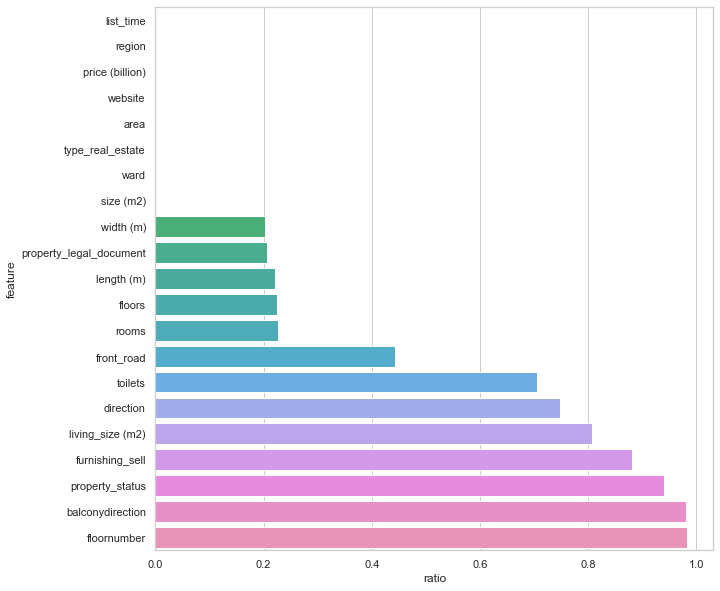

In [44]:
p = DPP.DataPreProcessor(BDS_df)
p.convert_unit("price (million)", 1000)
BDS_df.rename(columns={'price (million)':'price (billion)'}, inplace=True)
missing_df = p.cal_ratio_missing_data(BDS_df.columns)
print(missing_df)
plt.figure(figsize=(10, 10))
sns.set(style="whitegrid", color_codes=False)
sns.barplot(y='feature', x='ratio', data=missing_df, orient='h')
plt.show()


In [45]:
BDS_df1 = BDS_df.copy()


### price


In [46]:
BDS_df1['price (billion)'].describe()


count    2.208630e+05
mean     7.903109e+03
std      3.707341e+06
min      3.700000e-04
25%      2.750000e+00
50%      5.300000e+00
75%      1.100000e+01
max      1.742304e+09
Name: price (billion), dtype: float64

In [47]:
BDS_df1[BDS_df1['price (billion)'] == max(BDS_df1['price (billion)'])]


list_time       ward           area          region property_status  \
47178  01/11/2021  Phường 15  Quận Tân Bình  Tp Hồ Chí Minh             NaN   

      direction balconydirection property_legal_document  size (m2)  \
47178       NaN              NaN                Đã có sổ       56.0   

       floornumber furnishing_sell rooms toilets        floors  \
47178          NaN             NaN     2       1  Nhiều hơn 10   

       living_size (m2)  width (m)  length (m)  price (billion)  \
47178              56.0        4.0        14.0     1.742304e+09   

      type_real_estate website  front_road  
47178          Nhà ngõ  Chotot         NaN

In [55]:
price_mark = BDS_df1['price (billion)'].quantile(0.99)
price_mark


160.0

### _floor number_ (Cần thu thập thêm) => Loại


In [56]:
BDS_df1['floornumber'].unique()


array([ nan,  16.,   7.,   4.,  12.,   1.,  14.,  18.,  11.,  10.,   9.,
         3.,  29.,   2.,  15.,  22.,  21.,   8.,  19.,   6.,  20.,  35.,
        23.,  27.,  28.,   5.,  25.,  24.,  34.,  13.,  30.,  17.,  26.,
        40.,  37.,  36.,  32.,  33.,  38.,  47.,  39.,  31.,  41.,  45.,
       456.,  48., 320., 132.,  44.])

In [57]:
BDS_df1['floornumber'] = BDS_df1['floornumber'].apply(
    DPP.convertNum2Int, convert_dtype=False)


<Figure size 720x720 with 0 Axes>

<AxesSubplot:xlabel='price (billion)', ylabel='floornumber'>

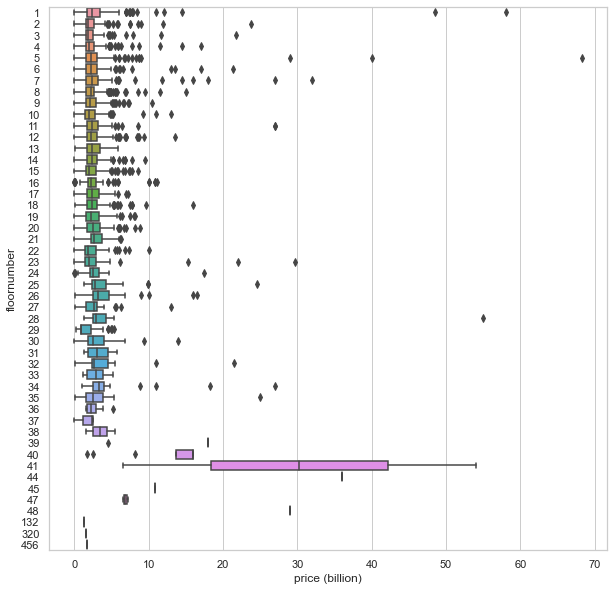

In [64]:
plt.figure(figsize=(10, 10))
sns.boxplot(data=BDS_df1[BDS_df1['price (billion)'] <= price_mark],
            y="floornumber", x='price (billion)', orient='h')


In [62]:
BDS_df1[BDS_df1['floornumber'].isin([132, 320, 456])]


list_time                 ward           area          region  \
28702  17/10/2021  Phường Trung Mỹ Tây        Quận 12  Tp Hồ Chí Minh   
29655  11/10/2021        Phường An Lạc  Quận Bình Tân  Tp Hồ Chí Minh   
30349  06/10/2021     Phường Thạnh Lộc        Quận 12  Tp Hồ Chí Minh   
30662  03/10/2021     Phường Thạnh Lộc        Quận 12  Tp Hồ Chí Minh   

      property_status direction balconydirection property_legal_document  \
28702     Đã bàn giao       NaN              NaN                Đã có sổ   
29655     Đã bàn giao       Tây             Đông                Đã có sổ   
30349     Đã bàn giao       NaN              NaN             Đang chờ sổ   
30662     Đã bàn giao      Đông              Nam             Đang chờ sổ   

       size (m2) floornumber    furnishing_sell rooms toilets        floors  \
28702       85.0         456                NaN     2       2  Nhiều hơn 10   
29655       50.0         320    Nội thất đầy đủ     1       1  Nhiều hơn 10   
30349       46.0         132  Hoàn thiện cơ bản     2       1  Nhiều hơn 10   
30662       46.0         132                NaN     2       1  Nhiều hơn 10   

       living_size (m2)  width (m)  length (m)  price (billion)  \
28702               NaN        NaN         NaN             1.75   
29655               NaN        NaN         NaN             1.55   
30349               NaN        NaN         NaN             1.30   
30662               NaN        NaN         NaN             1.25   

      type_real_estate website  front_road  
28702         Chung cư  Chotot         NaN  
29655         Chung cư  Chotot         NaN  
30349         Chung cư  Chotot         NaN  
30662         Chung cư  Chotot         NaN

In [65]:
# Loại bỏ giá trị tầng sô không tồn tại thực tế
BDS_df1 = BDS_df1[~BDS_df1['floornumber'].isin([132, 320, 456])].reset_index(drop=True)


### _balcony direction_ (Loại)


In [66]:
BDS_df1['balconydirection'].unique()


array([nan, 'Nam', 'Đông Nam', 'Tây', 'Đông', 'Tây Nam', 'Tây Bắc', 'Bắc',
       'Đông Bắc'], dtype=object)

<Figure size 1800x720 with 0 Axes>

<AxesSubplot:xlabel='price (billion)', ylabel='balconydirection'>

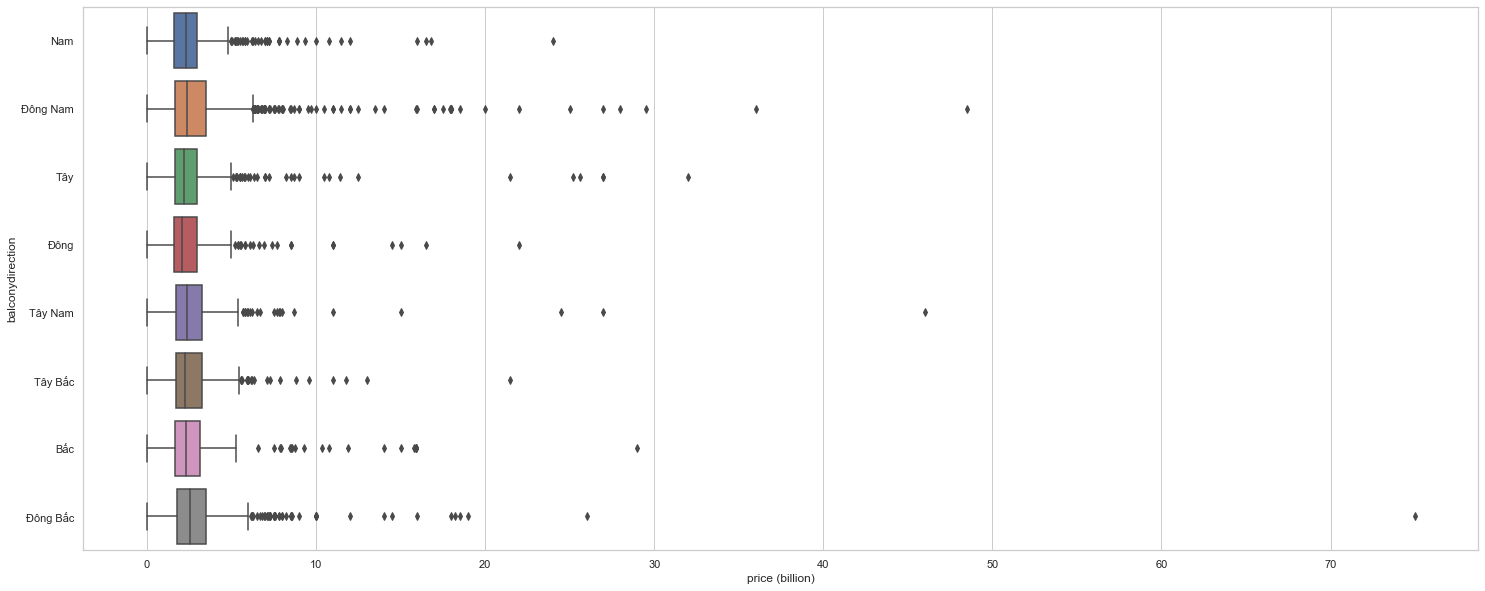

In [74]:
plt.figure(figsize=(25, 10))
sns.boxplot(data=BDS_df1[BDS_df1['price (billion)'] <= price_mark],
            y="balconydirection", x='price (billion)', orient='h')


### _property status_ (Loại)


In [75]:
BDS_df1['property_status'].unique()


array(['Đã bàn giao', 'Chưa bàn giao', nan], dtype=object)

<Figure size 504x720 with 0 Axes>

<AxesSubplot:xlabel='property_status', ylabel='price (billion)'>

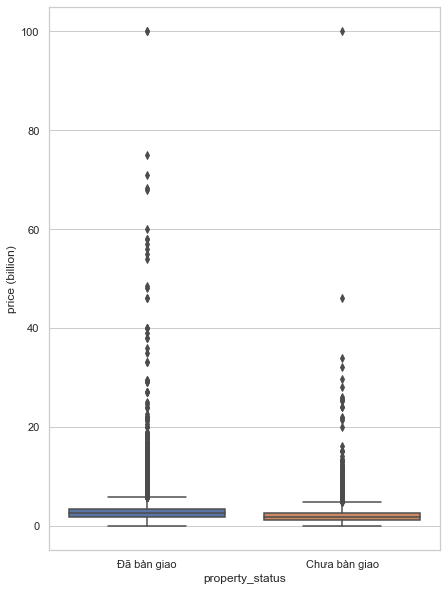

In [81]:
plt.figure(figsize=(7, 10))
sns.boxplot(data=BDS_df1[BDS_df1['price (billion)'] <=
            price_mark], x="property_status", y="price (billion)")


### _furnishing_sell_ (Cần thu thập thêm) => Loại


In [82]:
BDS_df1["furnishing_sell"].unique()


array([nan, 'Nội thất đầy đủ', 'Hoàn thiện cơ bản', 'Bàn giao thô',
       'Nội thất cao cấp'], dtype=object)

<Figure size 504x720 with 0 Axes>

<AxesSubplot:xlabel='furnishing_sell', ylabel='price (billion)'>

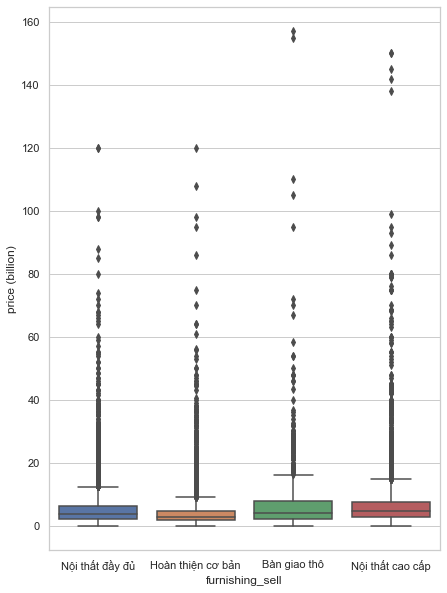

In [85]:
plt.figure(figsize=(7, 10))
sns.boxplot(data=BDS_df1[BDS_df1['price (billion)'] <=
            price_mark], x="furnishing_sell", y="price (billion)")


### type real estate


In [124]:
BDS_df1['type_real_estate'].unique()


array(['Chung cư', 'Căn hộ dịch vụ', 'Duplex', 'Penthouse', 'Nhà mặt phố',
       'Nhà ngõ', 'Nhà phố liền kề', 'Nhà biệt thự', 'Đất thổ cư',
       'Đất nông nghiệp', 'Đất công nghiệp', 'Đất nền dự án', 'Tập thể',
       'Officetel', nan, 'Nhà mặt tiền', 'Nhà trong hẻm',
       'Đất thổ cư, đất ở', 'Căn hộ chung cư',
       'Đất nền, liền kề, đất dự án', 'Biệt thự, nhà liền kề',
       'Nhà hàng, khách sạn', 'Phòng trọ, nhà trọ', 'Kho, xưởng',
       'Đất nông, lâm nghiệp', 'Shop, kiot, quán', 'Mặt bằng',
       'Văn phòng', 'Trang trại', 'Các loại khác'], dtype=object)

<Figure size 1440x720 with 0 Axes>

<AxesSubplot:xlabel='price (billion)', ylabel='type_real_estate'>

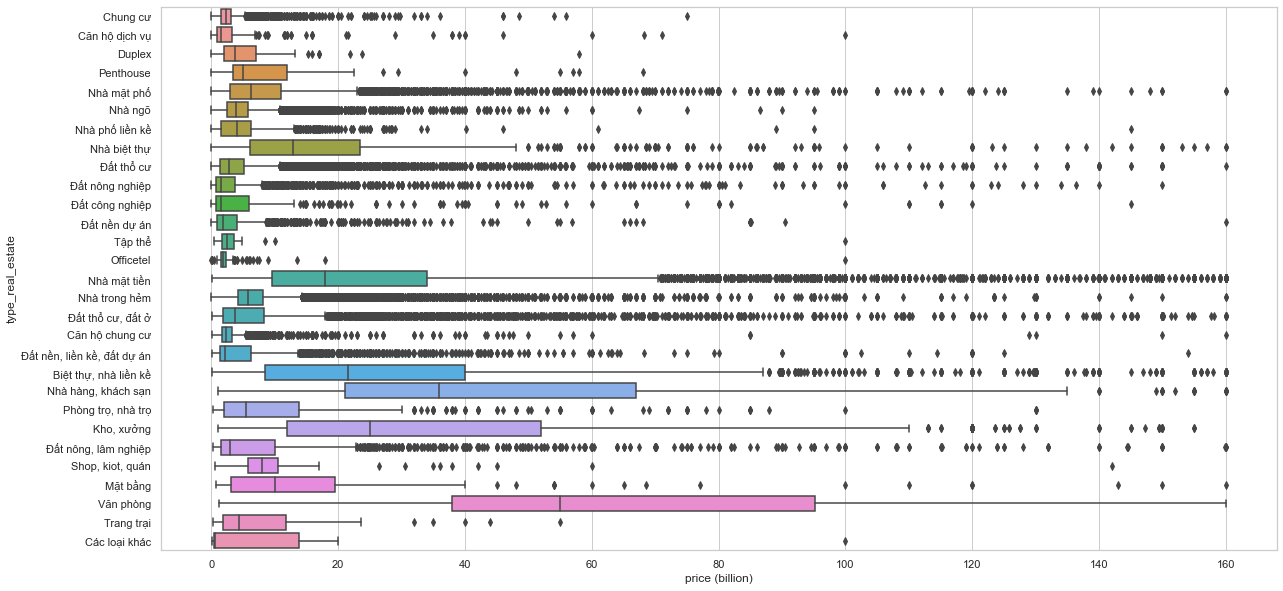

In [125]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=BDS_df1[BDS_df1['price (billion)'] <= price_mark],
            x="price (billion)", y="type_real_estate", orient='h')


In [126]:
def group_value_type_real_estate(x):
    if x is np.nan:
        return x
    type_real_estate = {'Căn hộ - Chung cư': ['Chung cư',
                                            'Căn hộ dịch vụ',
                                            'Duplex',
                                            'Penthouse',
                                            'Căn hộ chung cư'],
                        'Nhà ở': ['Nhà mặt phố',
                                  'Nhà ngõ',
                                  'Nhà phố liền kề',
                                  'Nhà biệt thự',
                                  'Nhà mặt tiền',
                                  'Nhà trong hẻm',
                                  'Biệt thự, nhà liền kề'],
                        'Đất': ['Đất thổ cư',
                                'Đất nông nghiệp',
                                'Đất công nghiệp',
                                'Đất nền dự án',
                                'Đất thổ cư, đất ở',
                                'Đất nền, liền kề, đất dự án',
                                'Đất nông, lâm nghiệp'],
                        'Khác': ['Tập thể',
                                 'Officetel',
                                 'Nhà hàng, khách sạn',
                                 'Phòng trọ, nhà trọ',
                                 'Kho, xưởng',
                                 'Shop, kiot, quán',
                                 'Mặt bằng',
                                 'Văn phòng',
                                 'Trang trại',
                                 'Các loại khác']}
    for key, value in type_real_estate.items():
        if x in value:
            return key
    return x


In [127]:
BDS_df1["type_real_estate"] = BDS_df1["type_real_estate"].apply(group_value_type_real_estate)

<Figure size 1080x504 with 0 Axes>

<AxesSubplot:xlabel='price (billion)', ylabel='type_real_estate'>

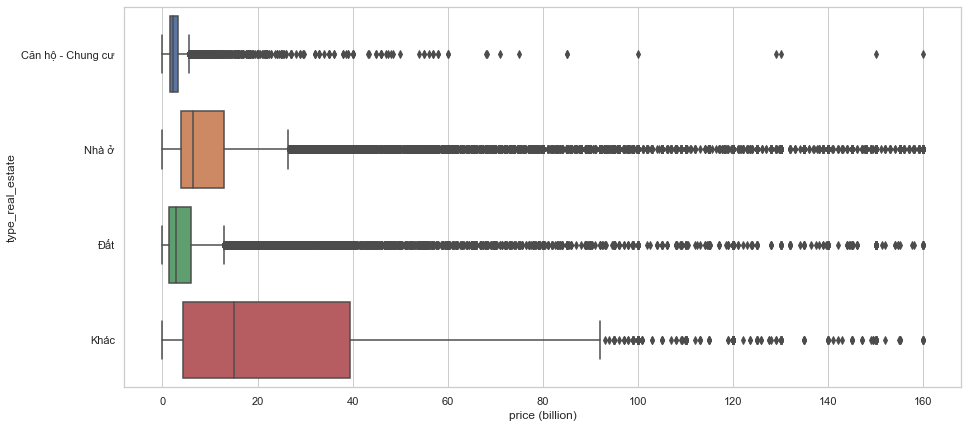

In [132]:
plt.figure(figsize=(15, 7))
sns.boxplot(data=BDS_df1[BDS_df1['price (billion)'] <= price_mark],
            x="price (billion)", y="type_real_estate", orient='h')


### length, width, size


In [133]:
BDS_df1['length (m)'] = BDS_df1['length (m)'].apply(
    lambda x: np.nan if x == 0 else x)
BDS_df1['width (m)'] = BDS_df1['width (m)'].apply(
    lambda x: np.nan if x == 0 else x)


<AxesSubplot:xlabel='length (m)', ylabel='price (billion)'>

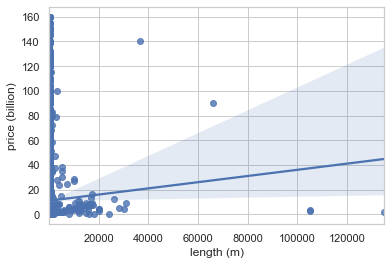

In [136]:
sns.regplot(data=BDS_df1[BDS_df1['price (billion)'] <=
            price_mark], x="length (m)", y="price (billion)")


In [137]:
BDS_df1['length (m)'].describe()


count    171648.000000
mean         29.927197
std         587.155782
min           0.580000
25%          12.000000
50%          17.000000
75%          22.000000
max      135000.000000
Name: length (m), dtype: float64

In [138]:
BDS_df1['length (m)'].quantile(0.99)


120.0

In [139]:
len(BDS_df1[BDS_df1['length (m)'] >= 120]), len(BDS_df1)


(1797, 220859)

In [140]:
BDS_df1[BDS_df1['length (m)'] >= 120].head()


list_time              ward                area    region  \
222   30/10/2021      Xã Long Hưng  Thành phố Biên Hòa  Đồng Nai   
369   05/11/2021  Phường Tân Phong  Thành phố Biên Hòa  Đồng Nai   
560   03/11/2021         Xã Phú An       Huyện Tân Phú  Đồng Nai   
984   30/10/2021      Xã Bình Minh     Huyện Trảng Bom  Đồng Nai   
1034  30/10/2021      Xã Long Hưng  Thành phố Biên Hòa  Đồng Nai   

     property_status direction balconydirection property_legal_document  \
222              NaN       NaN              NaN            Giấy tờ khác   
369              NaN   Tây Bắc              NaN                Đã có sổ   
560              NaN       Nam              NaN                Đã có sổ   
984              NaN   Tây Nam              NaN                     NaN   
1034             NaN       NaN              NaN            Giấy tờ khác   

      size (m2) floornumber furnishing_sell rooms toilets        floors  \
222       117.0         NaN    Bàn giao thô     4       4  Nhiều hơn 10   
369       170.0         NaN             NaN     4       3  Nhiều hơn 10   
560     80000.0         NaN             NaN     6       3  Nhiều hơn 10   
984        80.0         NaN             NaN     2     NaN  Nhiều hơn 10   
1034      117.0         NaN    Bàn giao thô     4       4  Nhiều hơn 10   

      living_size (m2)  width (m)  length (m)  price (billion)  \
222              265.0        6.0       195.0            7.000   
369              140.0      115.0       145.0            5.700   
560            80000.0      150.0      1000.0            0.025   
984               80.0      366.0       239.0            0.950   
1034             265.0        6.0       195.0            7.000   

     type_real_estate website  front_road  
222             Nhà ở  Chotot         NaN  
369             Nhà ở  Chotot         NaN  
560             Nhà ở  Chotot         NaN  
984             Nhà ở  Chotot         NaN  
1034            Nhà ở  Chotot         NaN

<AxesSubplot:xlabel='width (m)', ylabel='price (billion)'>

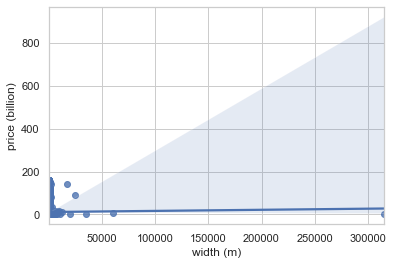

In [142]:
sns.regplot(data=BDS_df1[BDS_df1['price (billion)'] <=
                         price_mark], x="width (m)", y="price (billion)")


In [143]:
BDS_df1['width (m)'].describe()


count    175612.000000
mean         13.688224
std         782.852191
min           0.130000
25%           4.000000
50%           5.000000
75%           6.500000
max      315375.000000
Name: width (m), dtype: float64

In [144]:
BDS_df1[BDS_df1['width (m)'] == 315375]


list_time             ward           area          region  \
65594  18/10/2021  Phường An Lạc A  Quận Bình Tân  Tp Hồ Chí Minh   

      property_status direction balconydirection property_legal_document  \
65594             NaN       Tây              NaN                Đã có sổ   

       size (m2) floornumber    furnishing_sell         rooms      toilets  \
65594       83.0         NaN  Hoàn thiện cơ bản  Nhiều hơn 10  Nhiều hơn 6   

      floors  living_size (m2)  width (m)  length (m)  price (billion)  \
65594      4             229.0   315375.0        26.0             0.16   

      type_real_estate website  front_road  
65594            Nhà ở  Chotot         NaN

In [145]:
BDS_df1['width (m)'].quantile(0.99)


72.0

In [146]:
len(BDS_df1[BDS_df1['width (m)'] >= 72]), len(BDS_df1)


(1762, 220859)

In [147]:
# Xử lý các giá trị NaN tại size và living size
for i in range(len(BDS_df1)):
    # Nếu size = NaN và living_size != NaN thì gán size = living_size
    if (np.isnan(BDS_df1.loc[i, "size (m2)"])) & (not np.isnan(BDS_df1.loc[i, "living_size (m2)"])):
        BDS_df1.at[i, "size (m2)"] = BDS_df1.loc[i,
                                                 "living_size (m2)"]
    # Nếu size = NaN và living_size = NaN thì gán size = length*width
    elif np.isnan(BDS_df1.loc[i, "size (m2)"]) & (np.isnan(BDS_df1.loc[i, "living_size (m2)"])):
        BDS_df1.at[i, "size (m2)"] = BDS_df1.loc[i,
                                                 "length (m)"]*BDS_df1.loc[i, "width (m)"]

    if np.isnan(BDS_df1.loc[i, "living_size (m2)"]):
        if not np.isnan(BDS_df1.loc[i, "size (m2)"]):
            if str(BDS_df1.loc[i, "floors"]) != 'nan':
                # Nếu floors != NaN thì living_size = size*floors
                # Nếu floors == Nhiều hơn 10 thì living_size = size*10
                try:
                    BDS_df1.at[i, "living_size (m2)"] = BDS_df1.loc[i,
                                                                    "size (m2)"]*BDS_df1.loc[i, "floors"]
                except:
                    BDS_df1.at[i,
                               "living_size (m2)"] = BDS_df1.loc[i, "size (m2)"]*10
            else:
                # Nếu floors == NaN thì living_size = size
                BDS_df1.at[i, "living_size (m2)"] = BDS_df1.loc[i,
                                                                "size (m2)"]


In [148]:
# Xử lý NaN length và width
for i in range(len(BDS_df1)):
    if not np.isnan(BDS_df1.loc[i, "size (m2)"]):

        if np.isnan(BDS_df1.loc[i, "length (m)"]) & np.isnan(BDS_df1.loc[i, "width (m)"]):
            continue

        elif np.isnan(BDS_df1.loc[i, "length (m)"]):
            BDS_df1.loc[i, "length (m)"] = round(
                BDS_df1.loc[i, "size (m2)"]/BDS_df1.loc[i, "width (m)"], 5)

        elif np.isnan(BDS_df1.loc[i, "width (m)"]):
            BDS_df1.loc[i, "width (m)"] = round(
                BDS_df1.loc[i, "size (m2)"]/BDS_df1.loc[i, "length (m)"], 5)


In [149]:
len(BDS_df1[["length (m)", "width (m)", "floors", "size (m2)", "living_size (m2)"]
            ][(BDS_df1["living_size (m2)"].isna()) | (BDS_df1["living_size (m2)"].isna())]), len(BDS_df1)


(109, 220859)

In [150]:
len(BDS_df1[(BDS_df1["length (m)"].isna()) | (BDS_df1["width (m)"].isna())])


44717

In [151]:
BDS_df1[(BDS_df1["length (m)"].isna()) | (
    BDS_df1["length (m)"].isna())].sample(5)


list_time                    ward                   area  \
24493   01/11/2021       Phường Bình Chiểu           Quận Thủ Đức   
144414  03/11/2021               Phường 10          Quận Tân Bình   
14742   05/10/2021  Phường Tương Bình Hiệp  Thành phố Thủ Dầu Một   
27042   24/10/2021          Phường Tân Tạo          Quận Bình Tân   
27386   23/10/2021           Xã Phước Kiển           Huyện Nhà Bè   

                region property_status direction balconydirection  \
24493   Tp Hồ Chí Minh     Đã bàn giao       NaN              NaN   
144414     Hồ Chí Minh             NaN       NaN              NaN   
14742       Bình Dương             NaN       NaN              NaN   
27042   Tp Hồ Chí Minh     Đã bàn giao       NaN              NaN   
27386   Tp Hồ Chí Minh   Chưa bàn giao   Tây Nam         Đông Bắc   

       property_legal_document  size (m2) floornumber    furnishing_sell  \
24493              Đang chờ sổ       58.0         NaN  Hoàn thiện cơ bản   
144414                     NaN       40.0         NaN                NaN   
14742                      NaN      151.0         NaN                NaN   
27042             Giấy tờ khác       38.0          11    Nội thất đầy đủ   
27386             Giấy tờ khác       78.0          10       Bàn giao thô   

       rooms toilets        floors  living_size (m2)  width (m)  length (m)  \
24493      2       2  Nhiều hơn 10             580.0        NaN         NaN   
144414   NaN     NaN           NaN              40.0        NaN         NaN   
14742      3       2  Nhiều hơn 10             151.0        NaN         NaN   
27042      1       1  Nhiều hơn 10             380.0        NaN         NaN   
27386      2       1  Nhiều hơn 10             780.0        NaN         NaN   

        price (billion)   type_real_estate    website  front_road  
24493             1.649  Căn hộ - Chung cư     Chotot         NaN  
144414            5.000              Nhà ở  alonhadat         4.0  
14742             2.150              Nhà ở     Chotot         NaN  
27042             0.600  Căn hộ - Chung cư     Chotot         NaN  
27386             4.056  Căn hộ - Chung cư     Chotot         NaN

### living size vs size


<Figure size 720x720 with 0 Axes>

<AxesSubplot:xlabel='price (billion)', ylabel='size (m2)'>

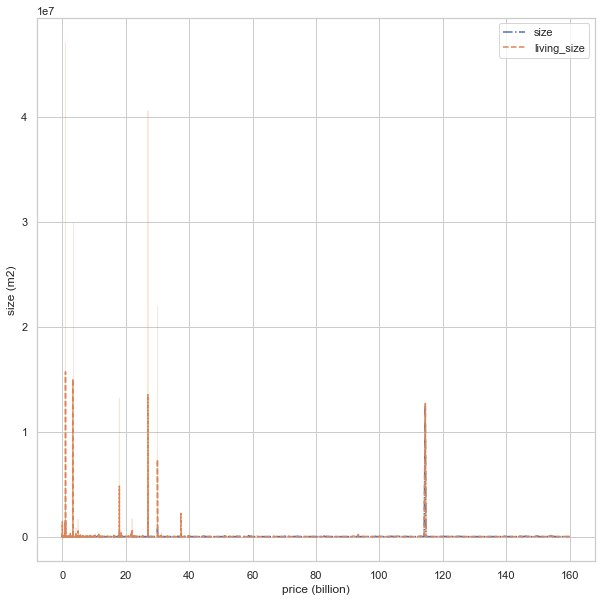

In [152]:
plt.figure(figsize=(10, 10))
ax = sns.lineplot(data=BDS_df1[BDS_df1['price (billion)'] <=
                               price_mark], y='size (m2)', x="price (billion)", linestyle='-.', label="size")
sns.lineplot(data=BDS_df1[BDS_df1['price (billion)'] <=
                          price_mark], y='living_size (m2)', x="price (billion)", linestyle='--', label="living_size", ax=ax)


In [153]:
BDS_df1['living_size (m2)'].describe()


count    2.207500e+05
mean     1.348093e+05
std      2.897950e+07
min      1.000000e+00
25%      1.000000e+02
50%      2.040000e+02
75%      5.520000e+02
max      9.000000e+09
Name: living_size (m2), dtype: float64

In [156]:
BDS_df1.to_csv('data version/BDS_df1.csv', index=False)

### direction


In [157]:
BDS_df2 = BDS_df1.copy()


In [158]:
BDS_df2["direction"].unique()


array([nan, 'Bắc', 'Đông Bắc', 'Đông Nam', 'Đông', 'Tây Bắc', 'Tây',
       'Nam', 'Tây Nam'], dtype=object)

In [159]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='most_frequent')
direction = imp.fit_transform(BDS_df2['direction'].values.reshape(-1, 1))


In [160]:
BDS_df2['direction'] = direction.flatten()


<AxesSubplot:xlabel='direction', ylabel='price (billion)'>

Text(0.5, 1.0, 'Chưa điền giá trị')

<AxesSubplot:xlabel='direction', ylabel='price (billion)'>

Text(0.5, 1.0, 'Đã điền giá trị')

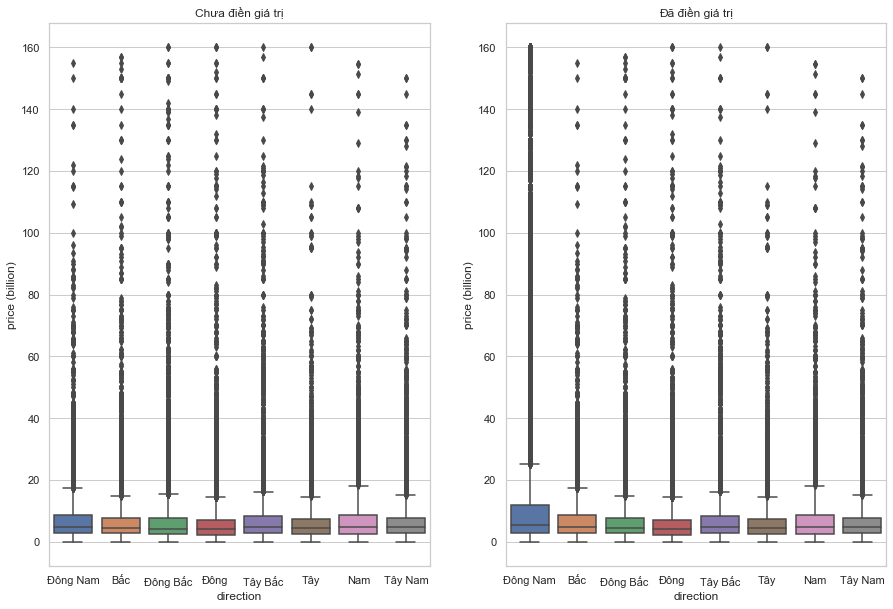

In [161]:
# plt.figure(figsize=(10, 10))
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 10), sharex=True)

sns.boxplot(data=BDS_df1[BDS_df1['price (billion)'] <= price_mark],
            x="direction", y="price (billion)", ax=axes[0])
axes[0].set_title("Chưa điền giá trị")
sns.boxplot(data=BDS_df2[BDS_df2['price (billion)'] <= price_mark],
            x="direction", y="price (billion)", ax=axes[1])
axes[1].set_title("Đã điền giá trị")


In [162]:
BDS_df2.to_csv('data version/BDS_df2.csv', index=False)


### DF2


In [180]:
BDS_df2 = pd.read_csv('data version/BDS_df2.csv')


### toilets


In [181]:
BDS_df3 = BDS_df2.copy()


In [182]:
BDS_df3['toilets'].unique()


array(['2', '1', nan, '5', '3', 'Nhiều hơn 6', '4', '6'], dtype=object)

In [183]:
BDS_df3['toilets'] = BDS_df3['toilets'].apply(
    DPP.convertNum2Int, convert_dtype=False)
BDS_df3['toilets'] = BDS_df3['toilets'].astype('category')


<Figure size 720x720 with 0 Axes>

<AxesSubplot:xlabel='toilets', ylabel='price (billion)'>

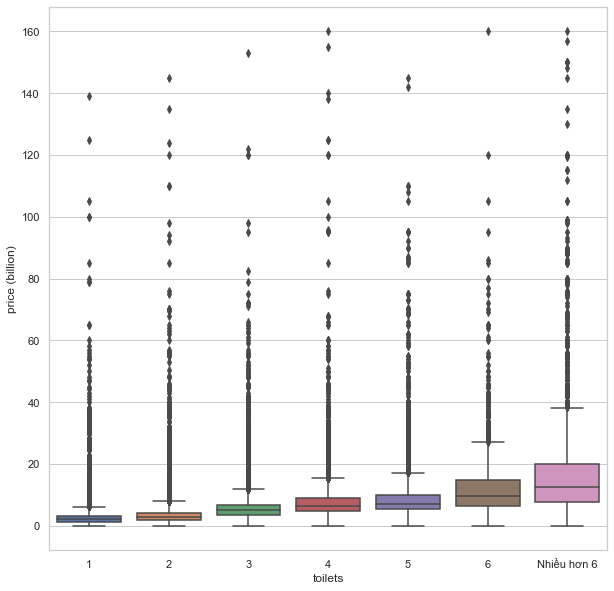

In [184]:
plt.figure(figsize=(10, 10))
sns.boxplot(data=BDS_df3[BDS_df3['price (billion)'] <=
            price_mark], x="toilets", y="price (billion)")


In [170]:
BDS_df3['toilets'].replace({'Nhiều hơn 6': 7}, inplace=True)


In [171]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=7)


In [ ]:
toilets = imputer.fit_transform(BDS_df3[['toilets', 'price (billion)']])


In [66]:
toilets = [int(x[0]) if x[0] <= 6 else 'Nhiều hơn 6' for x in toilets]


In [67]:
# BDS_df3['toilets'] = toilets
# BDS_df3['toilets'] = BDS_df3['toilets'].astype('category')


In [185]:
# Load lại giá trị đã fit_transform trước đó
BDS_df3_old = pd.read_csv('data version/BDS_df3.csv')
BDS_df3['toilets'] = BDS_df3_old.toilets
BDS_df3['toilets'] = BDS_df3['toilets'].astype('category')

<AxesSubplot:xlabel='toilets', ylabel='price (billion)'>

Text(0.5, 1.0, 'Chưa điền giá trị')

<AxesSubplot:xlabel='toilets', ylabel='price (billion)'>

Text(0.5, 1.0, 'Đã điền giá trị')

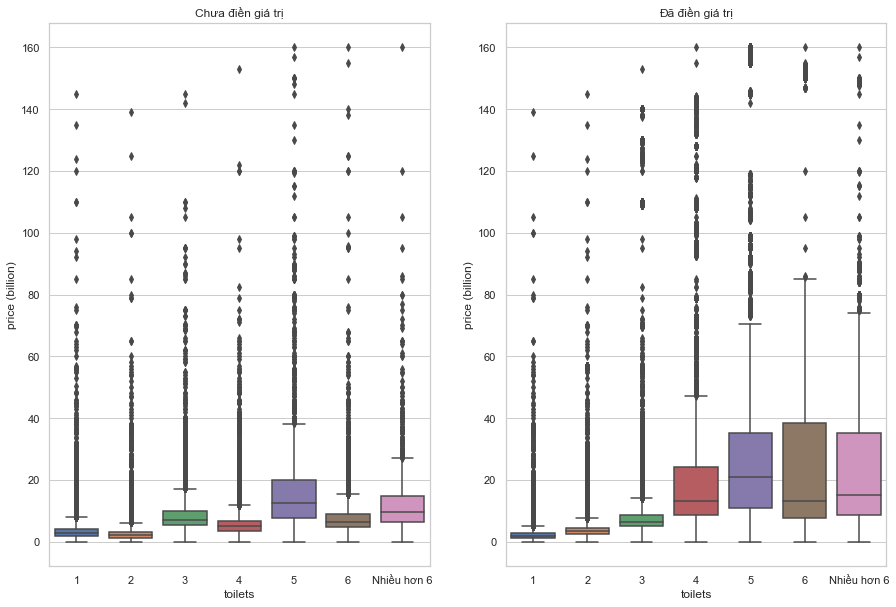

In [188]:
# plt.figure(figsize=(10, 10))
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 10), sharex=True)

sns.boxplot(data=BDS_df1[BDS_df1['price (billion)'] <= price_mark],
            x="toilets", y="price (billion)", ax=axes[0])
axes[0].set_title("Chưa điền giá trị")
sns.boxplot(data=BDS_df3[BDS_df3['price (billion)'] <= price_mark],
            x="toilets", y="price (billion)", ax=axes[1])
axes[1].set_title("Đã điền giá trị")


In [189]:
BDS_df3.to_csv('data version/BDS_df3_new.csv', index=False)


### DF3


In [190]:
BDS_df3 = pd.read_csv('data version/BDS_df3_new.csv')


In [191]:
BDS_df3.sample()

list_time                    ward           area          region  \
69004  14/10/2021  Phường Bình Trị Đông A  Quận Bình Tân  Tp Hồ Chí Minh   

      property_status direction balconydirection property_legal_document  \
69004             NaN       Tây              NaN                Đã có sổ   

       size (m2)  floornumber furnishing_sell rooms toilets floors  \
69004       64.0          NaN             NaN     4       4      4   

       living_size (m2)  width (m)  length (m)  price (billion)  \
69004             192.0        4.0        16.0             5.75   

      type_real_estate website  front_road  
69004            Nhà ở  Chotot         NaN

### front road


In [192]:
BDS_df4 = BDS_df3.copy()


In [193]:
BDS_df4['front_road'].describe()


count    123125.000000
mean         10.997237
std          17.639068
min           0.000000
25%           5.000000
50%           8.000000
75%          13.000000
max         825.000000
Name: front_road, dtype: float64

<Figure size 720x720 with 0 Axes>

<AxesSubplot:xlabel='front_road', ylabel='price (billion)'>

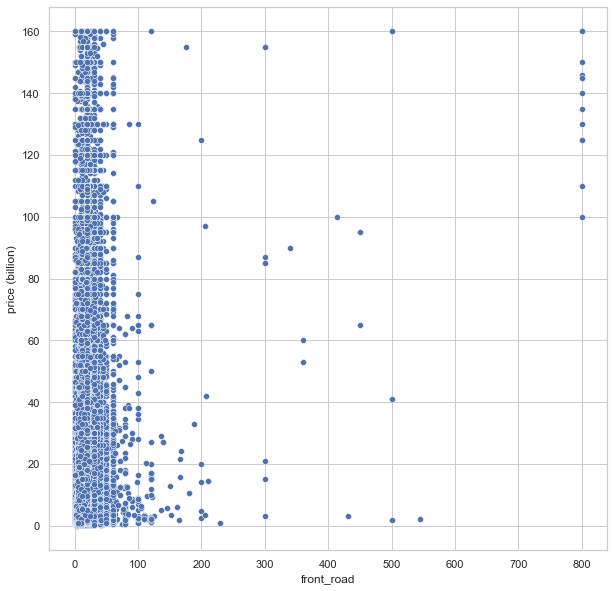

In [194]:
plt.figure(figsize=(10, 10))
sns.scatterplot(data=BDS_df4[BDS_df4['price (billion)']
                <= price_mark], x="front_road", y="price (billion)")


In [195]:
BDS_df4['front_road'].quantile(0.99)


40.0

In [196]:
BDS_df4 = BDS_df4[~(BDS_df4['front_road'] > 26)].reset_index(drop=True)


In [197]:
BDS_df4['front_road'].isna().sum()


97734

In [74]:
from sklearn.impute import KNNImputer
imputer = KNNImputer()


In [75]:
# front_road = imputer.fit_transform(BDS_df4[['front_road', 'price (million)']])


In [76]:
BDS_df4['front_road'] = [x[0] for x in front_road]


In [198]:
# Load lại giá trị đã fit_transform trước đó
BDS_df4_old = pd.read_csv('data version/BDS_df4.csv')
BDS_df4['front_road'] = BDS_df4_old.front_road

<AxesSubplot:xlabel='front_road', ylabel='price (billion)'>

Text(0.5, 1.0, 'Chưa điền giá trị')

<AxesSubplot:xlabel='front_road', ylabel='price (billion)'>

Text(0.5, 1.0, 'Đã điền giá trị')

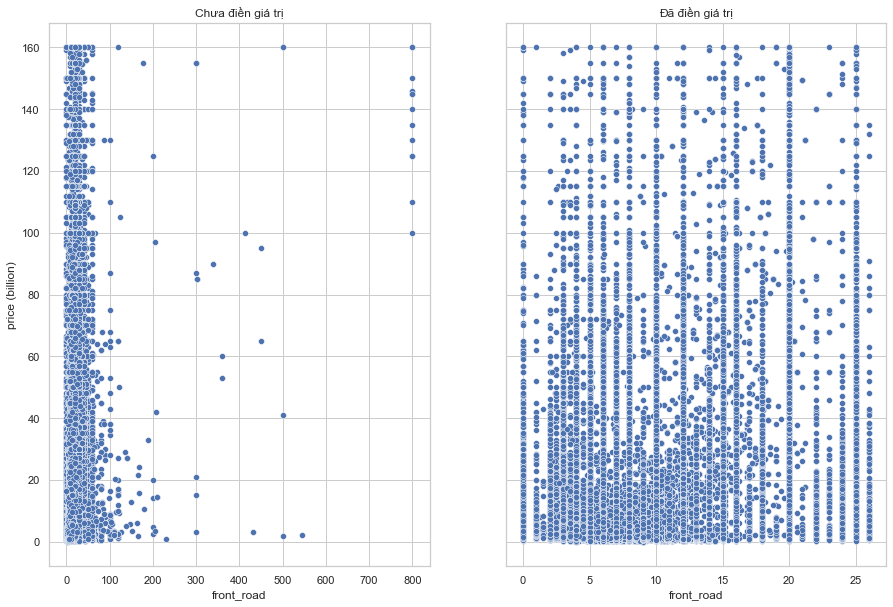

In [200]:
# plt.figure(figsize=(10, 10))
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 10), sharey=True)

sns.scatterplot(data=BDS_df1[BDS_df1['price (billion)'] <= price_mark],
                x="front_road", y="price (billion)", ax=axes[0])
axes[0].set_title("Chưa điền giá trị")
sns.scatterplot(data=BDS_df4[BDS_df4['price (billion)'] <= price_mark],
                x="front_road", y="price (billion)", ax=axes[1])
axes[1].set_title("Đã điền giá trị")


### region


In [201]:
BDS_df4['region'].unique()


array(['Đồng Nai', 'Bình Dương', 'Tp Hồ Chí Minh', 'Hồ Chí Minh'],
      dtype=object)

In [202]:
BDS_df4['region'].replace({'Tp Hồ Chí Minh': 'Hồ Chí Minh'}, inplace=True)


<Figure size 720x720 with 0 Axes>

<AxesSubplot:xlabel='region', ylabel='price (billion)'>

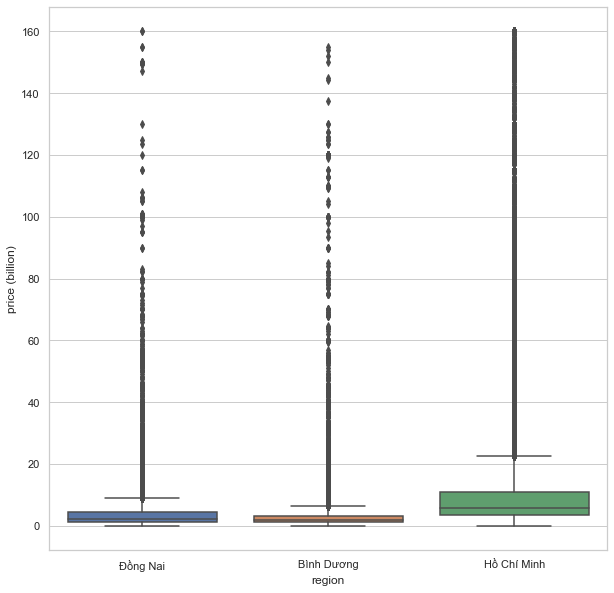

In [206]:
plt.figure(figsize=(10, 10))
sns.boxplot(data=BDS_df4[BDS_df4['price (billion)'] <=
            price_mark], x="region", y="price (billion)")


### area


In [207]:
region_cols = ['ward', 'area', 'region']
BDS_df4[region_cols].groupby(
    region_cols[1:]).count().sort_values(axis=0, by=['region'])


ward
area                  region            
Huyện Bàu Bàng        Bình Dương    1087
Thị xã Bến Cát        Bình Dương    2233
Thành phố Thủ Dầu Một Bình Dương    2853
Thành phố Thuận An    Bình Dương    3508
Thành phố Dĩ An       Bình Dương     963
Thị xã Dĩ An          Bình Dương    2832
Huyện Phú Giáo        Bình Dương     219
Thị xã Tân Uyên       Bình Dương    1830
Huyện Dầu Tiếng       Bình Dương     430
Huyện Bắc Tân Uyên    Bình Dương     455
Quận 7                Hồ Chí Minh   7749
Quận 8                Hồ Chí Minh   4711
Quận 9                Hồ Chí Minh   8274
Quận Bình Thạnh       Hồ Chí Minh  12956
Quận Bình Tân         Hồ Chí Minh  11340
Quận Bắc Từ Liêm      Hồ Chí Minh      1
Quận Gò Vấp           Hồ Chí Minh  20161
Quận Thủ Đức          Hồ Chí Minh   4397
Huyện Hóc Môn         Hồ Chí Minh   4147
Quận Tân Bình         Hồ Chí Minh  14869
Quận Tân Phú          Hồ Chí Minh  13304
Huyện Cần Giờ         Hồ Chí Minh    423
Thành phố Thủ Đức     Hồ Chí Minh   3797
Huyện Bình Chánh      Hồ Chí Minh   7095
Quận Phú Nhuận        Hồ Chí Minh   7727
Quận 6                Hồ Chí Minh   3040
Quận 3                Hồ Chí Minh   5647
Quận 4                Hồ Chí Minh   1710
Huyện Củ Chi          Hồ Chí Minh   8168
Quận 2                Hồ Chí Minh   4592
Quận 12               Hồ Chí Minh   9172
Quận 11               Hồ Chí Minh   2840
Quận 10               Hồ Chí Minh   7585
Quận 1                Hồ Chí Minh   6206
Huyện Nhà Bè          Hồ Chí Minh   4805
Quận 5                Hồ Chí Minh   2287
Huyện Nhơn Trạch      Đồng Nai      1259
Huyện Thống Nhất      Đồng Nai       393
Huyện Trảng Bom       Đồng Nai      2179
Thành phố Long Khánh  Đồng Nai       893
Huyện Tân Phú         Đồng Nai       148
Thành phố Biên Hòa    Đồng Nai      3214
Thành phố Biên Hoà    Đồng Nai      4649
Huyện Vĩnh Cửu        Đồng Nai       978
Huyện Xuân Lộc        Đồng Nai       507
Huyện Định Quán       Đồng Nai       998
Huyện Cẩm Mỹ          Đồng Nai       623
Huyện Long Thành      Đồng Nai      2293

In [208]:
BDS_df4.replace({'Thị xã Dĩ An': 'Thành phố Dĩ An',
                'Thành phố Biên Hoà': 'Thành phố Biên Hòa',
                 'Quận Thủ Đức': 'Thành phố Thủ Đức'}, inplace=True)


In [209]:
BDS_df4 = BDS_df4[BDS_df4['area'] != "Quận Bắc Từ Liêm"].reset_index(drop=True)


<Figure size 1440x720 with 0 Axes>

Text(0.5, 1.0, 'Giá bất động sản ở Tp Hồ Chí Minh')

<AxesSubplot:title={'center':'Giá bất động sản ở Tp Hồ Chí Minh'}, xlabel='price (billion)', ylabel='area'>

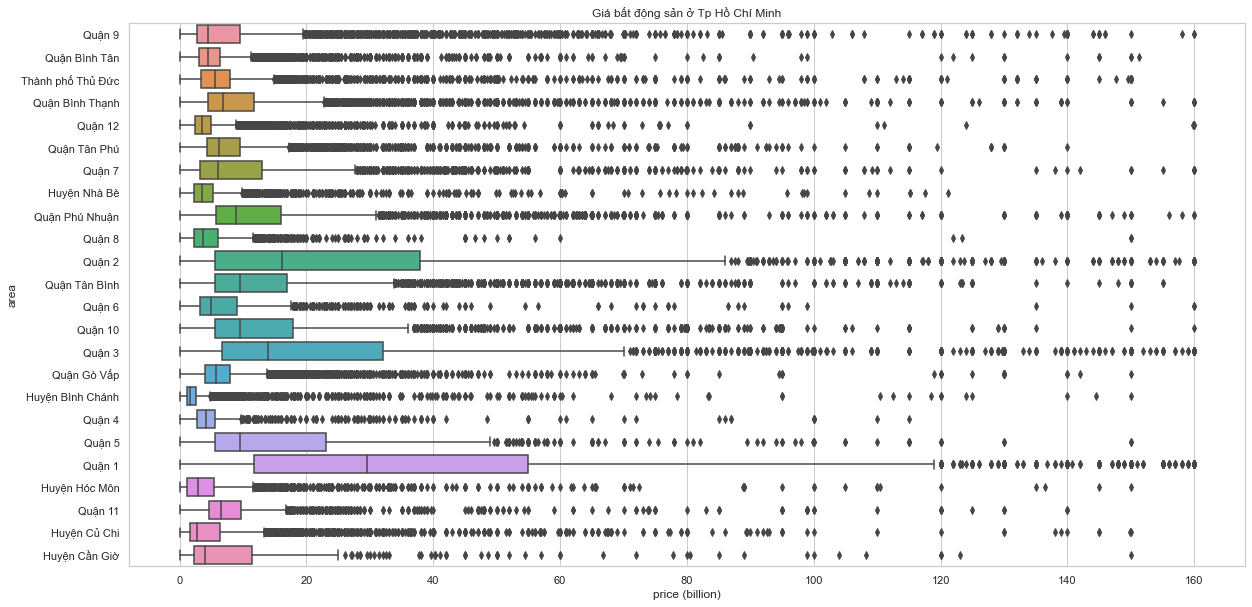

In [213]:
plt.figure(figsize=(20, 10))
# sns.countplot(x='region',data=BDS_df4)
BDS_HCM = BDS_df4[(BDS_df4['price (billion)'] <= price_mark)
                  & (BDS_df4['region'] == "Hồ Chí Minh")]
plt.title("Giá bất động sản ở Tp Hồ Chí Minh")
sns.boxplot(y='area', x='price (billion)', orient='h', data=BDS_HCM)


<Figure size 1440x360 with 0 Axes>

Text(0.5, 1.0, 'Giá bất động sản ở Bình Dương')

<AxesSubplot:title={'center':'Giá bất động sản ở Bình Dương'}, xlabel='price (billion)', ylabel='area'>

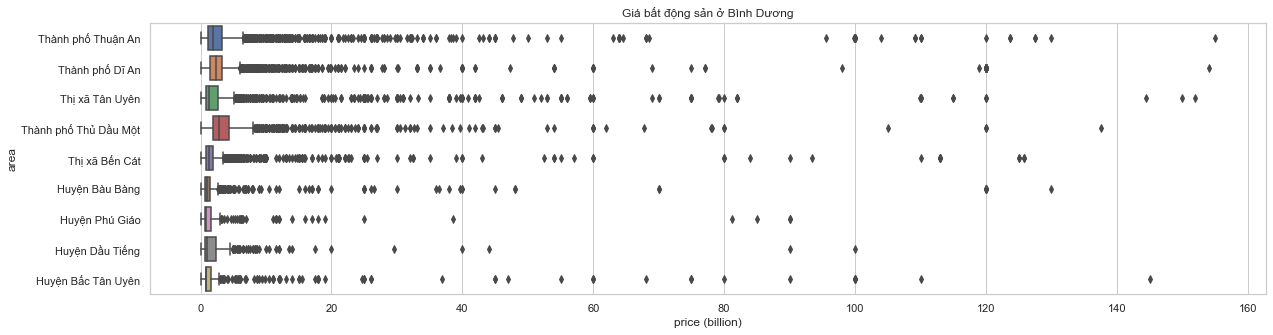

In [215]:
plt.figure(figsize=(20, 5))
# sns.countplot(x='region',data=BDS_df4)
BDS_BD = BDS_df4[(BDS_df4['price (billion)'] <= price_mark)
                 & (BDS_df4['region'] == "Bình Dương")]
plt.title("Giá bất động sản ở Bình Dương")
sns.boxplot(y='area', x='price (billion)', orient='h', data=BDS_BD)


<Figure size 1440x360 with 0 Axes>

Text(0.5, 1.0, 'Giá bất động sản ở Đồng Nai')

<AxesSubplot:title={'center':'Giá bất động sản ở Đồng Nai'}, xlabel='price (billion)', ylabel='area'>

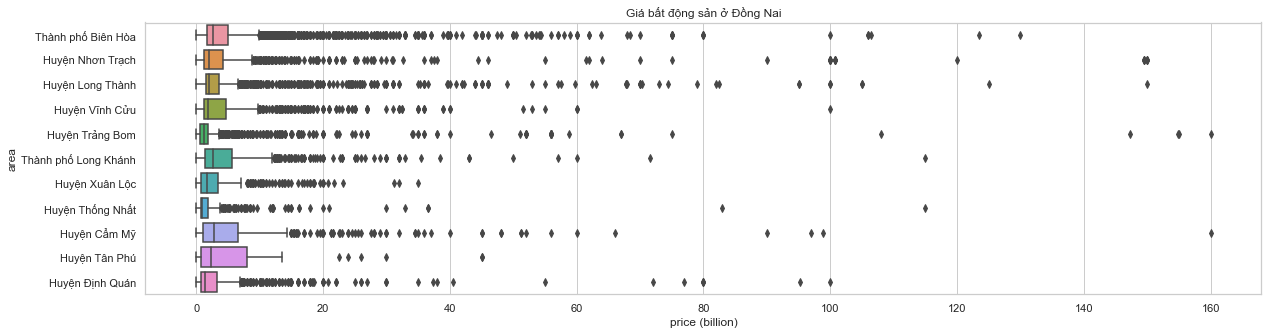

In [214]:
plt.figure(figsize=(20, 5))
# sns.countplot(x='region',data=BDS_df4)
BDS_DN = BDS_df4[(BDS_df4['price (billion)'] <= price_mark)
                 & (BDS_df4['region'] == "Đồng Nai")]
plt.title("Giá bất động sản ở Đồng Nai")
sns.boxplot(y='area', x='price (billion)', orient='h', data=BDS_DN)


In [216]:
BDS_df4.to_csv('data version/BDS_df4_new.csv', index=False)


### DF4


In [217]:
BDS_df4 = pd.read_csv('data version/BDS_df4_new.csv')


### ward


In [218]:
BDS_df5 = BDS_df4.copy()


In [219]:
BDS_df5['ward'].unique()


array(['Phường Tam Hòa', 'Phường Thống Nhất', 'Phường Hố Nai',
       'Phường Hoá An', 'Phường Bửu Long', 'Xã Đại Phước', 'Xã Phước An',
       'Phường An Bình', 'Phường Phước Tân', 'Phường Hòa Bình',
       'Phường Thanh Bình', 'Phường Quyết Thắng', 'Phường Tam Hiệp',
       'Phường Tân Hiệp', 'Phường Tân Biên', 'Phường Quang Vinh',
       'Phường Trảng Dài', 'Xã Long Đức', 'Thị trấn Long Thành',
       'Xã Long Hưng', 'Phường Long Bình Tân', 'Phường Tân Vạn',
       'Xã Cẩm Đường', 'Phường Tam Phước', 'Phường Tân Phong',
       'Xã Thạnh Phú', 'Xã Hố Nai 3', 'Phường Bửu Hòa', 'Xã Tây Hoà',
       'Phường Tân Mai', 'Phường Bình Đa', 'Phường Long Bình',
       'Xã Bình Hòa', 'Phường Tân Tiến', 'Phường Tân Hạnh', 'Xã Bắc Sơn',
       'Thị trấn Trảng Bom', 'Phường Bảo Vinh', 'Xã Trung Hoà',
       'Phường An Hoà', 'Thị trấn Hiệp Phước', 'Xã An Phước',
       'Phường Trung Dũng', 'Xã Quảng Tiến', 'Xã Xuân Bắc',
       'Xã Thiện Tân', 'Xã Bình Lợi', 'Xã Hưng Thịnh', 'Xã An Viễn',
       'X

In [220]:
BDS_df5['ward'].replace(
    {"xã Tân An Hội Xã Tân An Hội": "Xã Tân An Hội"}, inplace=True)


In [221]:
def replace_error_value(x):
    '''
        Kiểm tra và thay thế các giá trị không đúng định dạng trong thuộc tính ward
        Giá trị bắt đầu là "Xã", "Phường", "Thị trấn" là hợp lệ

        Parameters
        ----------
            - x (string): chuỗi giá trị cần kiểm tra

        Returns
        ----------
            - Kết quả sau khi kiểm tra
    '''
    if isinstance(x, (int, float)) or x == np.nan:
        return np.nan

    temp = x.lower()
    if temp.startswith(('xã', 'phường', 'thị trấn')):
        return x

    return np.nan


BDS_df5['ward'] = BDS_df5['ward'].apply(replace_error_value)


In [222]:
region_cols = ['ward', 'area', 'region']
BDS_df5[region_cols].groupby(
    region_cols).all().sort_values(axis=0, by=['region', 'area'])


Empty DataFrame
Columns: []
Index: [(Thị Trấn Bàu Bàng, Huyện Bàu Bàng, Bình Dương), (Thị trấn Lai Uyên, Huyện Bàu Bàng, Bình Dương), (Xã Cây Trường II, Huyện Bàu Bàng, Bình Dương), (Xã Hưng Hòa, Huyện Bàu Bàng, Bình Dương), (Xã Lai Hưng, Huyện Bàu Bàng, Bình Dương), (Xã Long Nguyên, Huyện Bàu Bàng, Bình Dương), (Xã Trừ Văn Thố, Huyện Bàu Bàng, Bình Dương), (Xã Tân Hưng, Huyện Bàu Bàng, Bình Dương), (Thị trấn Tân Thành, Huyện Bắc Tân Uyên, Bình Dương), (Xã Bình Mỹ, Huyện Bắc Tân Uyên, Bình Dương), (Xã Hiếu Liêm, Huyện Bắc Tân Uyên, Bình Dương), (Xã Lạc An, Huyện Bắc Tân Uyên, Bình Dương), (Xã Thường Tân, Huyện Bắc Tân Uyên, Bình Dương), (Xã Tân Bình, Huyện Bắc Tân Uyên, Bình Dương), (Xã Tân Lập, Huyện Bắc Tân Uyên, Bình Dương), (Xã Tân Mỹ, Huyện Bắc Tân Uyên, Bình Dương), (Xã Tân Thành, Huyện Bắc Tân Uyên, Bình Dương), (Xã Tân Định, Huyện Bắc Tân Uyên, Bình Dương), (Xã Đất Cuốc, Huyện Bắc Tân Uyên, Bình Dương), (Thị trấn Dầu Tiếng, Huyện Dầu Tiếng, Bình Dương), (Xã An Lập, Huyện Dầu Tiếng, Bình Dương), (Xã Long Hoà, Huyện Dầu Tiếng, Bình Dương), (Xã Long Hòa, Huyện Dầu Tiếng, Bình Dương), (Xã Long Tân, Huyện Dầu Tiếng, Bình Dương), (Xã Minh Hoà, Huyện Dầu Tiếng, Bình Dương), (Xã Minh Hòa, Huyện Dầu Tiếng, Bình Dương), (Xã Minh Thạnh, Huyện Dầu Tiếng, Bình Dương), (Xã Minh Tân, Huyện Dầu Tiếng, Bình Dương), (Xã Thanh An, Huyện Dầu Tiếng, Bình Dương), (Xã Thanh Tuyền, Huyện Dầu Tiếng, Bình Dương), (Xã Định  Hiệp, Huyện Dầu Tiếng, Bình Dương), (Xã Định An, Huyện Dầu Tiếng, Bình Dương), (Xã Định Hiệp, Huyện Dầu Tiếng, Bình Dương), (Xã Định Thành, Huyện Dầu Tiếng, Bình Dương), (Thị trấn Phước Vĩnh, Huyện Phú Giáo, Bình Dương), (Xã An Bình, Huyện Phú Giáo, Bình Dương), (Xã An Linh, Huyện Phú Giáo, Bình Dương), (Xã An Long, Huyện Phú Giáo, Bình Dương), (Xã An Thái, Huyện Phú Giáo, Bình Dương), (Xã Phước Hoà, Huyện Phú Giáo, Bình Dương), (Xã Phước Hòa, Huyện Phú Giáo, Bình Dương), (Xã Phước Sang, Huyện Phú Giáo, Bình Dương), (Xã Tam Lập, Huyện Phú Giáo, Bình Dương), (Xã Tân Hiệp, Huyện Phú Giáo, Bình Dương), (Xã Tân Long, Huyện Phú Giáo, Bình Dương), (Xã Vĩnh Hoà, Huyện Phú Giáo, Bình Dương), (Xã Vĩnh Hòa, Huyện Phú Giáo, Bình Dương), (Phường An Bình, Thành phố Dĩ An, Bình Dương), (Phường Bình An, Thành phố Dĩ An, Bình Dương), (Phường Bình Thắng, Thành phố Dĩ An, Bình Dương), (Phường Dĩ An, Thành phố Dĩ An, Bình Dương), (Phường Tân Bình, Thành phố Dĩ An, Bình Dương), (Phường Tân Đông Hiệp, Thành phố Dĩ An, Bình Dương), (Phường Đông Hòa, Thành phố Dĩ An, Bình Dương), (Phường An Phú, Thành phố Thuận An, Bình Dương), (Phường An Thạnh, Thành phố Thuận An, Bình Dương), (Phường Bình Chuẩn, Thành phố Thuận An, Bình Dương), (Phường Bình Hòa, Thành phố Thuận An, Bình Dương), (Phường Bình Nhâm, Thành phố Thuận An, Bình Dương), (Phường Hưng Định, Thành phố Thuận An, Bình Dương), (Phường Lái Thiêu, Thành phố Thuận An, Bình Dương), (Phường Thuận Giao, Thành phố Thuận An, Bình Dương), (Phường Vĩnh Phú, Thành phố Thuận An, Bình Dương), (Xã An Sơn, Thành phố Thuận An, Bình Dương), (Phường Chánh Mỹ, Thành phố Thủ Dầu Một, Bình Dương), (Phường Chánh Nghĩa, Thành phố Thủ Dầu Một, Bình Dương), (Phường Hiệp An, Thành phố Thủ Dầu Một, Bình Dương), (Phường Hiệp Thành, Thành phố Thủ Dầu Một, Bình Dương), (Phường Hoà Phú, Thành phố Thủ Dầu Một, Bình Dương), (Phường Hòa Phú, Thành phố Thủ Dầu Một, Bình Dương), (Phường Phú Cường, Thành phố Thủ Dầu Một, Bình Dương), (Phường Phú Hòa, Thành phố Thủ Dầu Một, Bình Dương), (Phường Phú Lợi, Thành phố Thủ Dầu Một, Bình Dương), (Phường Phú Mỹ, Thành phố Thủ Dầu Một, Bình Dương), (Phường Phú Thọ, Thành phố Thủ Dầu Một, Bình Dương), (Phường Phú Tân, Thành phố Thủ Dầu Một, Bình Dương), (Phường Tân An, Thành phố Thủ Dầu Một, Bình Dương), (Phường Tương Bình Hiệp, Thành phố Thủ Dầu Một, Bình Dương), (Phường Định Hoà, Thành phố Thủ Dầu Một, Bình Dương), (Phường Định Hòa, Thành phố Thủ Dầu Một, Bình Dương), (Phường Chánh Phú Hòa, Thị xã Bến Cát, Bình Dương), (Phường Hòa Lợi, Thị xã Bến Cát, Bình Dương), (Phường Mỹ Phước, Thị xã

In [223]:
BDS_df5.to_csv('data version/BDS_df5.csv', index=False)


### DF5


In [225]:
BDS_df5 = pd.read_csv('data version/BDS_df5.csv')


### Property legal document


In [263]:
BDS_df6 = BDS_df5.copy()


In [264]:
property_doc = ['property_legal_document', 'website']
BDS_df6[property_doc].groupby(
    property_doc[0]).count().sort_values(by=['website'])


website
property_legal_document         
Giấy phép KD                  17
Giấy phép XD                 128
Giấy tờ hợp lệ              3727
Giấy tờ khác                4642
Đang chờ sổ                 5941
Đã có sổ                   71460
Sổ hồng/ Sổ đỏ             83012

<Figure size 1440x576 with 0 Axes>

<AxesSubplot:xlabel='property_legal_document', ylabel='price (billion)'>

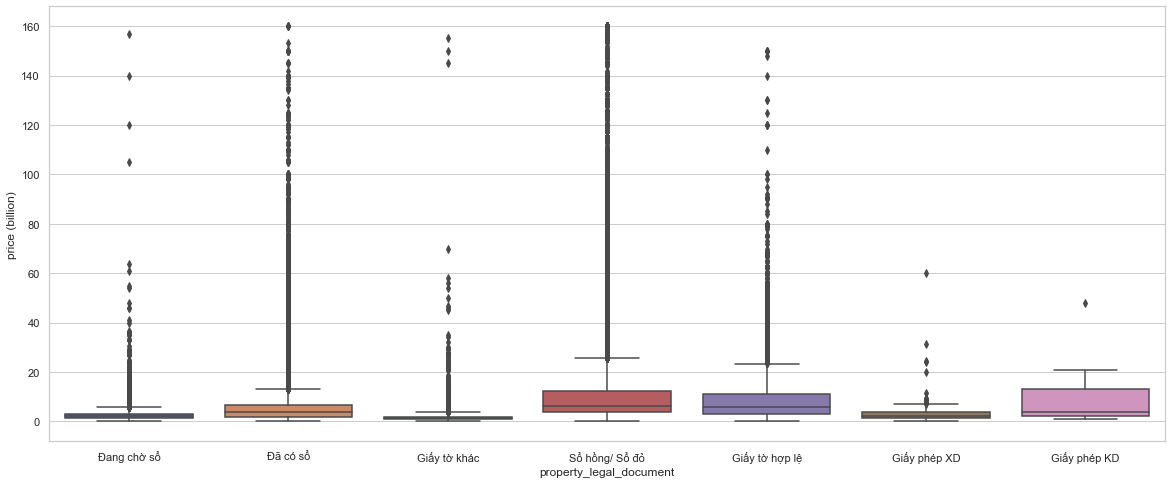

In [265]:
plt.figure(figsize=(20, 8))
sns.boxplot(data=BDS_df6[BDS_df6['price (billion)'] <= price_mark],
            x='property_legal_document', y='price (billion)')


In [266]:
BDS_df6['property_legal_document'].replace({"Sổ hồng/ Sổ đỏ": "Đã có sổ",
                                            "Giấy tờ hợp lệ": "Giấy tờ khác",
                                            "Giấy phép XD": "Giấy tờ khác",
                                            "Giấy phép KD": "Giấy tờ khác"}, inplace=True)


In [95]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='most_frequent')
property_legal_document = imp.fit_transform(
    BDS_df6['property_legal_document'].values.reshape(-1, 1))


In [96]:
# BDS_df6['property_legal_document'] = property_legal_document.flatten()


In [267]:
# Load lại giá trị đã fit_transform trước đó
BDS_df6_old = pd.read_csv('data version/BDS_df6.csv')
BDS_df6['property_legal_document'] = BDS_df6_old.property_legal_document
BDS_df6['property_legal_document'] = BDS_df6['property_legal_document'].astype('category')

<AxesSubplot:xlabel='property_legal_document', ylabel='price (billion)'>

Text(0.5, 1.0, 'Chưa điền giá trị')

<AxesSubplot:xlabel='property_legal_document', ylabel='price (billion)'>

Text(0.5, 1.0, 'Đã điền giá trị')

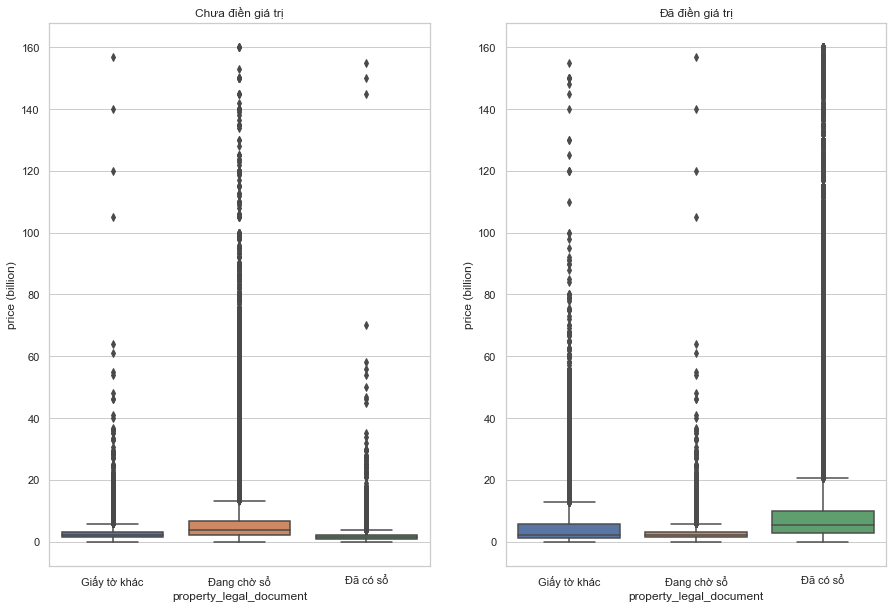

In [268]:
# plt.figure(figsize=(10, 10))
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 10), sharex=True)

sns.boxplot(data=BDS_df1[BDS_df1['price (billion)'] <= price_mark],
            x="property_legal_document", y="price (billion)", ax=axes[0])
axes[0].set_title("Chưa điền giá trị")
sns.boxplot(data=BDS_df6[BDS_df6['price (billion)'] <= price_mark],
            x="property_legal_document", y="price (billion)", ax=axes[1])
axes[1].set_title("Đã điền giá trị")


In [269]:
BDS_df6.to_csv('data version/BDS_df6_new.csv', index=False)


### DF6


In [239]:
BDS_df6 = pd.read_csv('data version/BDS_df6_new.csv')


### floors


In [240]:
BDS_df7 = BDS_df6.copy()


In [270]:
BDS_df7['floors'].unique()


array(['Nhiều hơn 10', 1, 3, 2, 4, 5, 6, 7, 10, 9, 8, nan, '2.0', '1.0',
       '18.0', '23.0', '4.0', '6.0', '3.0', '26.0', '35.0', '10.0',
       '30.0', '15.0', '12.0', '8.0', '40.0', '38.0', '5.0', '29.0',
       '19.0', '31.0', '9.0', '33.0', '17.0', '20.0', '13.0', '22.0',
       '24.0', '11.0', '14.0', '27.0', '16.0', '25.0', '36.0', '7.0',
       '28.0', '32.0', 12, 29, 23, 19, 40, 30, 27, 15, 38, 20, 18, 33, 22,
       34, 36, 16, 14, 31, 24, 21, 28, 11, 17, 151, 26, 25, 50, 61, 13,
       39, 35, 48, 42, 44, 37, 32, 75, 2000, 988, 333, 163, 45, 144, 43,
       91, 46, 55, 52], dtype=object)

In [285]:
# BDS_df7['floors'] = BDS_df7['floors'].apply(
#     DPP.convertNum2Int, convert_dtype=False)

BDS_df7['floors'] = BDS_df7['floors'].apply(lambda x: int(
    float(x)) if isinstance(x, str) and "Nhiều hơn" not in x else x)


In [286]:
floors = BDS_df7['floors'].unique()[1:]
floors[floors > 81]


array([151, 2000, 988, 333, 163, 144, 91], dtype=object)

In [287]:
# Loại các tin đăng có số lầu lớn hơn 81 vì nó không tồn tại ở Việt Nam hiện tại
BDS_df7 = BDS_df7[~BDS_df1['floors'].isin(
    floors[floors > 81])].reset_index(drop=True)


In [288]:
# Gom nhóm các giá trị có số lầu nhiều hơn 10
BDS_df7['floors'].replace(floors[floors > 10], 'Nhiều hơn 10', inplace=True)


In [289]:
# Chuyển floors về dạng category
BDS_df7['floors'] = BDS_df7['floors'].astype('category')


<Figure size 720x720 with 0 Axes>

<AxesSubplot:xlabel='price (billion)', ylabel='floors'>

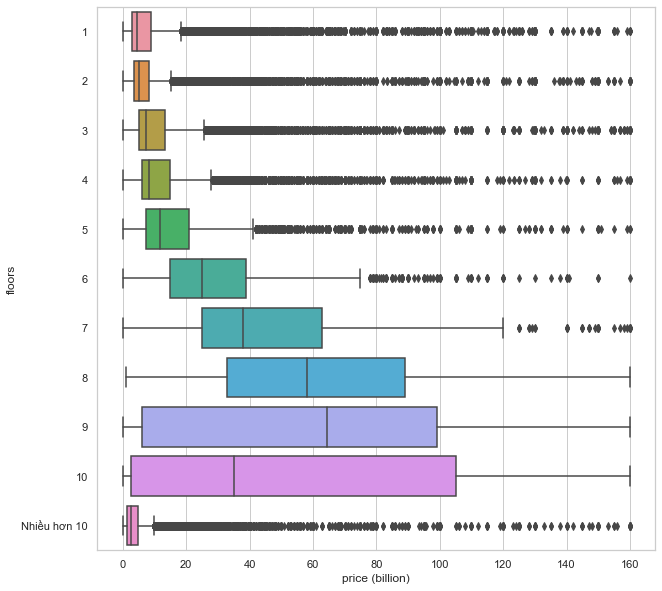

In [290]:
plt.figure(figsize=(10, 10))
sns.boxplot(data=BDS_df7[BDS_df7['price (billion)'] <=
            price_mark], y="floors", x="price (billion)", orient='h')


In [291]:
BDS_df7['floors'].replace({'Nhiều hơn 10': 11}, inplace=True)


In [127]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=11)


In [128]:
floors = imputer.fit_transform(BDS_df7[['floors', 'price (million)']])


In [129]:
floors = [int(x[0]) if x[0] <= 10 else 'Nhiều hơn 10' for x in floors]


In [130]:
# BDS_df7['floors'] = floors
# # Chuyển floors về dạng category
# BDS_df7['floors'] = BDS_df7['floors'].astype('category')


In [292]:
# Load lại giá trị đã fit_transform trước đó
BDS_df7_old = pd.read_csv('data version/BDS_df7.csv')
BDS_df7['floors'] = BDS_df7_old.floors
BDS_df7['floors'] = BDS_df7['floors'].astype('category')

<AxesSubplot:xlabel='floors', ylabel='price (billion)'>

Text(0.5, 1.0, 'Chưa điền giá trị')

<AxesSubplot:xlabel='floors', ylabel='price (billion)'>

Text(0.5, 1.0, 'Đã điền giá trị')

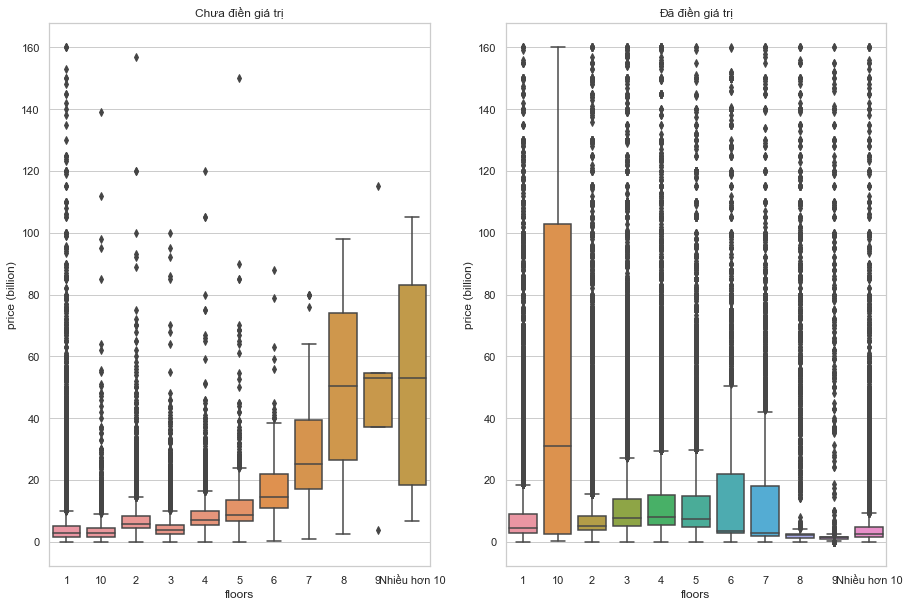

In [293]:
# plt.figure(figsize=(10, 10))
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 10), sharex=True)

sns.boxplot(data=BDS_df1[BDS_df1['price (billion)'] <= price_mark],
            x="floors", y="price (billion)", ax=axes[0])
axes[0].set_title("Chưa điền giá trị")
sns.boxplot(data=BDS_df7[BDS_df7['price (billion)'] <= price_mark],
            x="floors", y="price (billion)", ax=axes[1])
axes[1].set_title("Đã điền giá trị")


In [294]:
BDS_df7.to_csv('data version/BDS_df7_new.csv', index=False)


### DF7


In [311]:
BDS_df7 = pd.read_csv('data version/BDS_df7_new.csv')


### rooms


In [312]:
BDS_df8 = BDS_df7.copy()


In [313]:
BDS_df8['rooms'].unique()


array(['2', '1', '3', '4', '10', '8', '6', '9', '5', '7', 'Nhiều hơn 10',
       nan, '3.0', '18.0', '24.0', '2.0', '4.0', '35.0', '1.0', '30.0',
       '5.0', '8.0', '6.0', '22.0', '12.0', '54.0', '68.0', '36.0',
       '10.0', '7.0', '20.0', '55.0', '14.0', '16.0', '15.0', '13.0',
       '9.0', 4.0, 25.0, 1.0, 2.0, 3.0, 24.0, 5.0, 12.0, 6.0, 16.0, 18.0,
       17.0, 35.0, 8.0, 32.0, 13.0, 7.0, 14.0, 10.0, 30.0, 28.0, 20.0,
       9.0, 15.0, 11.0, 22.0, 21.0, 27.0, 95.0, 19.0, 37.0, 60.0, 40.0,
       62.0, 50.0, 120.0, 42.0, 68.0, 100.0, 36.0, 33.0, 23.0, 29.0, 72.0,
       45.0, 58.0, 31.0, 192.0, 26.0, 44.0, 160.0, 48.0, 65.0, 74.0, 34.0,
       41.0, 39.0, 80.0, 43.0, 104.0, 46.0, 51.0, 89.0, 84.0, 63.0, 61.0,
       56.0, 105.0, 55.0, 71.0, 54.0, 67.0, 70.0, 85.0, 88.0, 111.0,
       101.0, 150.0, 123.0, 90.0, 373.0, 145.0, 114.0, 57.0, 66.0, 75.0,
       115.0, 94.0, 49.0, 69.0, 162.0, 102.0, 52.0, 110.0, 195.0, 170.0,
       64.0, 76.0, 128.0, 86.0, 53.0, 81.0, 38.0, 140.0, 98.

In [314]:
# BDS_df8['rooms'] = BDS_df8['rooms'].apply(
#     DPP.convertNum2Int, convert_dtype=False)

BDS_df8['rooms'] = BDS_df8['rooms'].apply(lambda x: int(
    float(x)) if isinstance(x, str) and "Nhiều hơn" not in x else x)


In [315]:
# Chuyển rooms về dạng category
BDS_df8['rooms'] = BDS_df8['rooms'].astype('category')


In [316]:
rooms = list(BDS_df8['rooms'].unique())
rooms.remove('Nhiều hơn 10')


In [317]:
rooms = np.array(rooms)
# Gom nhóm các giá trị có số phòng nhiều hơn 10
BDS_df8['rooms'].replace(rooms[rooms > 10], 'Nhiều hơn 10', inplace=True)


In [318]:
BDS_df8['rooms'].replace({'Nhiều hơn 10': 11}, inplace=True)


In [181]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=11)


In [182]:
rooms = imputer.fit_transform(BDS_df8[['rooms', 'price (million)']])


In [183]:
rooms = [int(x[0]) if x[0] <= 10 else 'Nhiều hơn 10' for x in rooms]


In [184]:
# BDS_df8['rooms'] = rooms
# # Chuyển rooms về dạng category
# BDS_df8['rooms'] = BDS_df8['rooms'].astype('category')


In [319]:
# Load lại giá trị đã fit_transform trước đó
BDS_df8_old = pd.read_csv('data version/BDS_df8.csv')
BDS_df8['rooms'] = BDS_df8_old.rooms
BDS_df8['rooms'] = BDS_df8['rooms'].astype('category')

<AxesSubplot:xlabel='rooms', ylabel='price (billion)'>

Text(0.5, 1.0, 'Chưa điền giá trị')

<AxesSubplot:xlabel='rooms', ylabel='price (billion)'>

Text(0.5, 1.0, 'Đã điền giá trị')

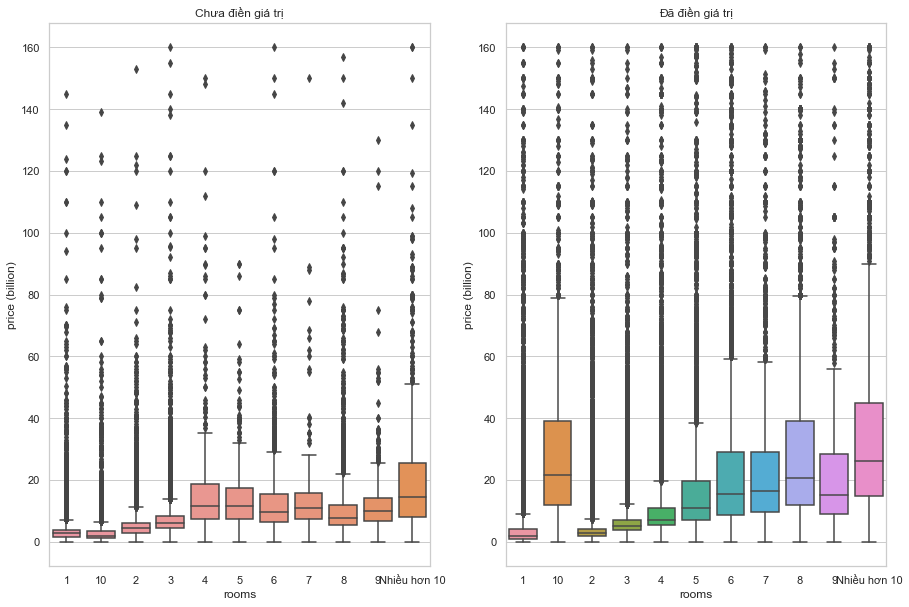

In [320]:
# plt.figure(figsize=(10, 10))
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 10), sharex=True)

sns.boxplot(data=BDS_df1[BDS_df1['price (billion)'] <= price_mark],
            x="rooms", y="price (billion)", ax=axes[0])
axes[0].set_title("Chưa điền giá trị")
sns.boxplot(data=BDS_df8[BDS_df8['price (billion)'] <= price_mark],
            x="rooms", y="price (billion)", ax=axes[1])
axes[1].set_title("Đã điền giá trị")


### list time


In [322]:
BDS_df8['list_time'] = pd.to_datetime(BDS_df8['list_time'], format="%d/%m/%Y")


In [323]:
BDS_df8['list_time'].sample(5)


155796   2021-11-05
90017    2021-10-18
161507   2021-11-05
145698   2021-11-04
117954   2021-10-24
Name: list_time, dtype: datetime64[ns]

In [324]:
BDS_df8.to_csv('data version/BDS_df8_new.csv', index=False)


### DF8


In [325]:
BDS_df8 = pd.read_csv('data version/BDS_df8_new.csv')


## 3.1 Overview


In [326]:
BDS_df8.drop(["floornumber", "balconydirection", "property_status",
              "furnishing_sell"], axis=1, inplace=True)


In [327]:
BDS_df9 = BDS_df8.copy()
BDS_df9.dropna(inplace=True)


In [328]:
BDS_df9.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 168676 entries, 218 to 211613
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   list_time                168676 non-null  object 
 1   ward                     168676 non-null  object 
 2   area                     168676 non-null  object 
 3   region                   168676 non-null  object 
 4   direction                168676 non-null  object 
 5   property_legal_document  168676 non-null  object 
 6   size (m2)                168676 non-null  float64
 7   rooms                    168676 non-null  object 
 8   toilets                  168676 non-null  object 
 9   floors                   168676 non-null  object 
 10  living_size (m2)         168676 non-null  float64
 11  width (m)                168676 non-null  float64
 12  length (m)               168676 non-null  float64
 13  price (billion)          168676 non-null  float64
 14  ty

In [329]:
BDS_df9.describe(include='all')


list_time       ward         area       region direction  \
count       168676     168676       168676       168676    168676   
unique         326        442           44            3         8   
top     2021-11-07  Phường 12  Quận Gò Vấp  Hồ Chí Minh  Đông Nam   
freq         21205       5513        16671       140649    130092   
mean           NaN        NaN          NaN          NaN       NaN   
std            NaN        NaN          NaN          NaN       NaN   
min            NaN        NaN          NaN          NaN       NaN   
25%            NaN        NaN          NaN          NaN       NaN   
50%            NaN        NaN          NaN          NaN       NaN   
75%            NaN        NaN          NaN          NaN       NaN   
max            NaN        NaN          NaN          NaN       NaN   

       property_legal_document     size (m2)   rooms toilets        floors  \
count                   168676  1.686760e+05  168676  168676        168676   
unique                       3           NaN      11       7            11   
top                   Đã có sổ           NaN       2       2  Nhiều hơn 10   
freq                    160939           NaN   55497   44244         37798   
mean                       NaN  1.117982e+04     NaN     NaN           NaN   
std                        NaN  2.393482e+06     NaN     NaN           NaN   
min                        NaN  1.000000e+00     NaN     NaN           NaN   
25%                        NaN  5.400000e+01     NaN     NaN           NaN   
50%                        NaN  8.000000e+01     NaN     NaN           NaN   
75%                        NaN  1.320000e+02     NaN     NaN           NaN   
max                        NaN  7.500000e+08     NaN     NaN           NaN   

        living_size (m2)      width (m)     length (m)  price (billion)  \
count       1.686760e+05  168676.000000  168676.000000     1.686760e+05   
unique               NaN            NaN            NaN              NaN   
top                  NaN            NaN            NaN              NaN   
freq                 NaN            NaN            NaN              NaN   
mean        1.030568e+05      13.820290      29.957055     1.034138e+04   
std         2.377871e+07     798.764555     592.377506     4.242261e+06   
min         1.000000e+00       0.130000       0.011790     3.700000e-04   
25%         9.000000e+01       4.000000      12.000000     2.850000e+00   
50%         1.800000e+02       5.000000      16.500000     5.300000e+00   
75%         4.200000e+02       6.000000      21.000000     1.000000e+01   
max         7.500000e+09  315375.000000  135000.000000     1.742304e+09   

       type_real_estate    website     front_road  
count            168676     168676  168676.000000  
unique                4          2            NaN  
top               Nhà ở  alonhadat            NaN  
freq             125593      94639            NaN  
mean                NaN        NaN       8.157242  
std                 NaN        NaN       4.668028  
min                 NaN        NaN       0.000000  
25%                 NaN        NaN       5.000000  
50%                 NaN        NaN       7.000000  
75%                 NaN        NaN      10.000000  
max                 NaN        NaN      26.000000

In [330]:
BDS_df9.to_csv('BDS_new.csv', index=False)


In [331]:
BDS_df9['list_time'] = pd.to_datetime(BDS_df9['list_time'])
BDS_df9['direction'] = BDS_df9['direction'].astype('category')
BDS_df9['property_legal_document'] = BDS_df9['property_legal_document'].astype(
    'category')
BDS_df9['rooms'] = BDS_df9['rooms'].astype('category')
BDS_df9['toilets'] = BDS_df9['toilets'].astype('category')
BDS_df9['floors'] = BDS_df9['floors'].astype('category')


In [333]:
BDS_df9 = pd.read_csv('BDS_new.csv')


In [334]:
BDS_df10 = BDS_df9.copy()


## 3.2 Numeric variables


<Figure size 720x576 with 0 Axes>

<AxesSubplot:>

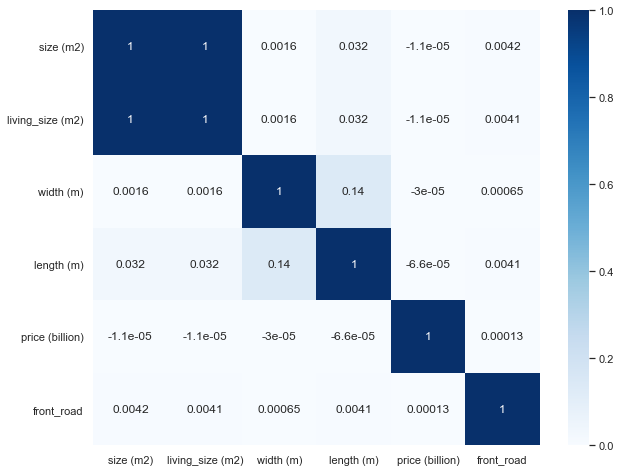

In [335]:
plt.figure(figsize=(10, 8))
sns.heatmap(data=BDS_df9.corr(), cmap="Blues", annot=True)


### Price


In [337]:
BDS_df9['price (billion)'].describe()


count    1.686760e+05
mean     1.034138e+04
std      4.242261e+06
min      3.700000e-04
25%      2.850000e+00
50%      5.300000e+00
75%      1.000000e+01
max      1.742304e+09
Name: price (billion), dtype: float64

In [338]:
price_mark = BDS_df9['price (billion)'].quantile(0.99)
price_mark


120.0

In [339]:
outlier_df = BDS_df9[BDS_df9['price (billion)'] > price_mark].reset_index(
    drop=True)


In [340]:
BDS_df9 = BDS_df9[~(BDS_df9['price (billion)'] > price_mark)
                  ].reset_index(drop=True)


In [341]:
BDS_df9.shape


(167052, 17)

<AxesSubplot:>

Text(0.5, 1.0, 'Các giá trị trong vùng quan sát')

<AxesSubplot:>

Text(0.5, 1.0, 'Các giá trị outlier')

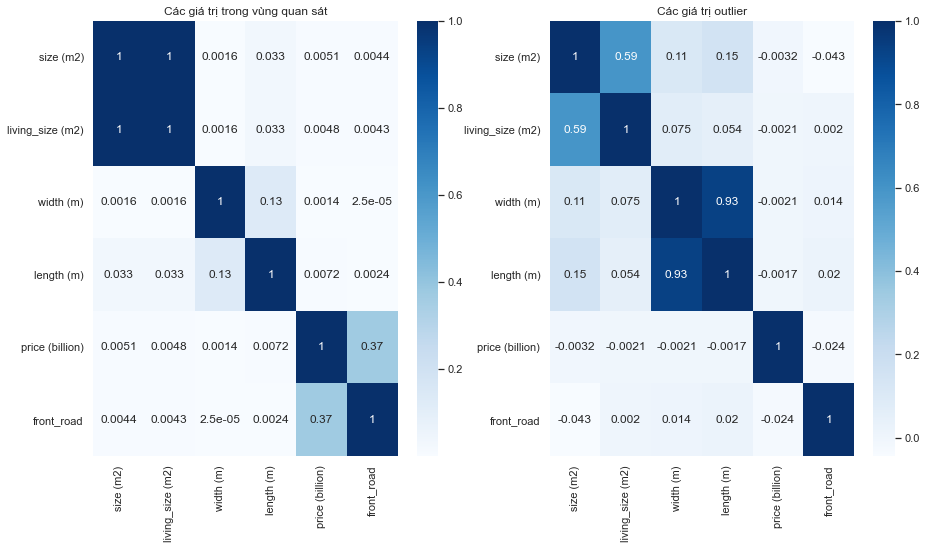

In [342]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 8))

sns.heatmap(data=BDS_df9.corr(), cmap="Blues", annot=True, ax=axes[0])
axes[0].set_title("Các giá trị trong vùng quan sát")
sns.heatmap(data=outlier_df.corr(), cmap="Blues", annot=True, ax=axes[1])
axes[1].set_title("Các giá trị outlier")


<div> => Đối với các giá trị nằm trong vùng quan sát của dữ liệu, chiều rộng mặt đường có ảnh hưởng đồng biến đến giá bất động sản. Diện tích đất và diện tích sử dụng có mối quan hệ hoàn toàn đồng biến</div>
<div>  </div>


<AxesSubplot:>

Text(0.5, 1.0, 'Nhà ở')

<AxesSubplot:>

Text(0.5, 1.0, 'Đất')

<AxesSubplot:>

Text(0.5, 1.0, 'Khác')

<AxesSubplot:>

Text(0.5, 1.0, 'Căn hộ - Chung cư')

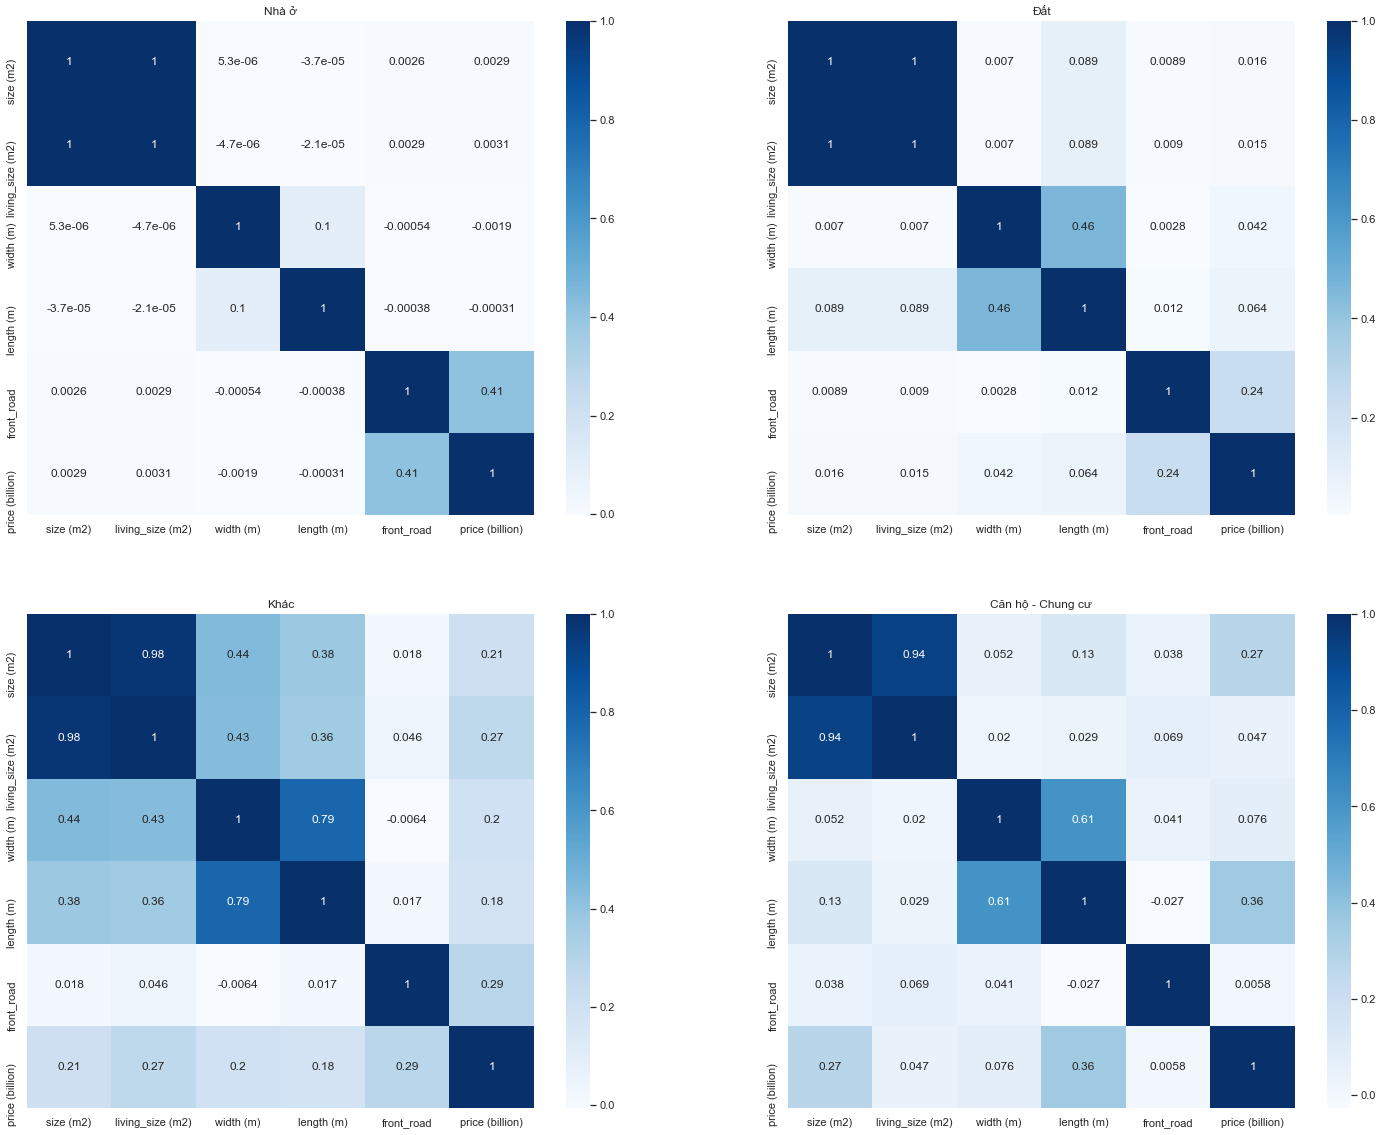

In [415]:
fig, axes = plt.subplots(2, 2, figsize=(25, 20))
col, row = 0, 0
features = ['size (m2)', 'living_size (m2)', 'width (m)', 'length (m)', 'front_road', 'price (billion)']
for val in BDS_df9.type_real_estate.unique():
    sns.heatmap(data=BDS_df9[BDS_df9['type_real_estate'] == val][features].corr(), cmap="Blues", annot=True, ax=axes[row, col])
    axes[row, col].set_title(val)
    col += 1
    if col > 1:
        col = 0
        row += 1

<Figure size 1440x720 with 0 Axes>

Text(0.5, 1.0, 'Sự phân bố giá bất động sản')

<AxesSubplot:title={'center':'Sự phân bố giá bất động sản'}, xlabel='price (billion)', ylabel='Count'>

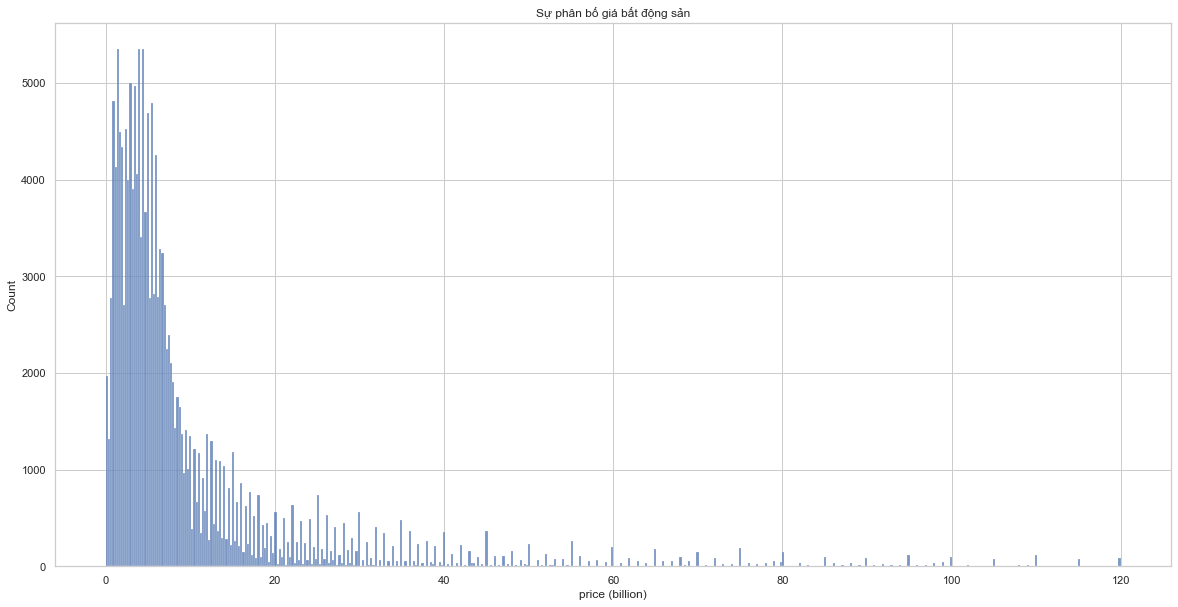

In [344]:
plt.figure(figsize=(20, 10))
plt.title("Sự phân bố giá bất động sản")
sns.histplot(data=BDS_df9, x="price (billion)")


In [345]:
outlier_df['price (billion)'].describe()


count    1.624000e+03
mean     1.073129e+06
std      4.323455e+07
min      1.210000e+02
25%      1.500000e+02
50%      1.850000e+02
75%      2.850000e+02
max      1.742304e+09
Name: price (billion), dtype: float64

In [14]:
# sns.histplot(data=outlier_df, x="price (million)")


In [15]:
# plt.figure(figsize=(10, 10))
# fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 10))

# sns.histplot(data=BDS_df9, x="price (million)", ax=axes[0])
# axes[0].set_title("Các giá trị trong vùng quan sát")
# sns.histplot(data=outlier_df, x="price (million)", ax=axes[1])
# axes[1].set_title("Các giá trị outlier)


=> Giá bất động sản phân bổ chủ yếu trong khoảng dưới 11 tỷ đồng


In [347]:
group_price = ['Giá rẻ', 'Tầm trung', 'Cao cấp', 'Siêu cao cấp']
# Giá rẻ :0 - 2 tỷ
# Tầm trung: 2 - 5 tỷ
# Cao cấp: 5 - 20 tỷ
# Siêu cao cấp: trên 20 tỷ
bins_price = [0, 2, 3, 20, max(BDS_df9['price (billion)'])]
BDS_df9['price-binned'] = pd.cut(BDS_df9['price (billion)'],
                                 bins=bins_price, labels=group_price)


In [348]:
BDS_df9['price-binned'].value_counts()


Cao cấp         104072
Giá rẻ           29177
Siêu cao cấp     17601
Tầm trung        16202
Name: price-binned, dtype: int64

<Figure size 1440x576 with 0 Axes>

Text(0.5, 1.0, 'Số lượng giá bất động sản theo phân khúc sản phẩm')

<AxesSubplot:title={'center':'Số lượng giá bất động sản theo phân khúc sản phẩm'}, xlabel='price-binned', ylabel='count'>

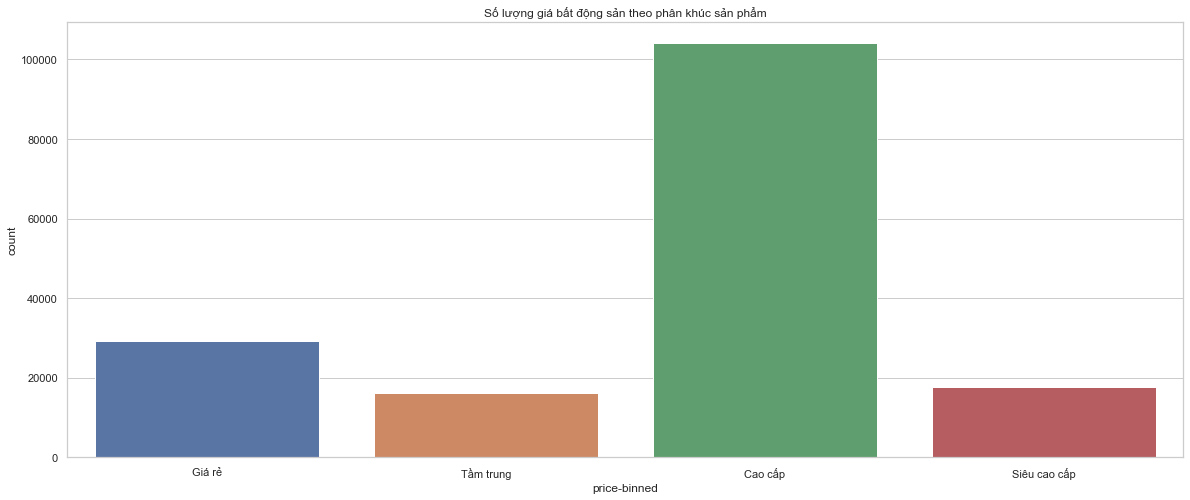

In [349]:
plt.figure(figsize=(20, 8))
plt.title("Số lượng giá bất động sản theo phân khúc sản phẩm")
sns.countplot(x='price-binned', data=BDS_df9)


=> Phân khúc giá BĐS tập trung chủ yếu là các BĐS tầm trung và cao cấp


## 3.3 Categorical variables


In [350]:
cate_var = [col for col in BDS_df9.columns if BDS_df9[col].dtype != "float"][:-1]
cate_var


['list_time',
 'ward',
 'area',
 'region',
 'direction',
 'property_legal_document',
 'rooms',
 'toilets',
 'floors',
 'type_real_estate',
 'website']

### Website


In [351]:
BDS_df9['website'].unique()


array(['Chotot', 'alonhadat'], dtype=object)

<Figure size 720x504 with 0 Axes>

Text(0.5, 1.0, 'Phân khúc giá bất động sản trên website')

<AxesSubplot:title={'center':'Phân khúc giá bất động sản trên website'}, xlabel='website', ylabel='price (billion)'>

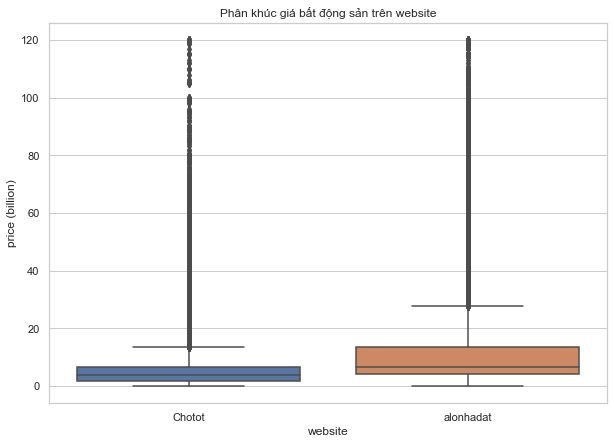

In [355]:
plt.figure(figsize=(10, 7))
plt.title("Phân khúc giá bất động sản trên website")
sns.boxplot(x='website', y='price (billion)',
              data=BDS_df9)


<Figure size 1440x576 with 0 Axes>

Text(0.5, 1.0, 'Phân khúc giá bất động sản trên website')

<AxesSubplot:title={'center':'Phân khúc giá bất động sản trên website'}, xlabel='website', ylabel='count'>

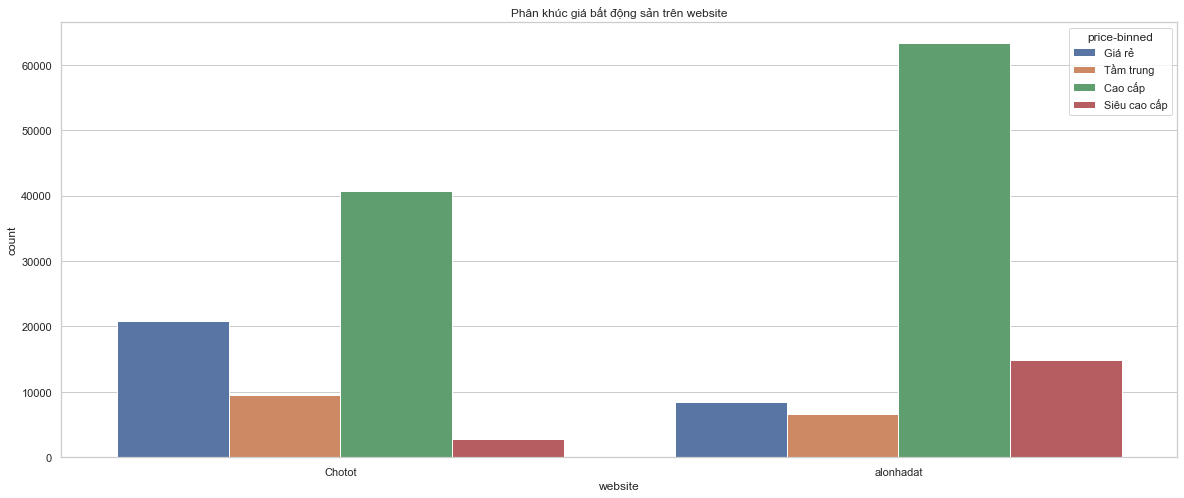

In [356]:
plt.figure(figsize=(20, 8))
plt.title("Phân khúc giá bất động sản trên website")
sns.countplot(x='website', hue='price-binned',
              data=BDS_df9)


<div> => Chotot tập trung chủ yếu các BĐS giá rẻ, tầm trung và cao cấp. Các BĐS siêu cao cấp chỉ chiếm thị phần nhỏ </div>
<div> => alonhadat chủ yếu được đăng bán các sản phẩm cao cấp </div>


### **Region, area, ward**


<Figure size 1080x720 with 0 Axes>

<AxesSubplot:xlabel='region', ylabel='price (billion)'>

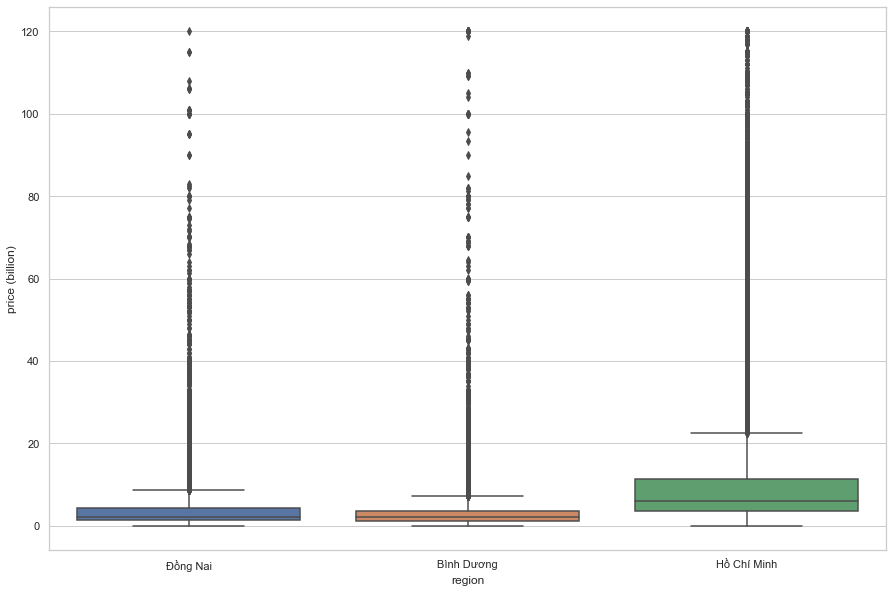

In [357]:
plt.figure(figsize=(15, 10))
# sns.countplot(x='region',data=BDS_df1)
sns.boxplot(x='region', y='price (billion)',
            data=BDS_df9)


=> Ta nhận thấy rằng các BĐS ở khu vực Tp Hồ Chí Minh có sự đa dạng về phân khúc hơn so với Bình Dương, Đồng Nai.


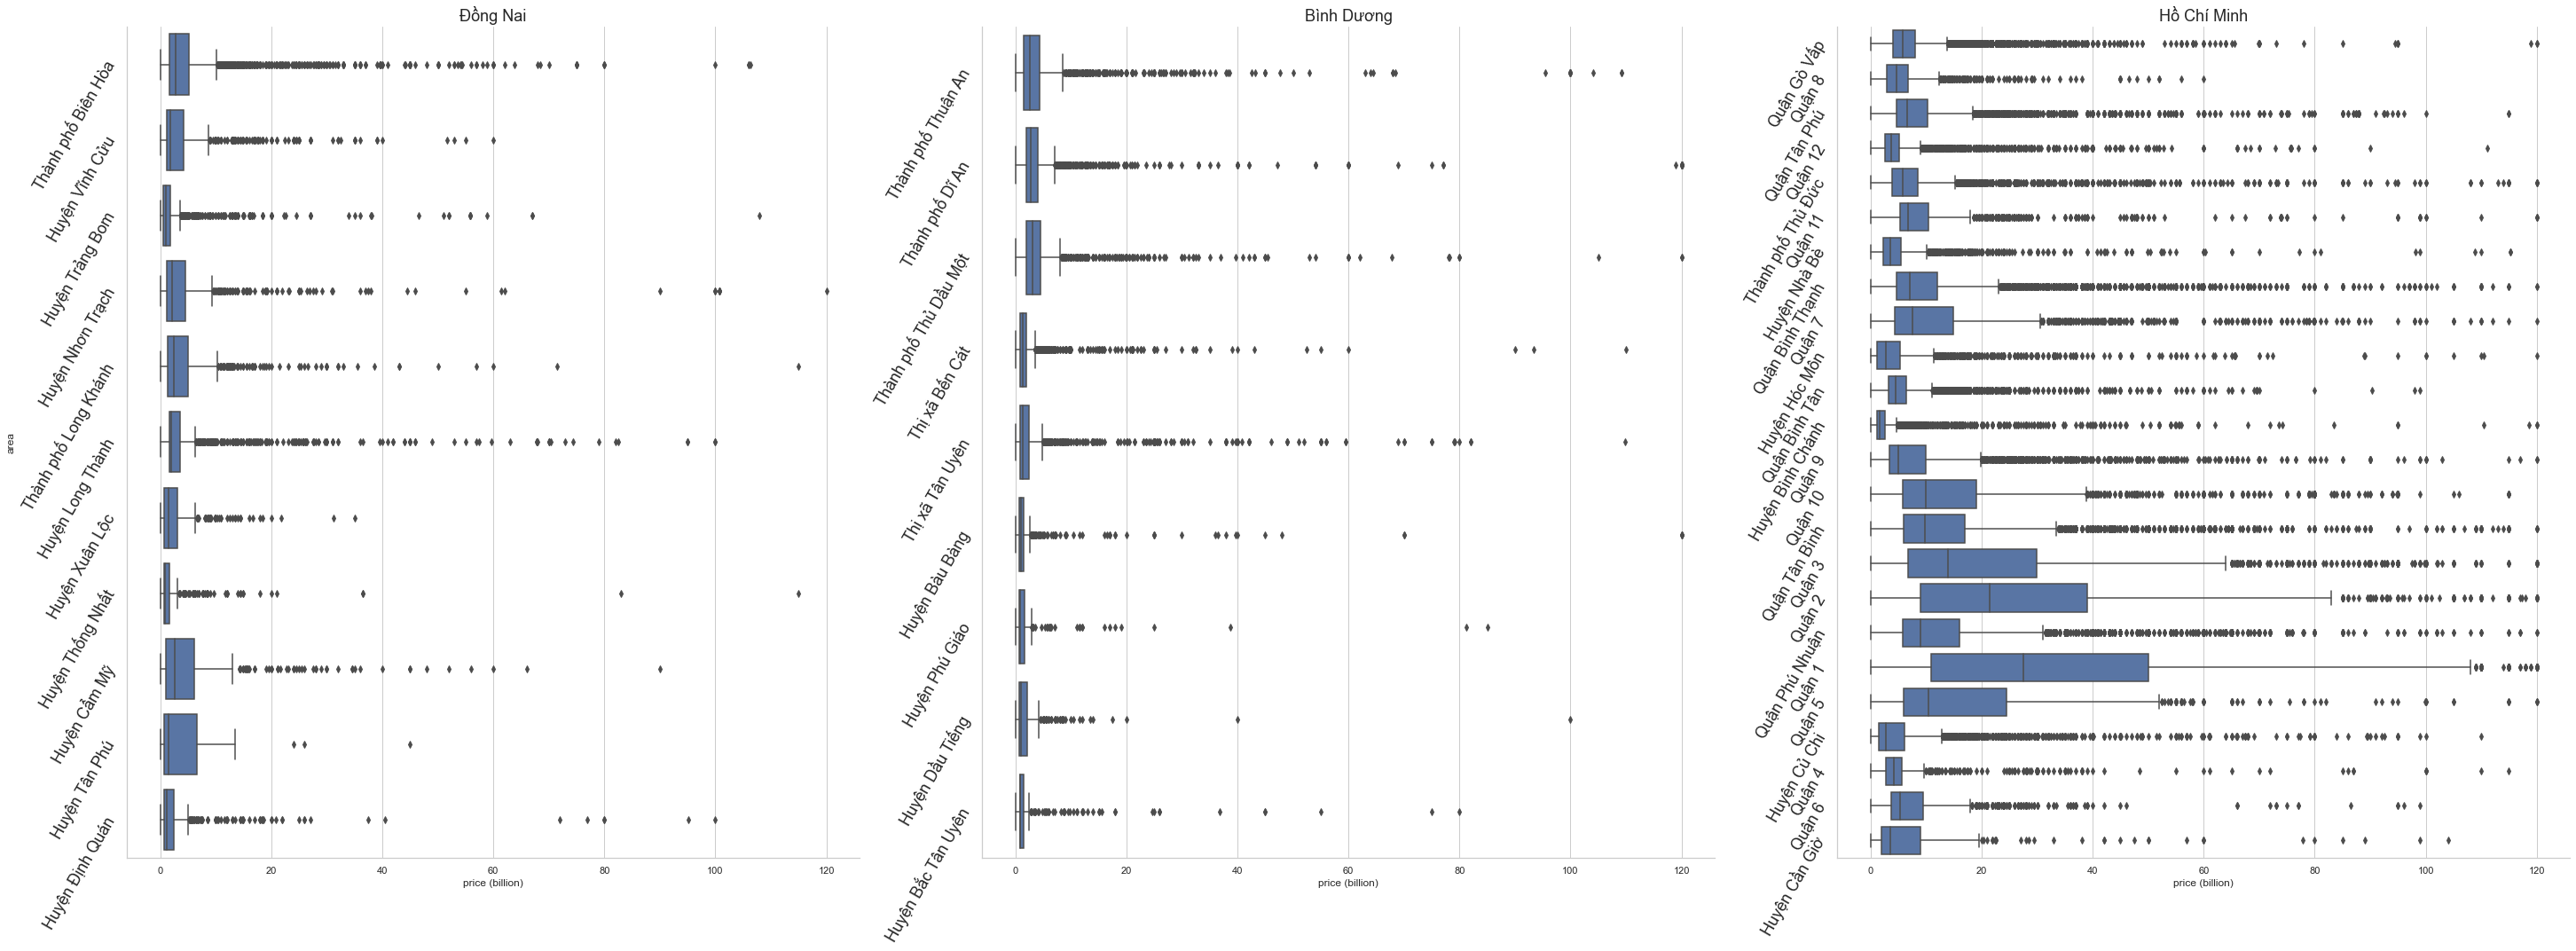

In [358]:
g = sns.FacetGrid(BDS_df9, col='region', sharey=False,
                  sharex=False, height=15, aspect=0.9, col_wrap=3)

g.map(sns.boxplot, 'price (billion)', 'area', orient='h')
g.set_titles("{col_name}", size=18)
# g.fig.suptitle('Giá bất động sản tại các tỉnh')

g.set_yticklabels(rotation=60, fontsize=18)

g.fig.tight_layout()
plt.show()


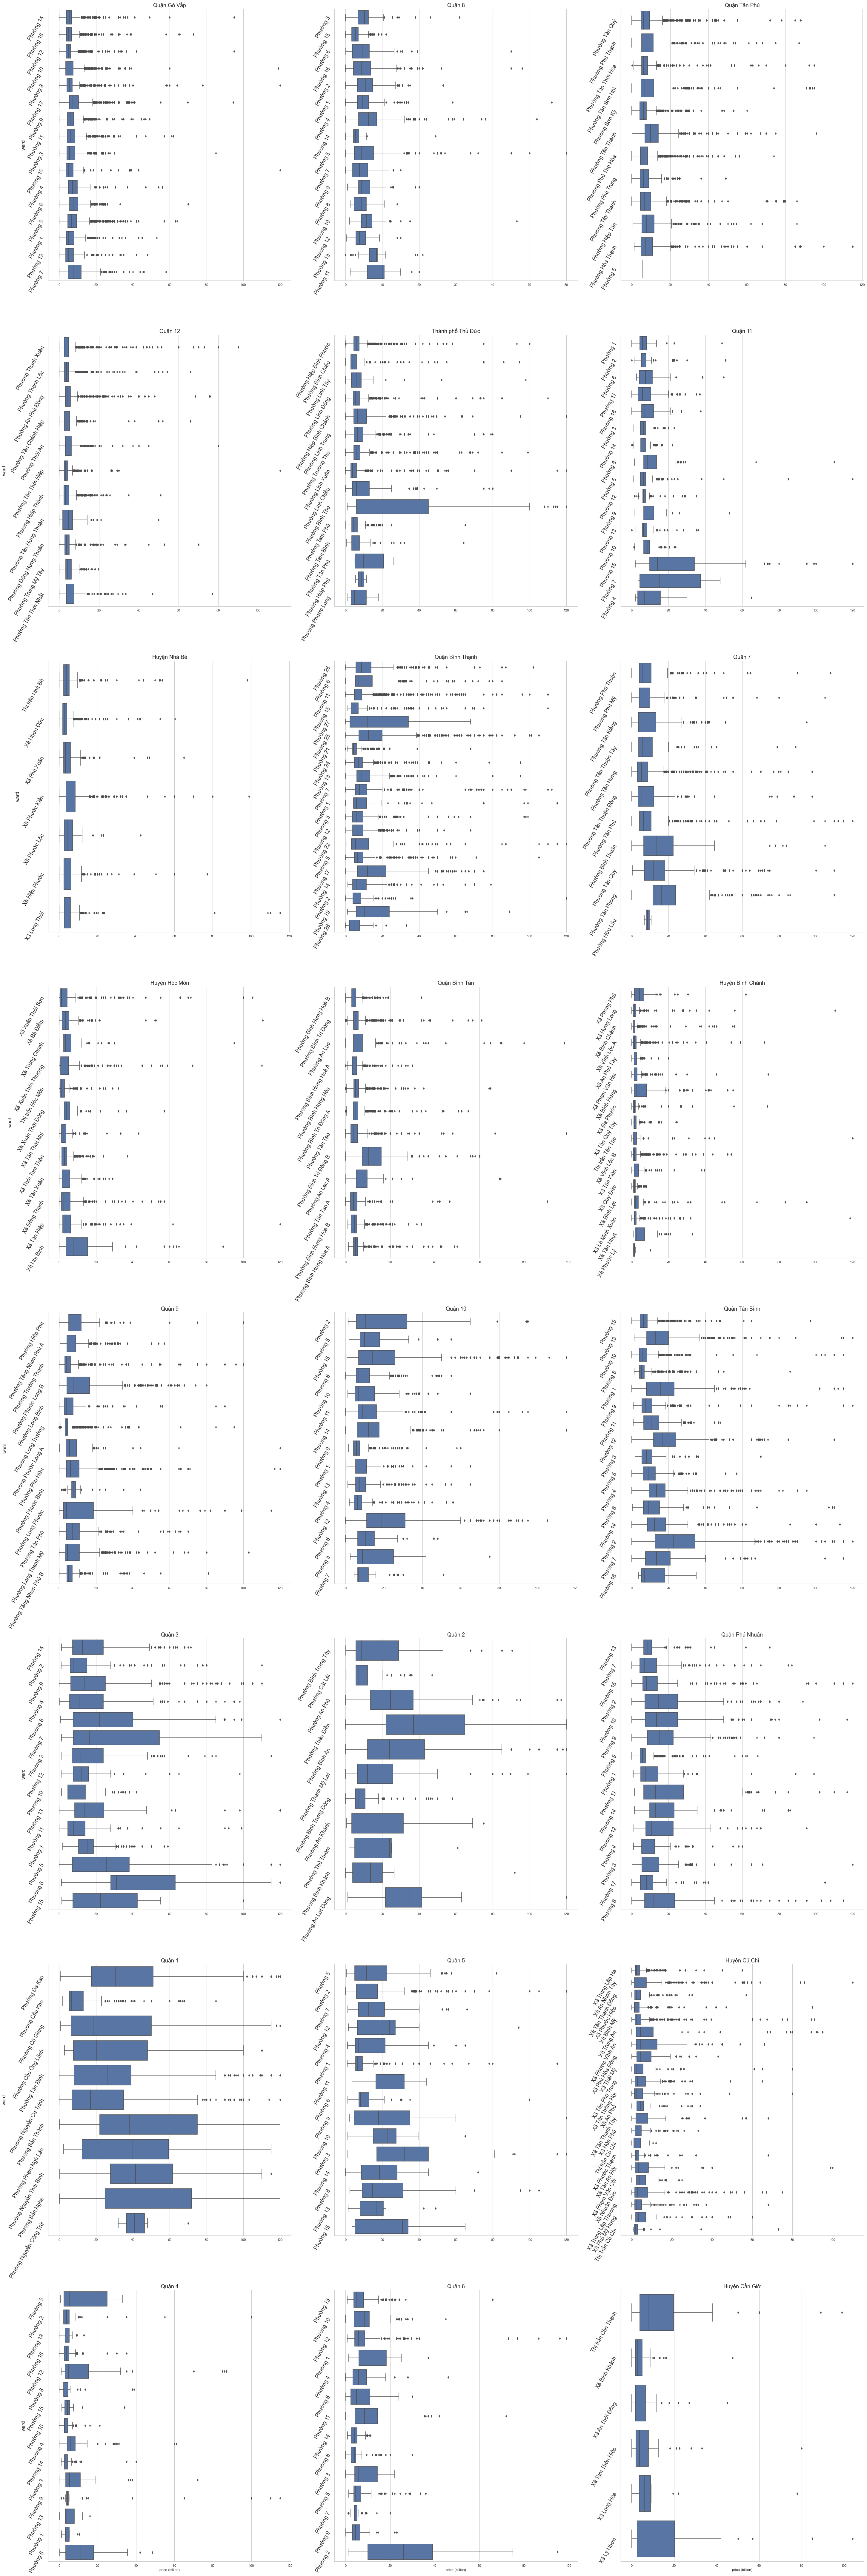

In [359]:
g = sns.FacetGrid(BDS_df9[BDS_df9['region'] == 'Hồ Chí Minh'], col='area', sharey=False,
                  sharex=False, height=15, aspect=0.9, col_wrap=3)

g.map(sns.boxplot, 'price (billion)', 'ward', orient='h')
g.set_titles("{col_name}", size=18)
# g.fig.suptitle('Giá bất động sản tại các tỉnh')

# g.set_xticklabels(fontsize=18)
g.set_yticklabels(rotation=60, fontsize=18)
g.set_ylabels(fontsize=16)


g.fig.tight_layout()
plt.show()


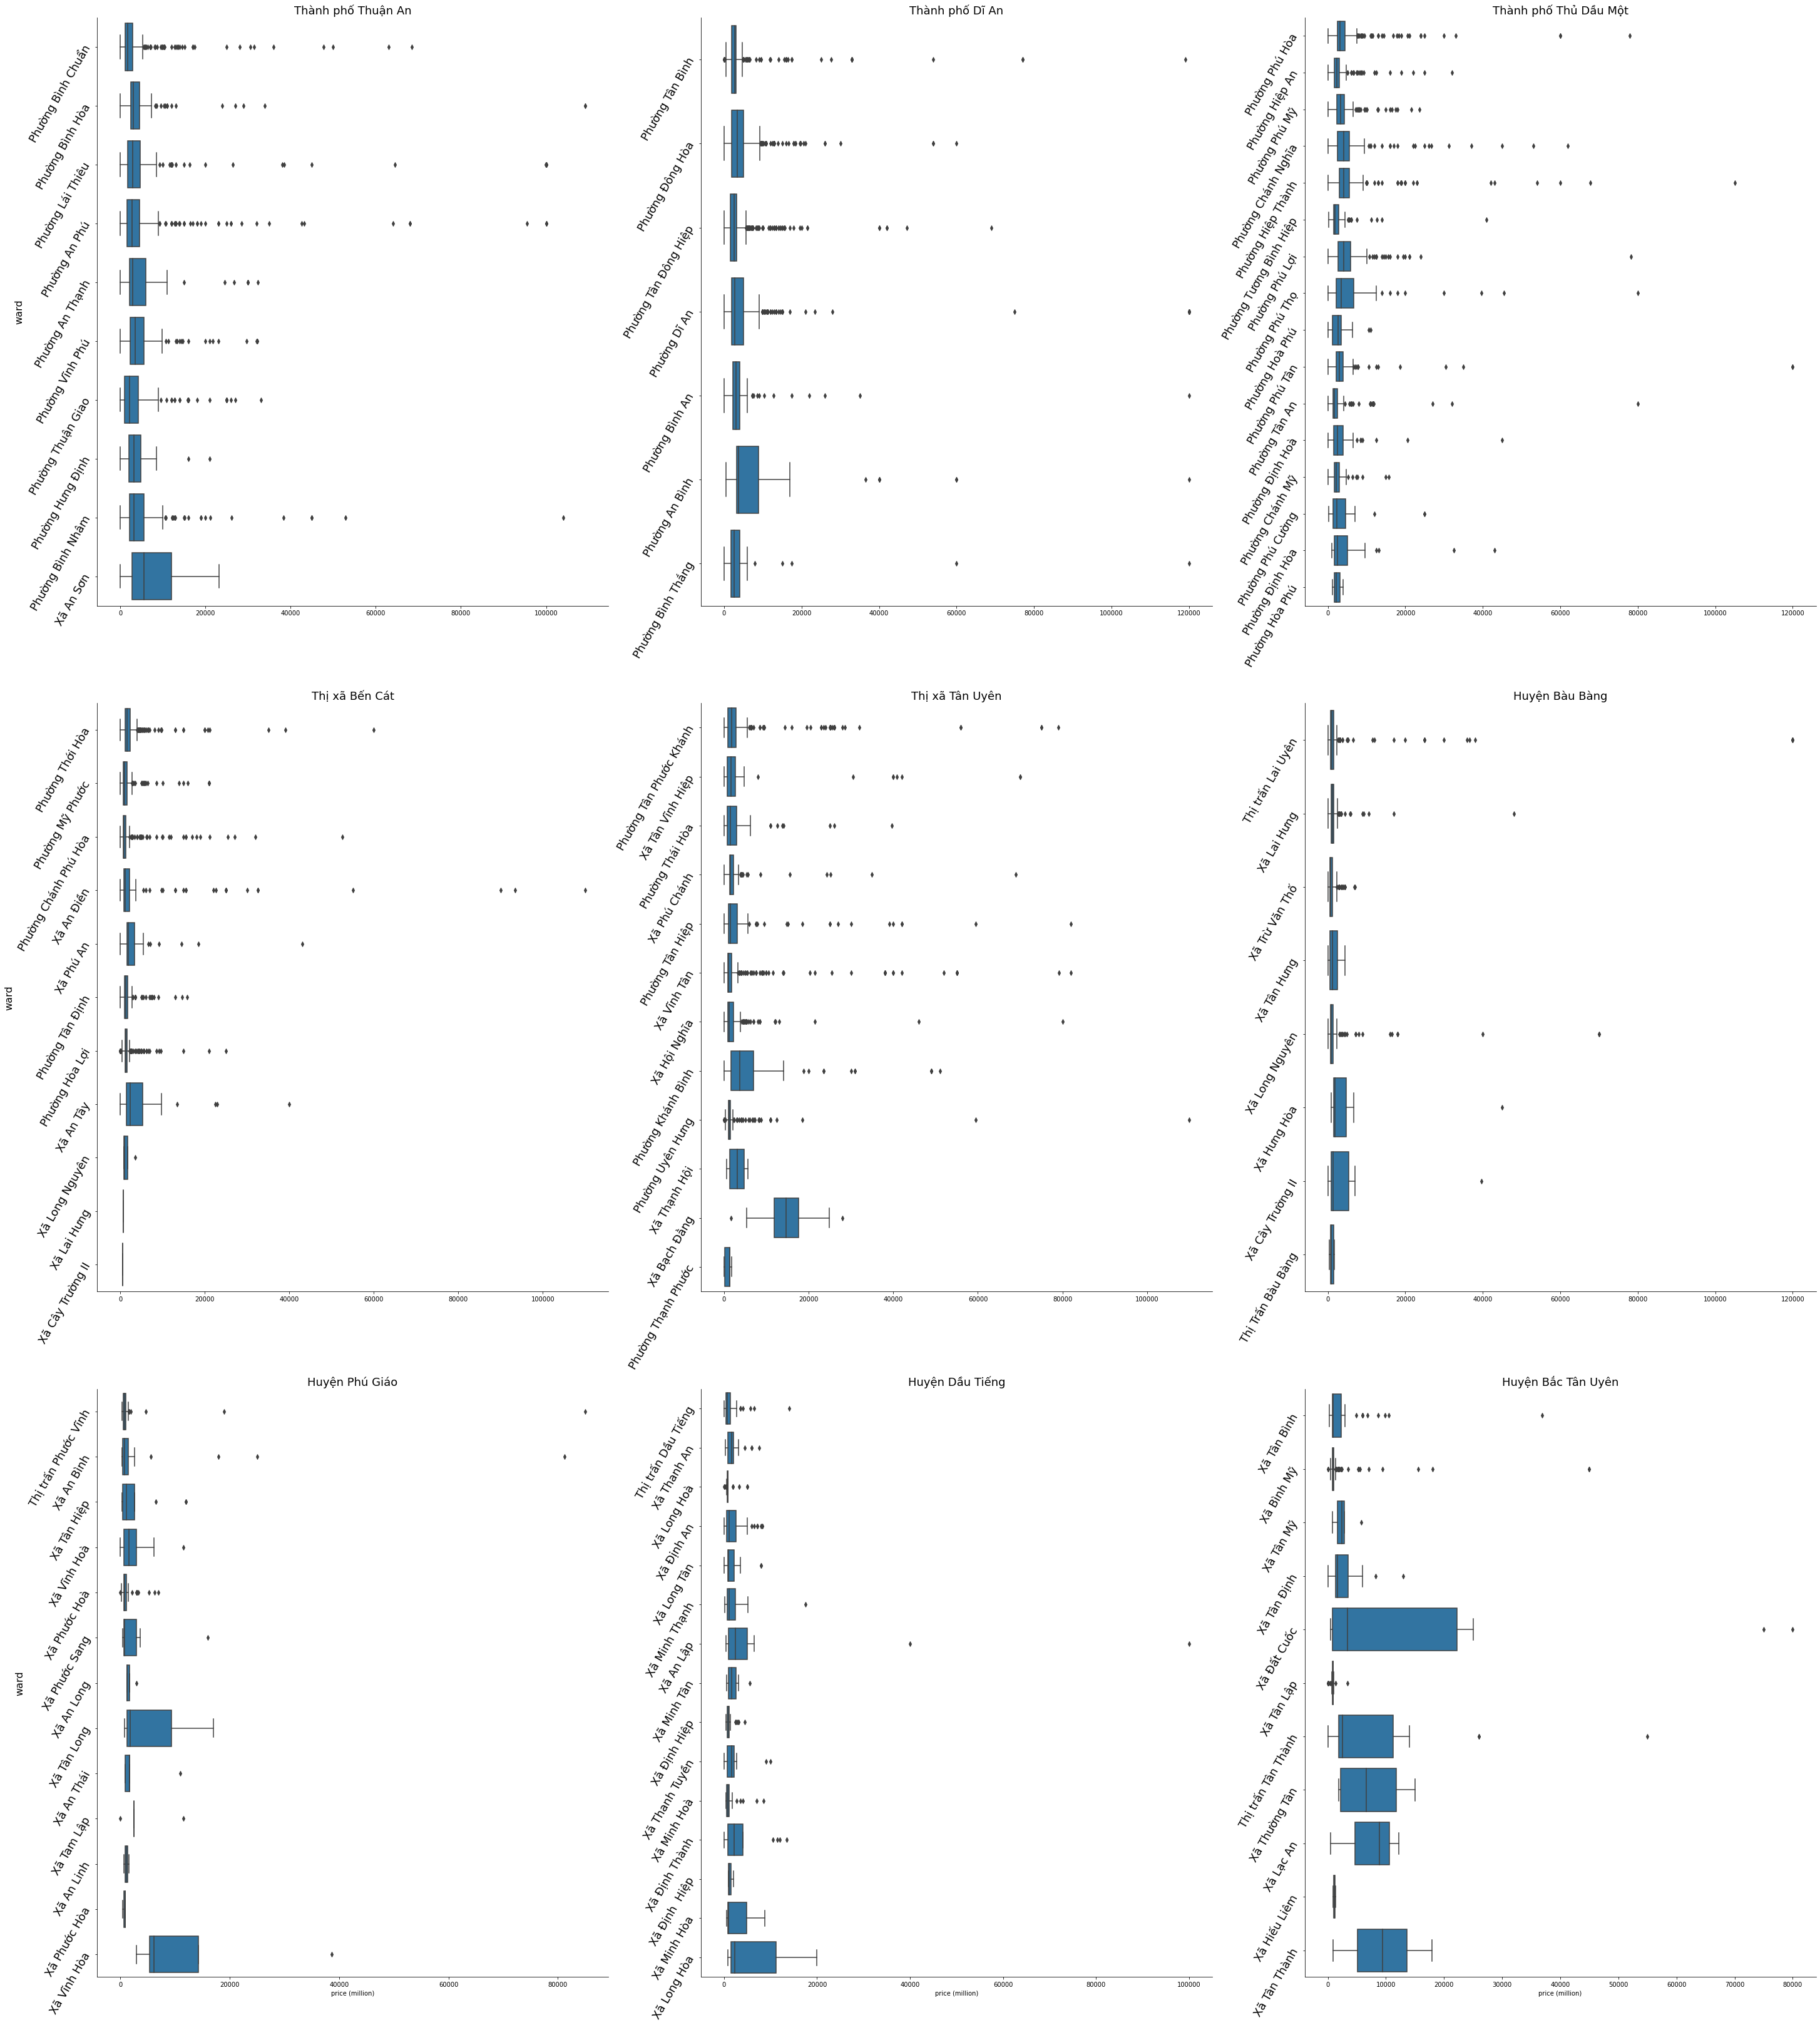

In [26]:
g = sns.FacetGrid(BDS_df9[BDS_df9['region'] == 'Bình Dương'], col='area', sharey=False,
                  sharex=False, height=15, aspect=0.9, col_wrap=3)

g.map(sns.boxplot, 'price (million)', 'ward', orient='h')
g.set_titles("{col_name}", size=18)
# g.fig.suptitle('Giá bất động sản tại các tỉnh')

# g.set_xticklabels(fontsize=18)
g.set_yticklabels(rotation=60, fontsize=18)
g.set_ylabels(fontsize=16)


g.fig.tight_layout()
plt.show()


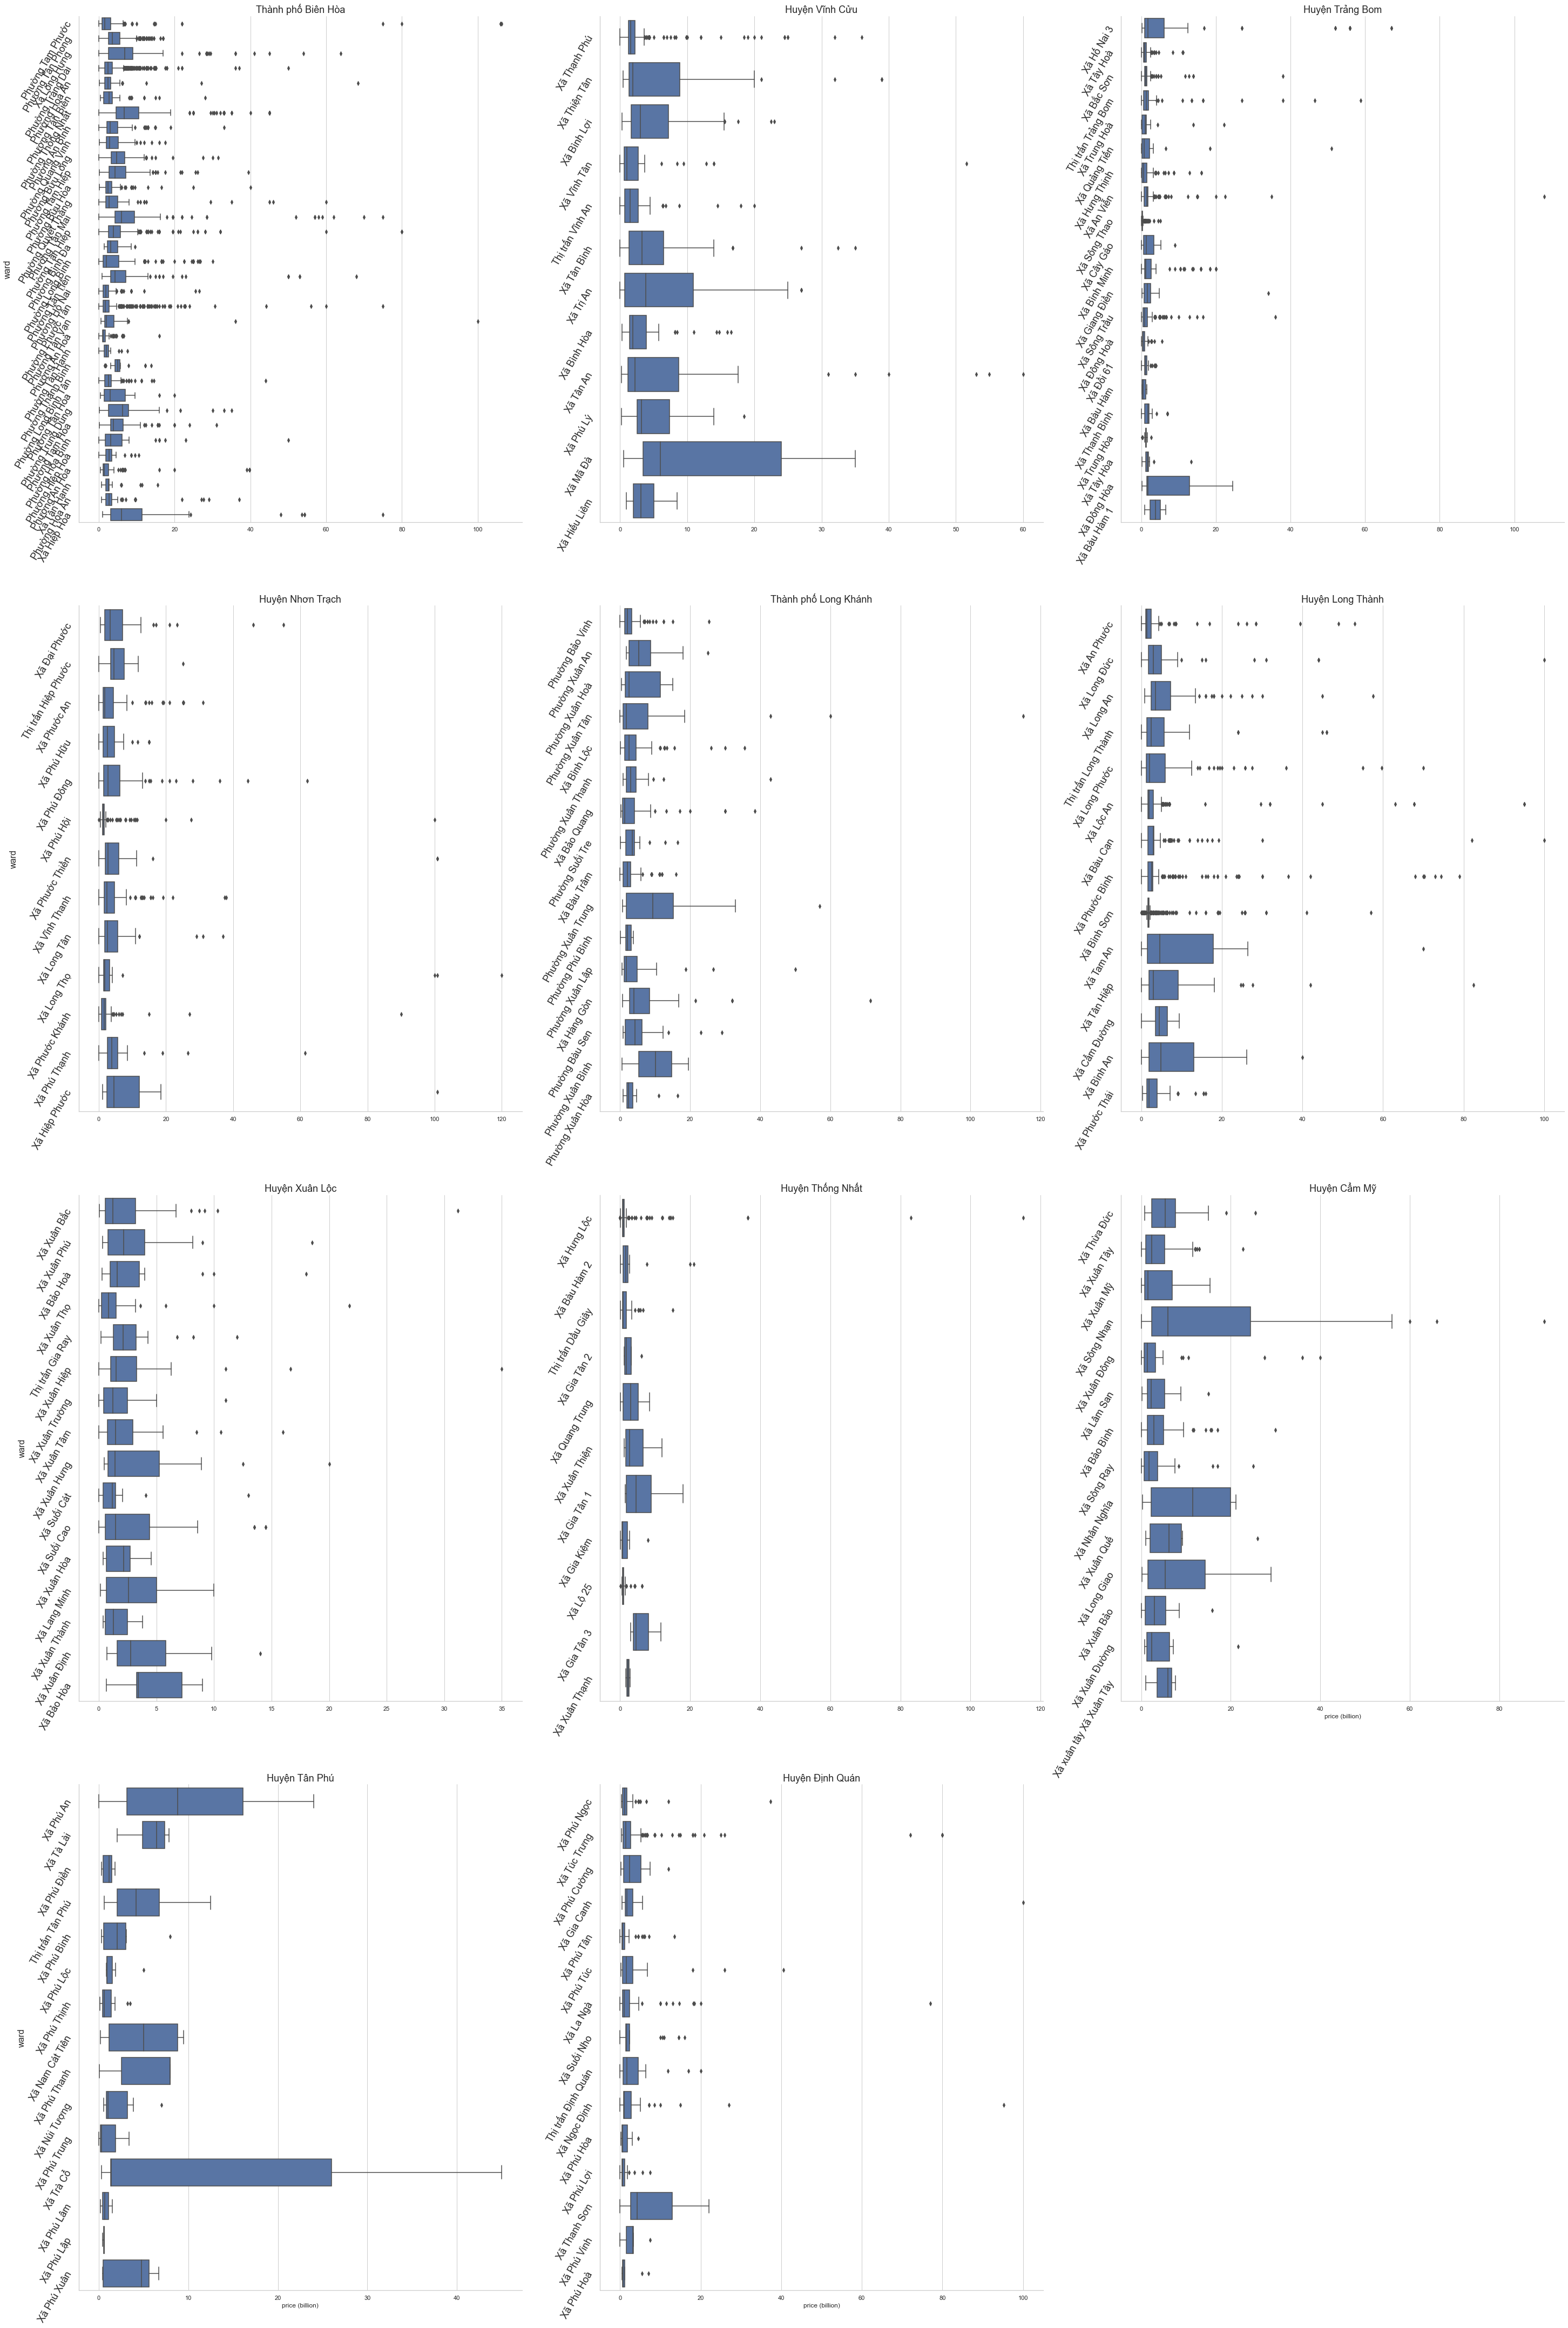

In [360]:
g = sns.FacetGrid(BDS_df9[BDS_df9['region'] == 'Đồng Nai'], col='area', sharey=False,
                  sharex=False, height=15, aspect=0.9, col_wrap=3)

g.map(sns.boxplot, 'price (billion)', 'ward', orient='h')
g.set_titles("{col_name}", size=18)
# g.fig.suptitle('Giá bất động sản tại các tỉnh')

# g.set_xticklabels(fontsize=18)
g.set_yticklabels(rotation=60, fontsize=18)
g.set_ylabels(fontsize=16)


g.fig.tight_layout()
plt.show()


In [361]:
region_cols = ['ward', 'area', 'region', 'price (billion)']
region_ = BDS_df10[region_cols].groupby(
    region_cols[1:-1], as_index=False).mean().sort_values(axis=0, by=['price (billion)'], ignore_index=True)

region_


area       region  price (billion)
0         Huyện Dầu Tiếng   Bình Dương         2.191175
1         Huyện Trảng Bom     Đồng Nai         2.605925
2          Huyện Xuân Lộc     Đồng Nai         2.765996
3          Thị xã Bến Cát   Bình Dương         2.780815
4          Huyện Bàu Bàng   Bình Dương         2.925462
5      Huyện Bắc Tân Uyên   Bình Dương         3.359467
6           Huyện Tân Phú     Đồng Nai         3.952871
7        Huyện Thống Nhất     Đồng Nai         4.022555
8        Huyện Bình Chánh  Hồ Chí Minh         4.306802
9          Huyện Vĩnh Cửu     Đồng Nai         4.351245
10     Thành phố Biên Hòa     Đồng Nai         4.864157
11       Huyện Nhơn Trạch     Đồng Nai         5.172554
12           Huyện Nhà Bè  Hồ Chí Minh         5.589627
13  Thành phố Thủ Dầu Một   Bình Dương         5.599468
14          Huyện Hóc Môn  Hồ Chí Minh         5.673252
15                Quận 12  Hồ Chí Minh         5.782362
16       Huyện Long Thành     Đồng Nai         6.069493
17           Huyện Cẩm Mỹ     Đồng Nai         6.290538
18     Thành phố Thuận An   Bình Dương         6.569773
19           Huyện Củ Chi  Hồ Chí Minh         6.651302
20          Quận Bình Tân  Hồ Chí Minh         6.680921
21                 Quận 8  Hồ Chí Minh         6.777952
22                 Quận 4  Hồ Chí Minh         6.783811
23        Huyện Định Quán     Đồng Nai         7.395506
24        Thị xã Tân Uyên   Bình Dương         7.626636
25            Quận Gò Vấp  Hồ Chí Minh         7.865383
26   Thành phố Long Khánh     Đồng Nai         8.235372
27                 Quận 6  Hồ Chí Minh         8.602470
28         Huyện Phú Giáo   Bình Dương         9.606220
29      Thành phố Thủ Đức  Hồ Chí Minh         9.923488
30                Quận 11  Hồ Chí Minh        10.114656
31           Quận Tân Phú  Hồ Chí Minh        10.542369
32        Thành phố Dĩ An   Bình Dương        11.348340
33                 Quận 9  Hồ Chí Minh        11.349667
34        Quận Bình Thạnh  Hồ Chí Minh        12.447367
35          Huyện Cần Giờ  Hồ Chí Minh        12.462619
36                 Quận 7  Hồ Chí Minh        13.391146
37                Quận 10  Hồ Chí Minh        16.854209
38         Quận Phú Nhuận  Hồ Chí Minh        17.297903
39                 Quận 5  Hồ Chí Minh        20.627066
40                 Quận 3  Hồ Chí Minh        37.886779
41                 Quận 2  Hồ Chí Minh        39.382412
42                 Quận 1  Hồ Chí Minh        65.222677
43          Quận Tân Bình  Hồ Chí Minh    146599.581660

In [362]:
def convert_word2index(data, X, y):
    """
    Chuyển đổi các từ thành các trọng số dựa trên giá trị y trung bình
    """
    value = data[np.array([X, y]).flatten()].groupby(X,
                                                     as_index=False).mean().sort_values(axis=0, by=[y], ignore_index=True)
    w2idx = {}
    for i, v in enumerate(value[X]):
        w2idx[v] = i
    return w2idx


In [363]:
word2idx = {}
for v in ['ward', 'area', 'region']:
    word2idx[v] = convert_word2index(BDS_df10, v, 'price (billion)')
    BDS_df10[v] = BDS_df10[v].replace(word2idx[v])


### **list time**


In [366]:
BDS_df9['list_time'] = pd.to_datetime(BDS_df9['list_time'])

In [367]:
BDS_df9['year'] = BDS_df9['list_time'].dt.year
BDS_df9['month'] = BDS_df9['list_time'].dt.month


<Figure size 3600x1440 with 0 Axes>

<AxesSubplot:xlabel='list_time', ylabel='price (billion)'>

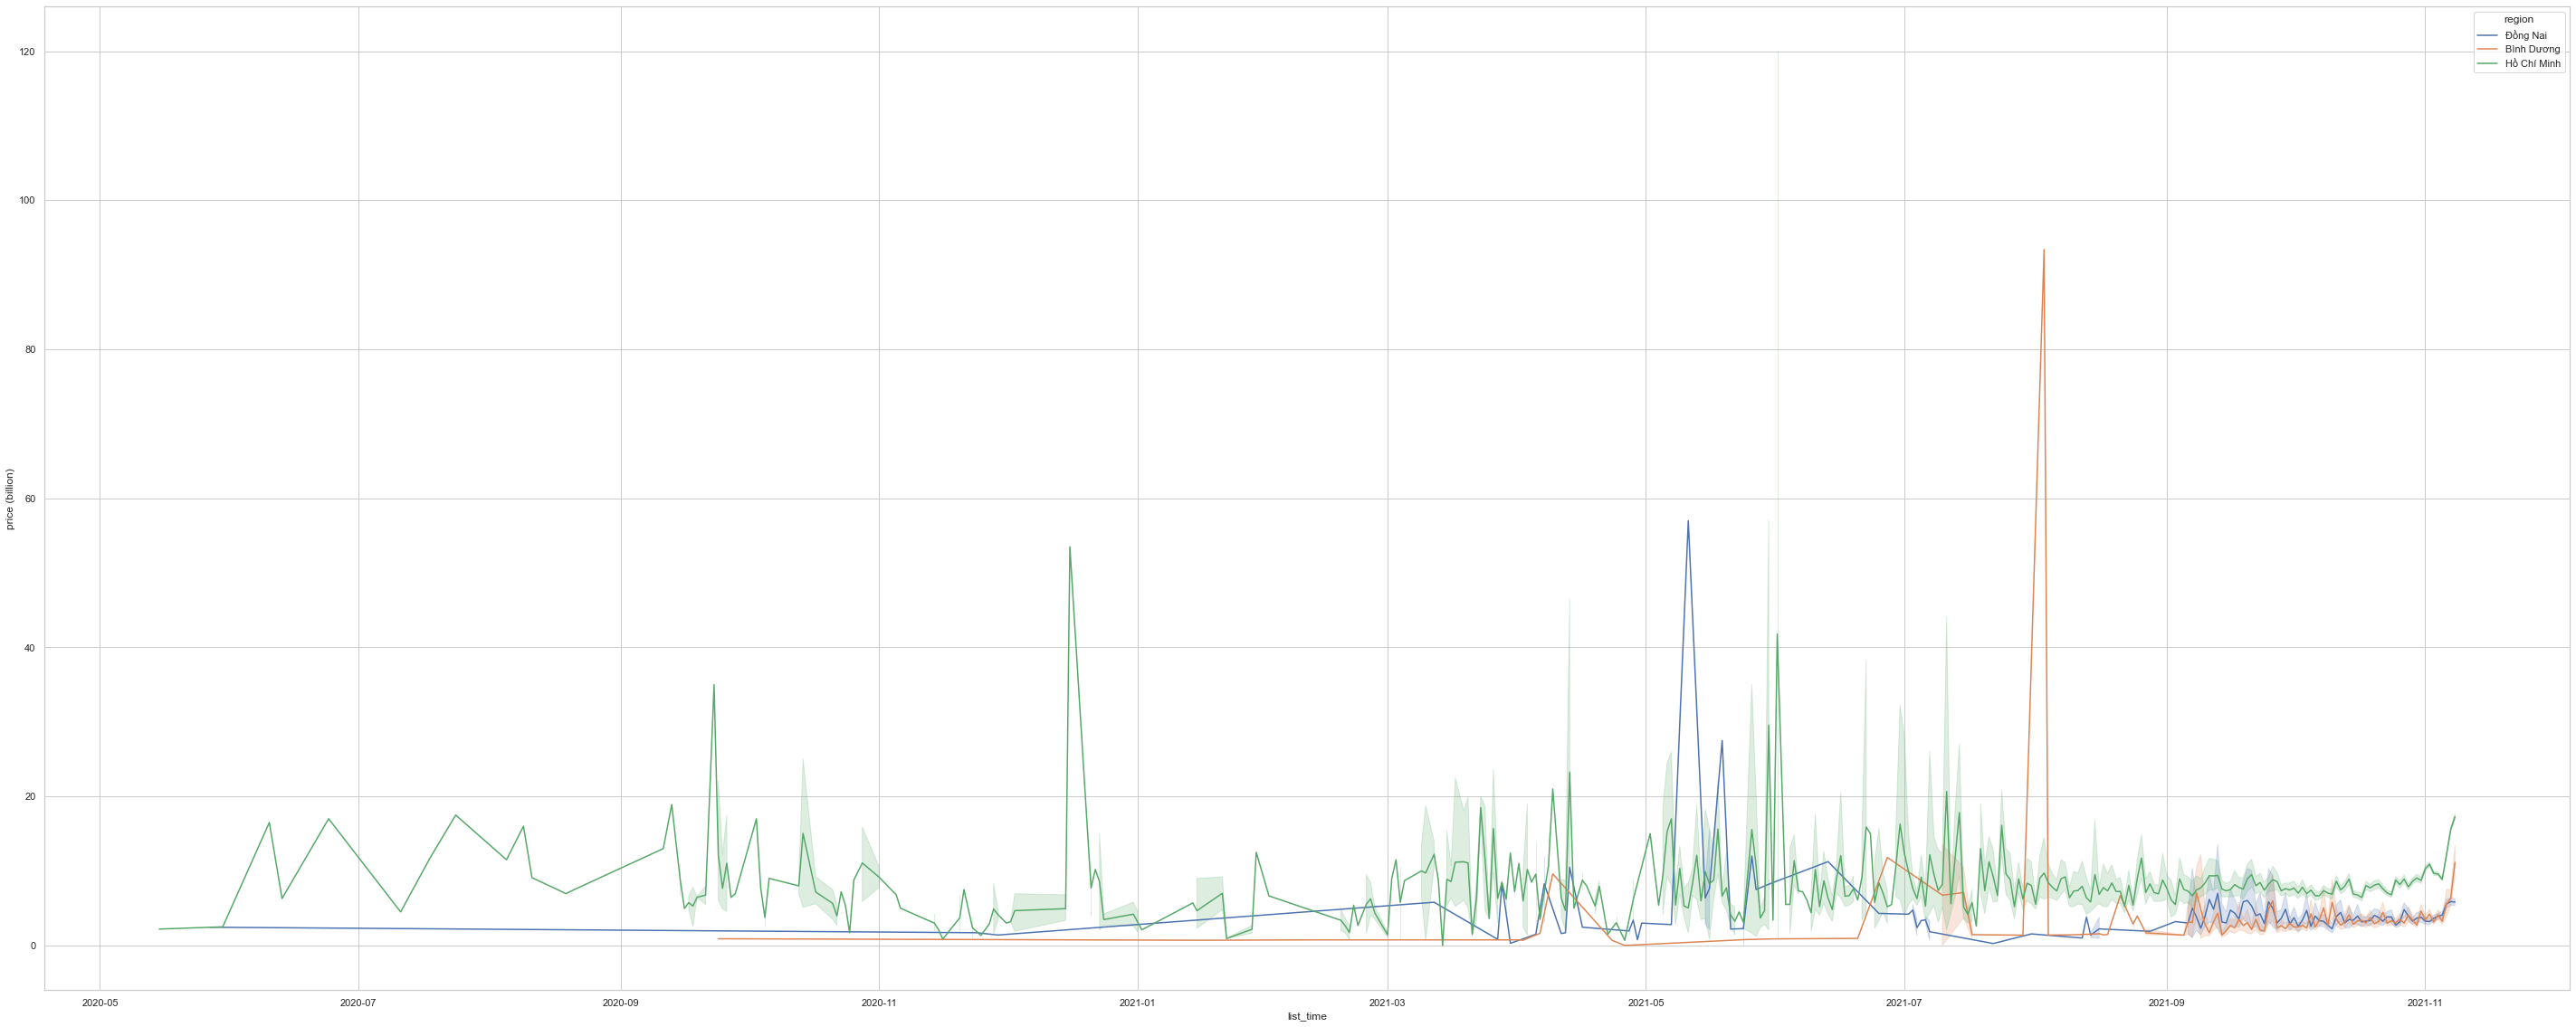

In [368]:
plt.figure(figsize=(50, 20))
sns.lineplot(data=BDS_df9, x="list_time",
             y="price (billion)", hue="region", dashes=False)


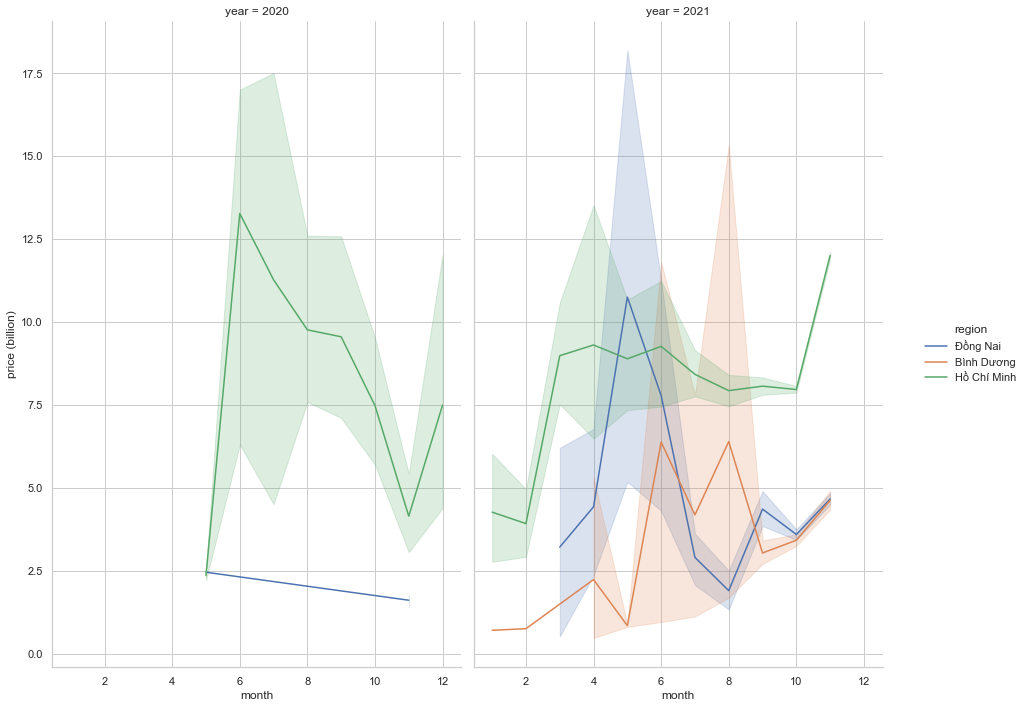

In [369]:
grid = sns.FacetGrid(BDS_df9, hue="region", col="year",
                     margin_titles=True, height=10, aspect=0.65)
grid.map(sns.lineplot, "month", "price (billion)")
grid.add_legend()


In [373]:
import time
import datetime

In [377]:
# BDS_df10['list_time'] = BDS_df10['list_time'].apply(
#     lambda x: int(round(x.timestamp())))

BDS_df10['list_time'] = BDS_df10['list_time'].apply(
    lambda x: int(round(time.mktime(datetime.datetime.strptime(x, "%Y-%m-%d").timetuple()))))

### direction , **property_legal_document , rooms , toilets , floors , type_real_estate**


<AxesSubplot:xlabel='price (billion)', ylabel='direction'>

<AxesSubplot:xlabel='price (billion)', ylabel='property_legal_document'>

<AxesSubplot:xlabel='price (billion)', ylabel='rooms'>

<AxesSubplot:xlabel='price (billion)', ylabel='toilets'>

<AxesSubplot:xlabel='price (billion)', ylabel='floors'>

<AxesSubplot:xlabel='price (billion)', ylabel='type_real_estate'>

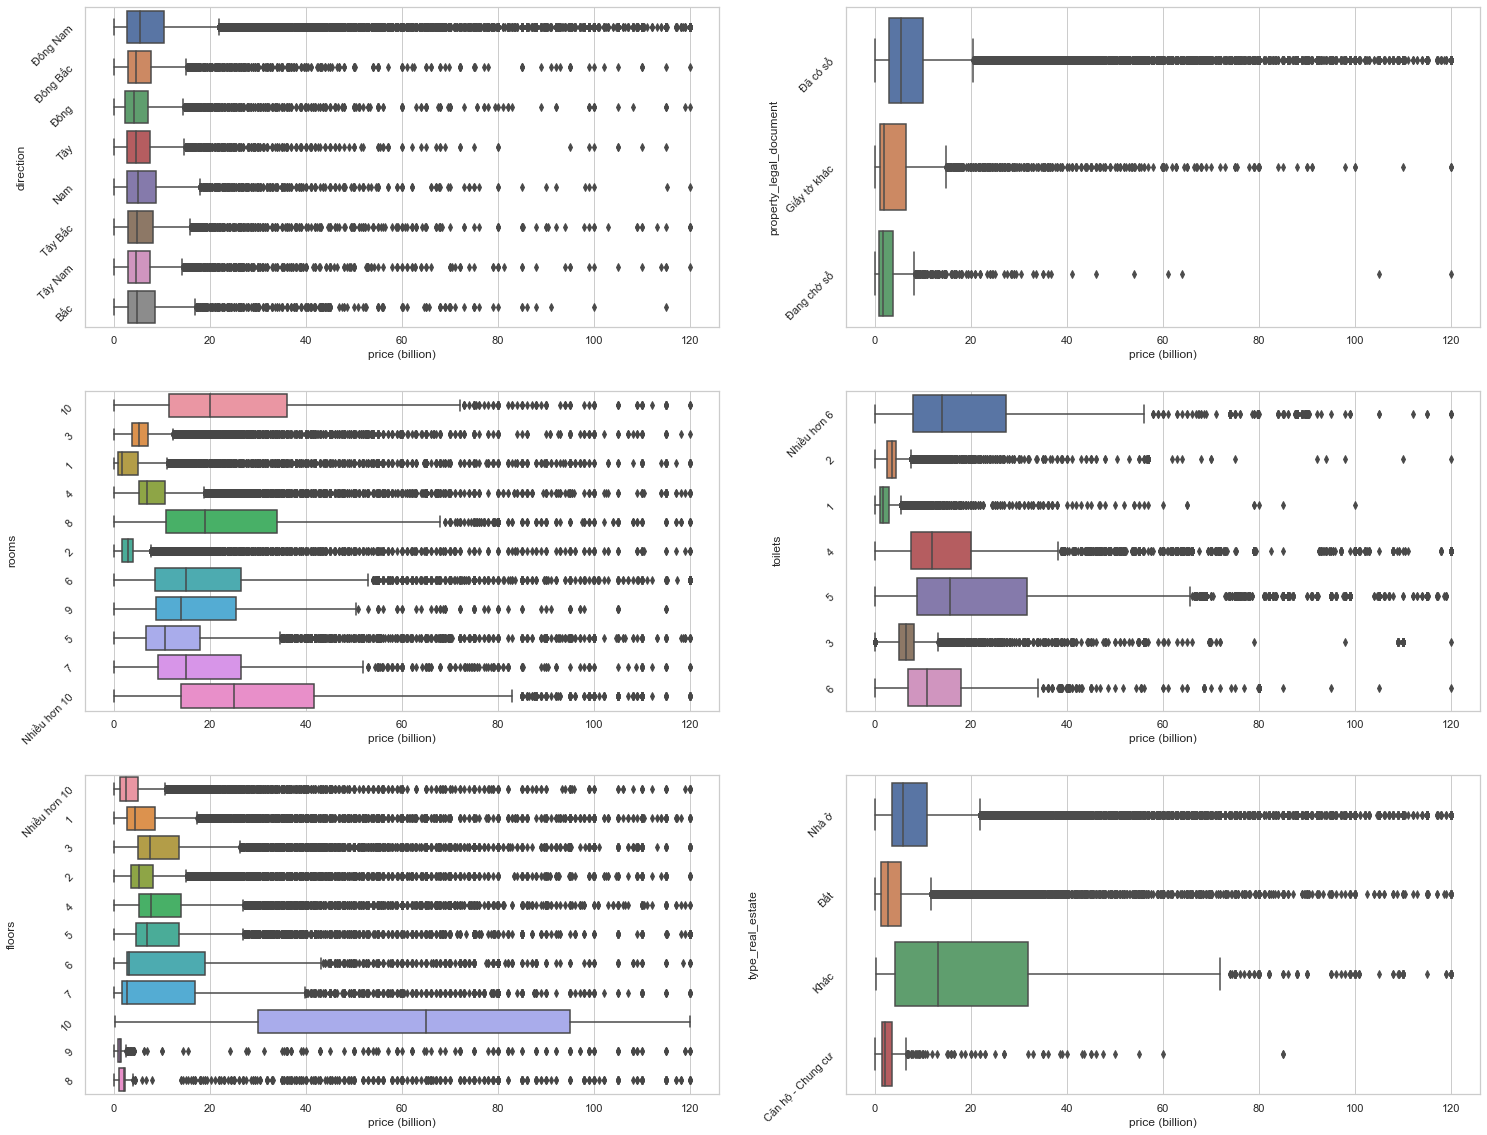

In [379]:
fig, axes = plt.subplots(3, 2, figsize=(25, 20))
col, row = 0, 0
for val in ['direction', 'property_legal_document', 'rooms', 'toilets', 'floors', 'type_real_estate']:
    sns.boxplot(y=val, x='price (billion)', orient='h',
                data=BDS_df9, ax=axes[row, col])
    axes[row, col].tick_params(labelrotation=45, axis='y')
    col += 1
    if col > 1:
        col = 0
        row += 1


=> Chỉ có direction không có sự khác biệt giữa các nhóm nên cần kết hợp với các thuộc tính khác


<AxesSubplot:xlabel='price (billion)', ylabel='direction'>

<AxesSubplot:xlabel='price (billion)', ylabel='property_legal_document'>

<AxesSubplot:xlabel='price (billion)', ylabel='rooms'>

<AxesSubplot:xlabel='price (billion)', ylabel='toilets'>

<AxesSubplot:xlabel='price (billion)', ylabel='floors'>

<AxesSubplot:xlabel='price (billion)', ylabel='type_real_estate'>

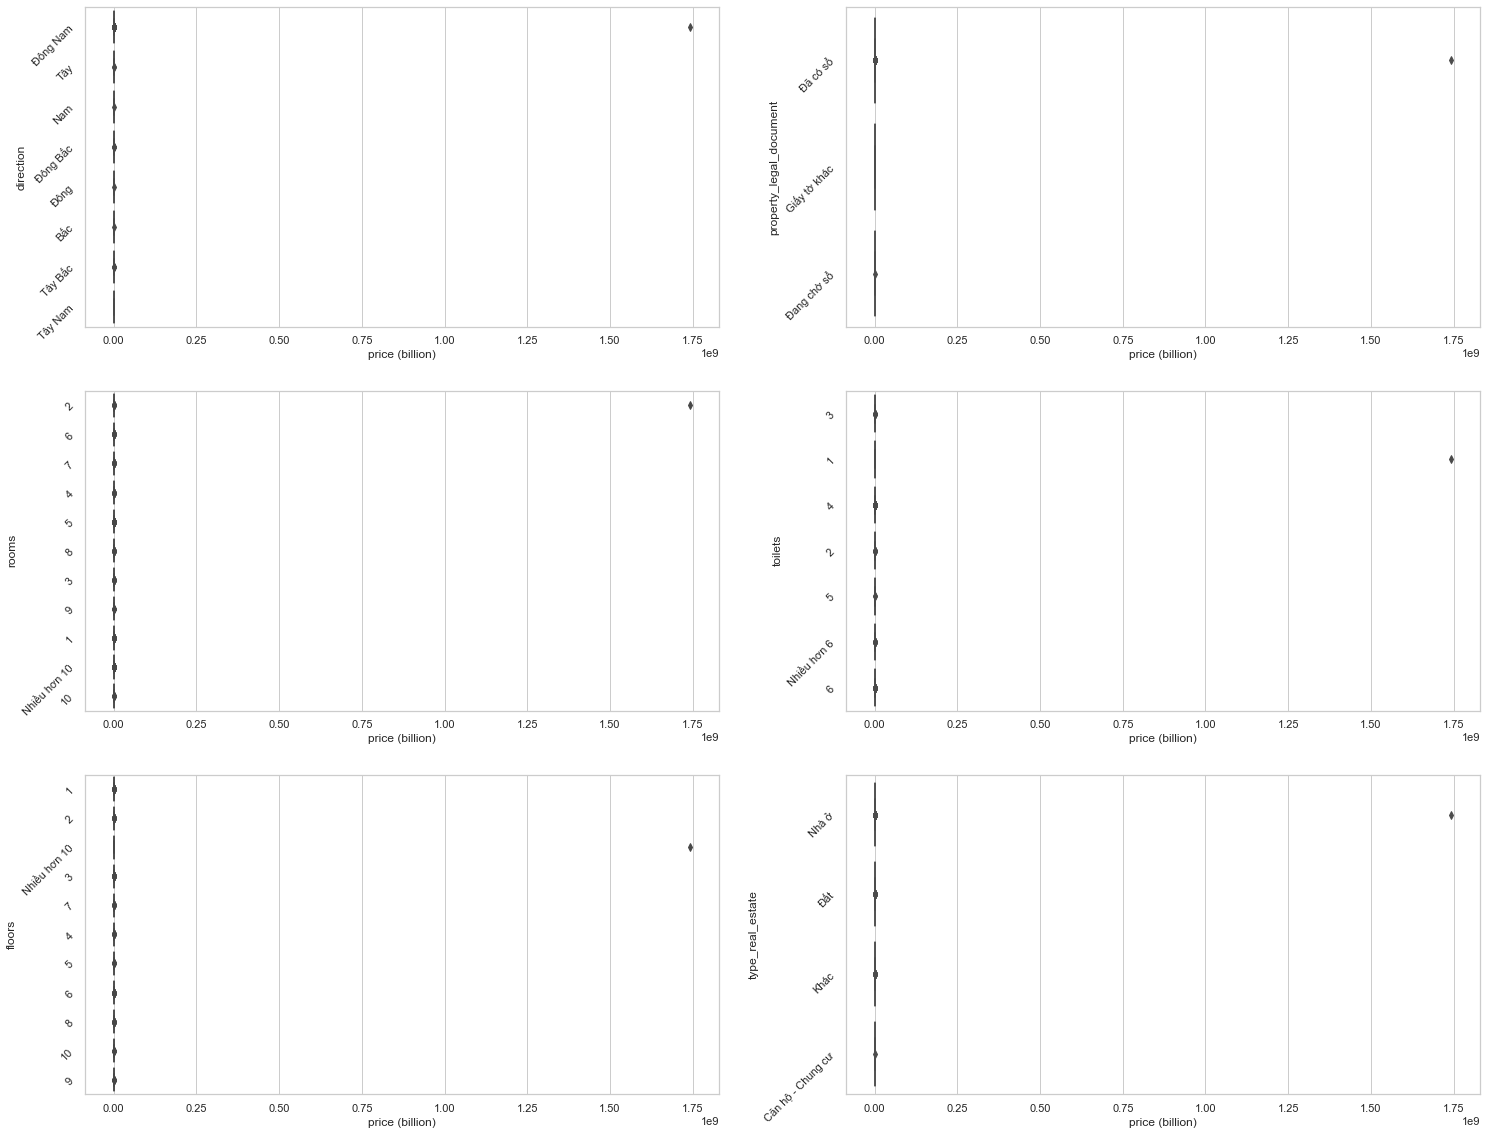

In [380]:
fig, axes = plt.subplots(3, 2, figsize=(25, 20))
col, row = 0, 0
for val in ['direction', 'property_legal_document', 'rooms', 'toilets', 'floors', 'type_real_estate']:
    sns.boxplot(y=val, x='price (billion)', orient='h',
                data=outlier_df, ax=axes[row, col])  # [outlier_df['price (million)'] <0.25e12]
    axes[row, col].tick_params(labelrotation=45, axis='y')
    col += 1
    if col > 1:
        col = 0
        row += 1


In [381]:
for v in ['property_legal_document', 'rooms', 'toilets', 'floors', 'type_real_estate']:
    word2idx[v] = convert_word2index(BDS_df10, v, 'price (billion)')
    BDS_df10[v] = BDS_df10[v].replace(word2idx[v])


In [382]:
# Vì website chỉ là nền tảng đăng tin nên không được tính là yếu tố ảnh hưởng đến giá
BDS_df10.drop('website', axis=1, inplace=True)


### Kết hợp


#### living_size (m2) + type_real_estate


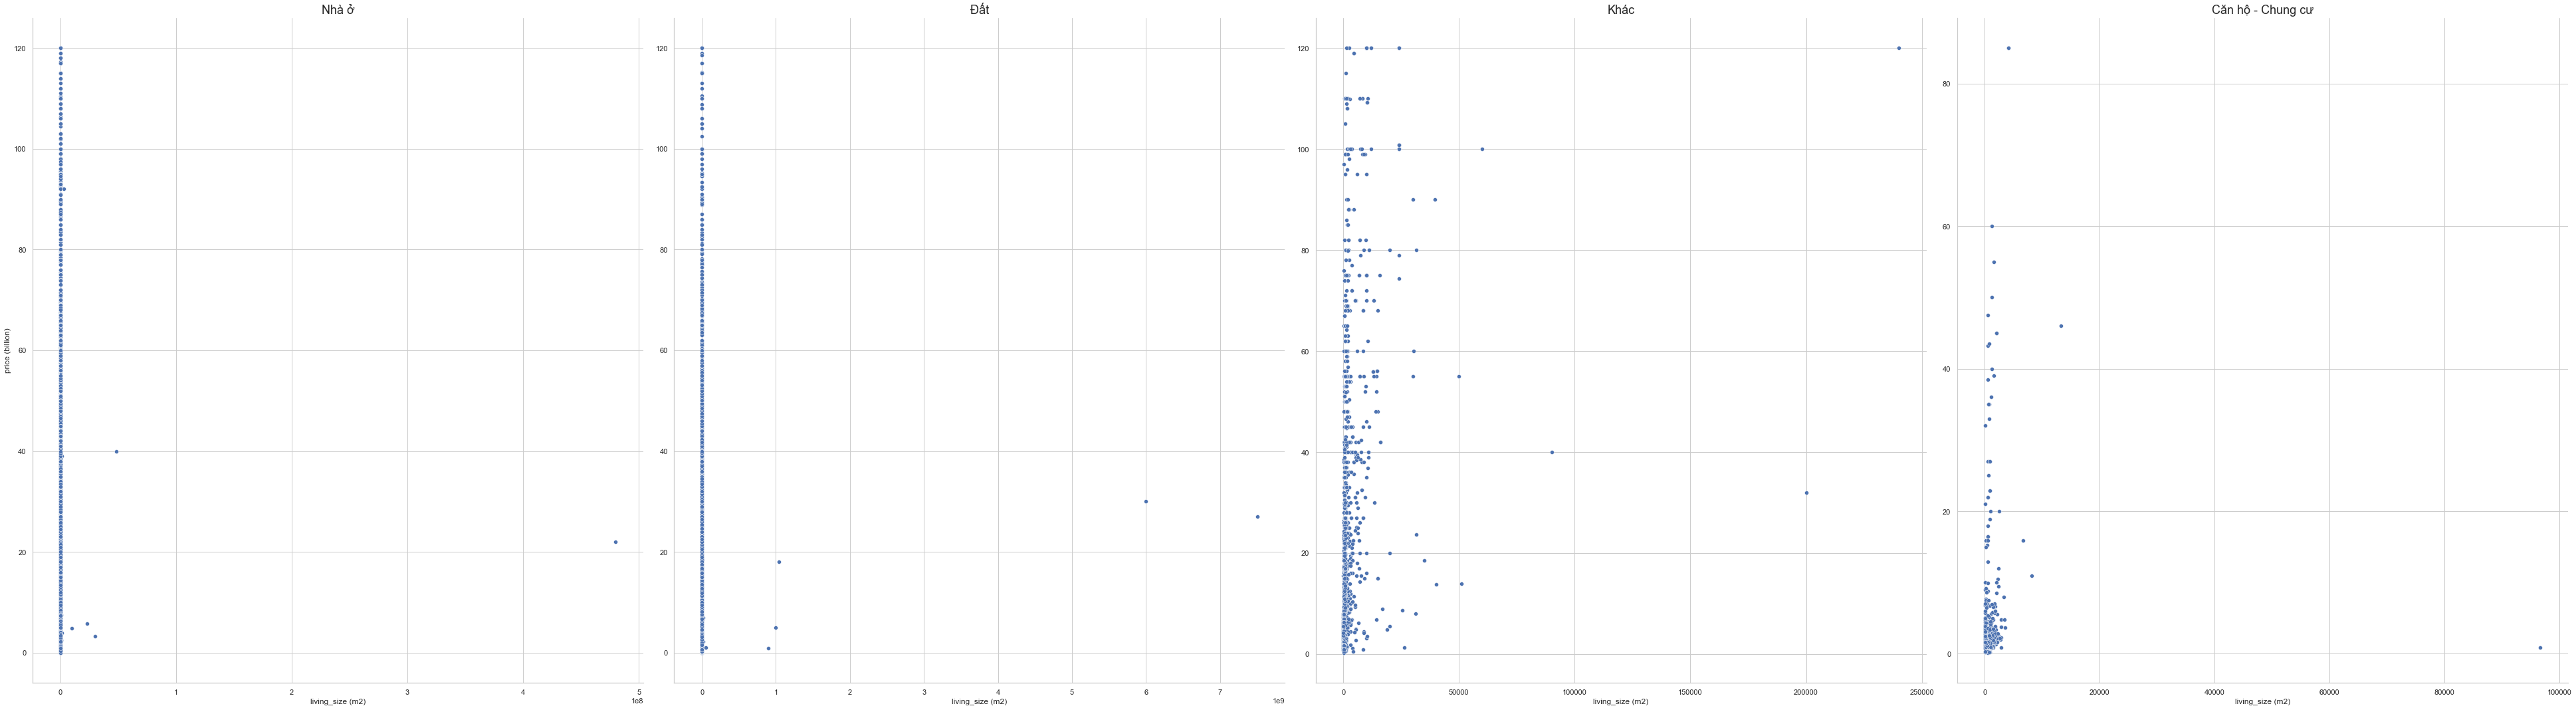

In [383]:
g = sns.FacetGrid(BDS_df9, col='type_real_estate', sharey=False,
                  sharex=False, height=15, aspect=0.9, col_wrap=4)

g.map(sns.scatterplot, 'living_size (m2)', 'price (billion)')
g.set_titles("{col_name}", size=18)
# g.fig.suptitle('Giá bất động sản tại các tỉnh')

# g.set_yticklabels(rotation=60, fontsize=18)

g.fig.tight_layout()
plt.show()


<Figure size 1440x720 with 0 Axes>

<AxesSubplot:xlabel='living_size (m2)', ylabel='price (billion)'>

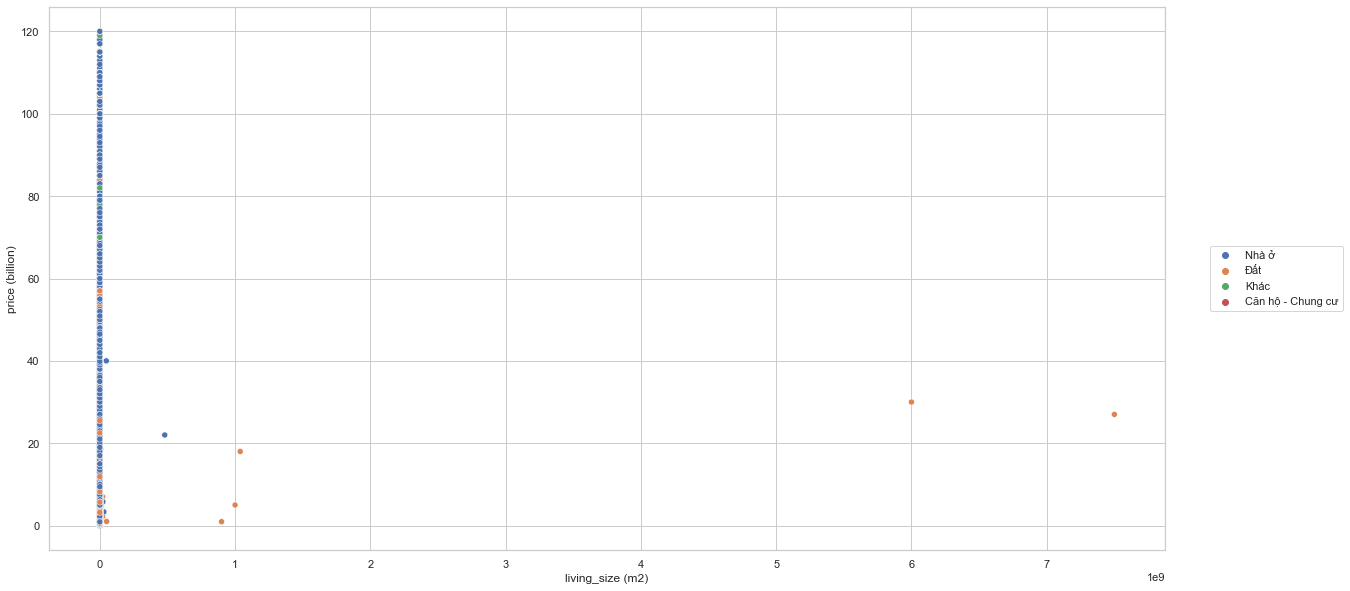

In [384]:
plt.figure(figsize=(20, 10))
sns.scatterplot(data=BDS_df9, x='living_size (m2)',
                y='price (billion)', hue='type_real_estate')
plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0)


#### size (m2) + type_real_estate


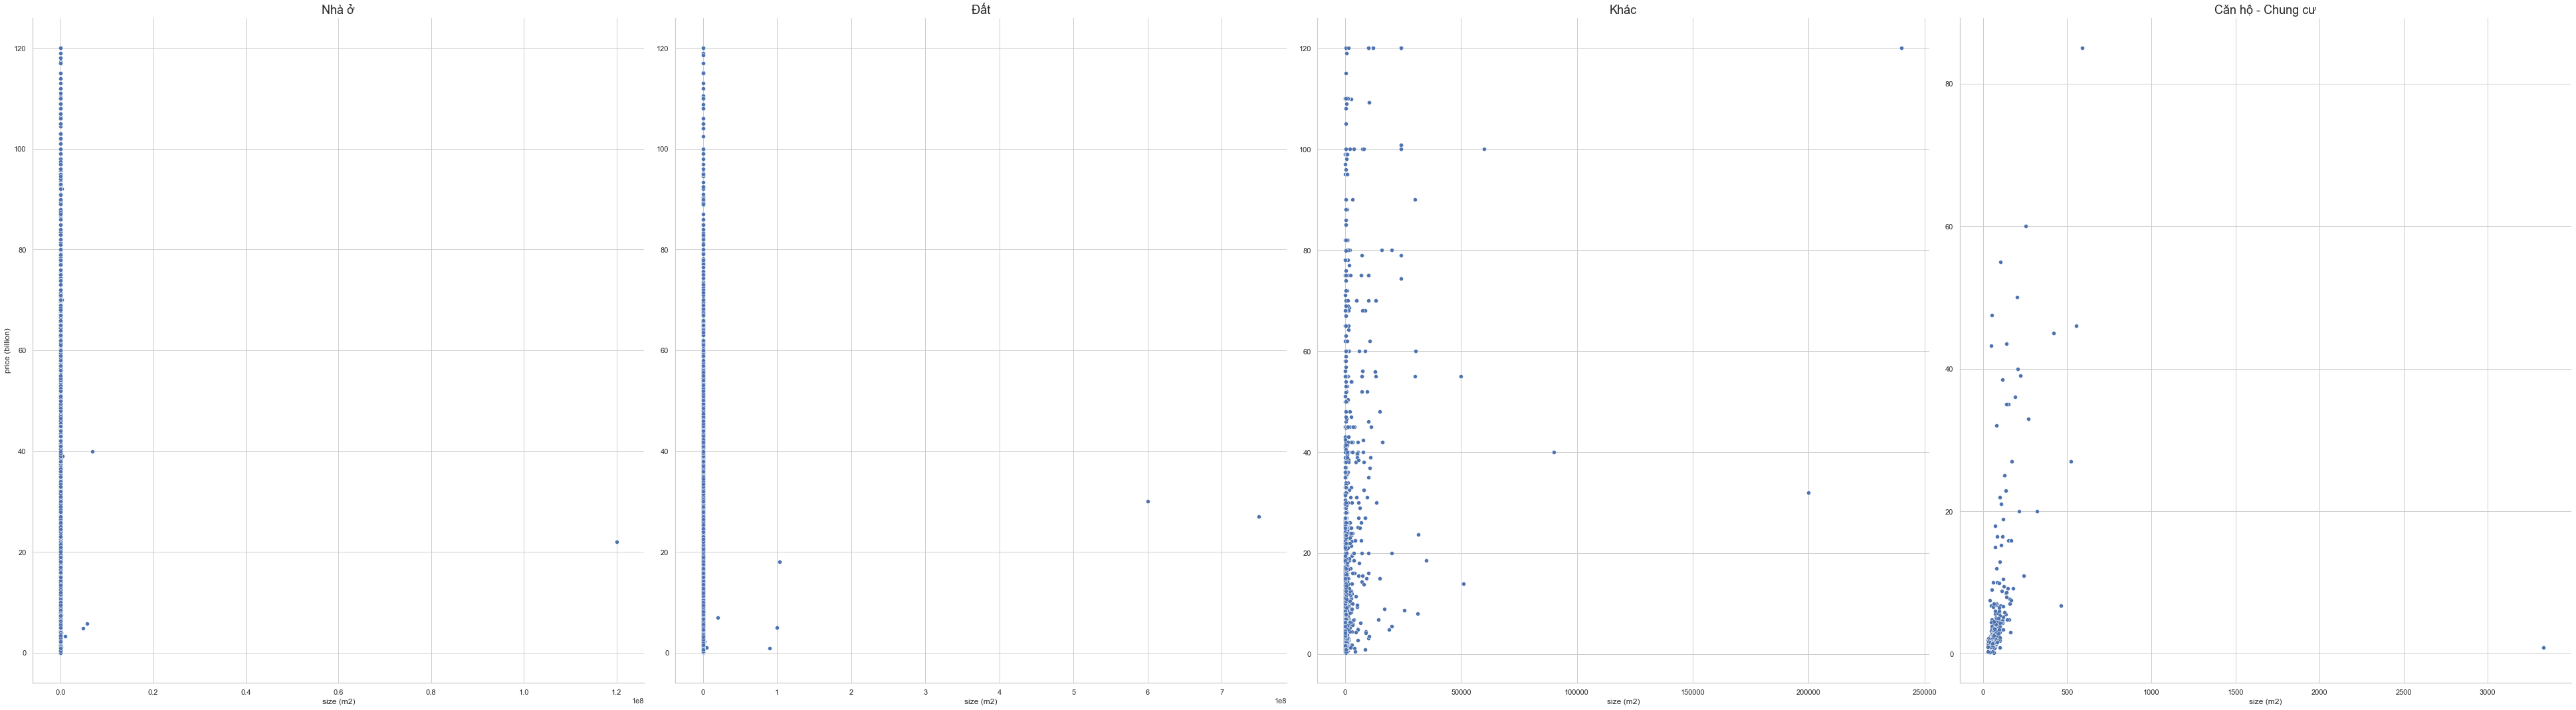

In [385]:
g = sns.FacetGrid(BDS_df9, col='type_real_estate', sharey=False,
                  sharex=False, height=15, aspect=0.9, col_wrap=4)

g.map(sns.scatterplot, 'size (m2)', 'price (billion)')
g.set_titles("{col_name}", size=18)
# g.fig.suptitle('Giá bất động sản tại các tỉnh')

# g.set_yticklabels(rotation=60, fontsize=18)

g.fig.tight_layout()
plt.show()


<Figure size 1440x720 with 0 Axes>

<AxesSubplot:xlabel='size (m2)', ylabel='price (billion)'>

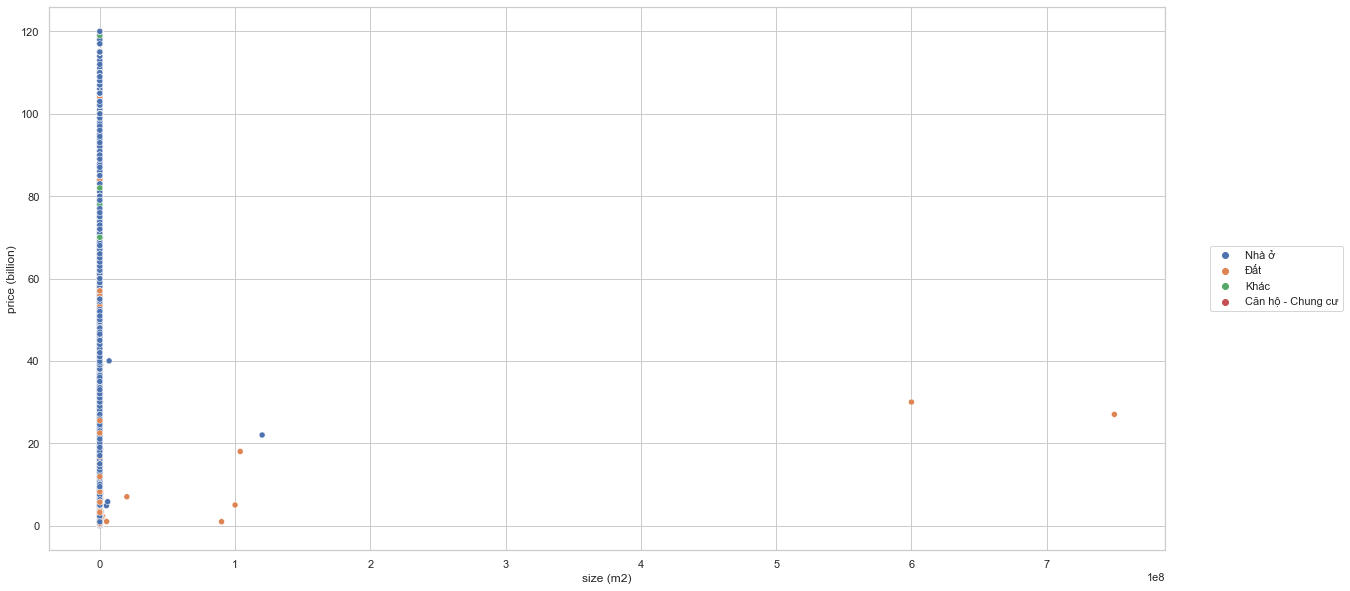

In [386]:
plt.figure(figsize=(20, 10))
sns.scatterplot(data=BDS_df9, x='size (m2)',
                y='price (billion)', hue='type_real_estate')
plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0)


<Figure size 1440x720 with 0 Axes>

<AxesSubplot:xlabel='size (m2)', ylabel='price (billion)'>

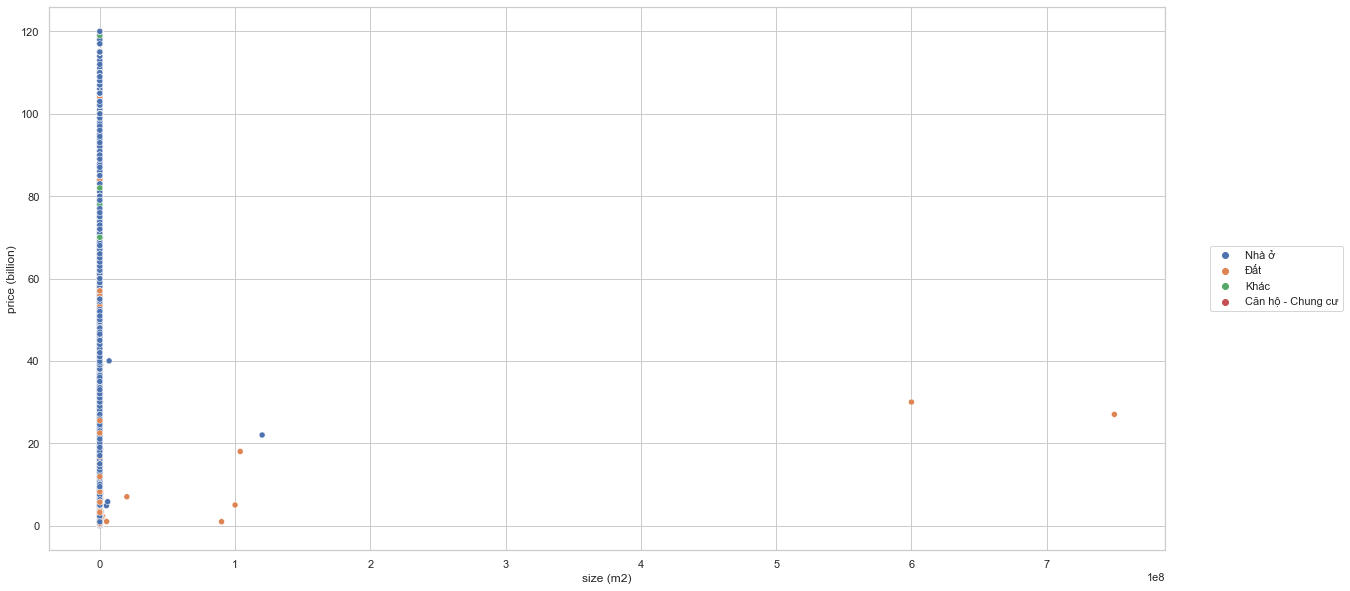

In [387]:
plt.figure(figsize=(20, 10))
sns.scatterplot(data=BDS_df9[BDS_df9['price (billion)'] <= 1e8], x='size (m2)',
                y='price (billion)', hue='type_real_estate')
plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0)


#### length (m) + type_real_estate


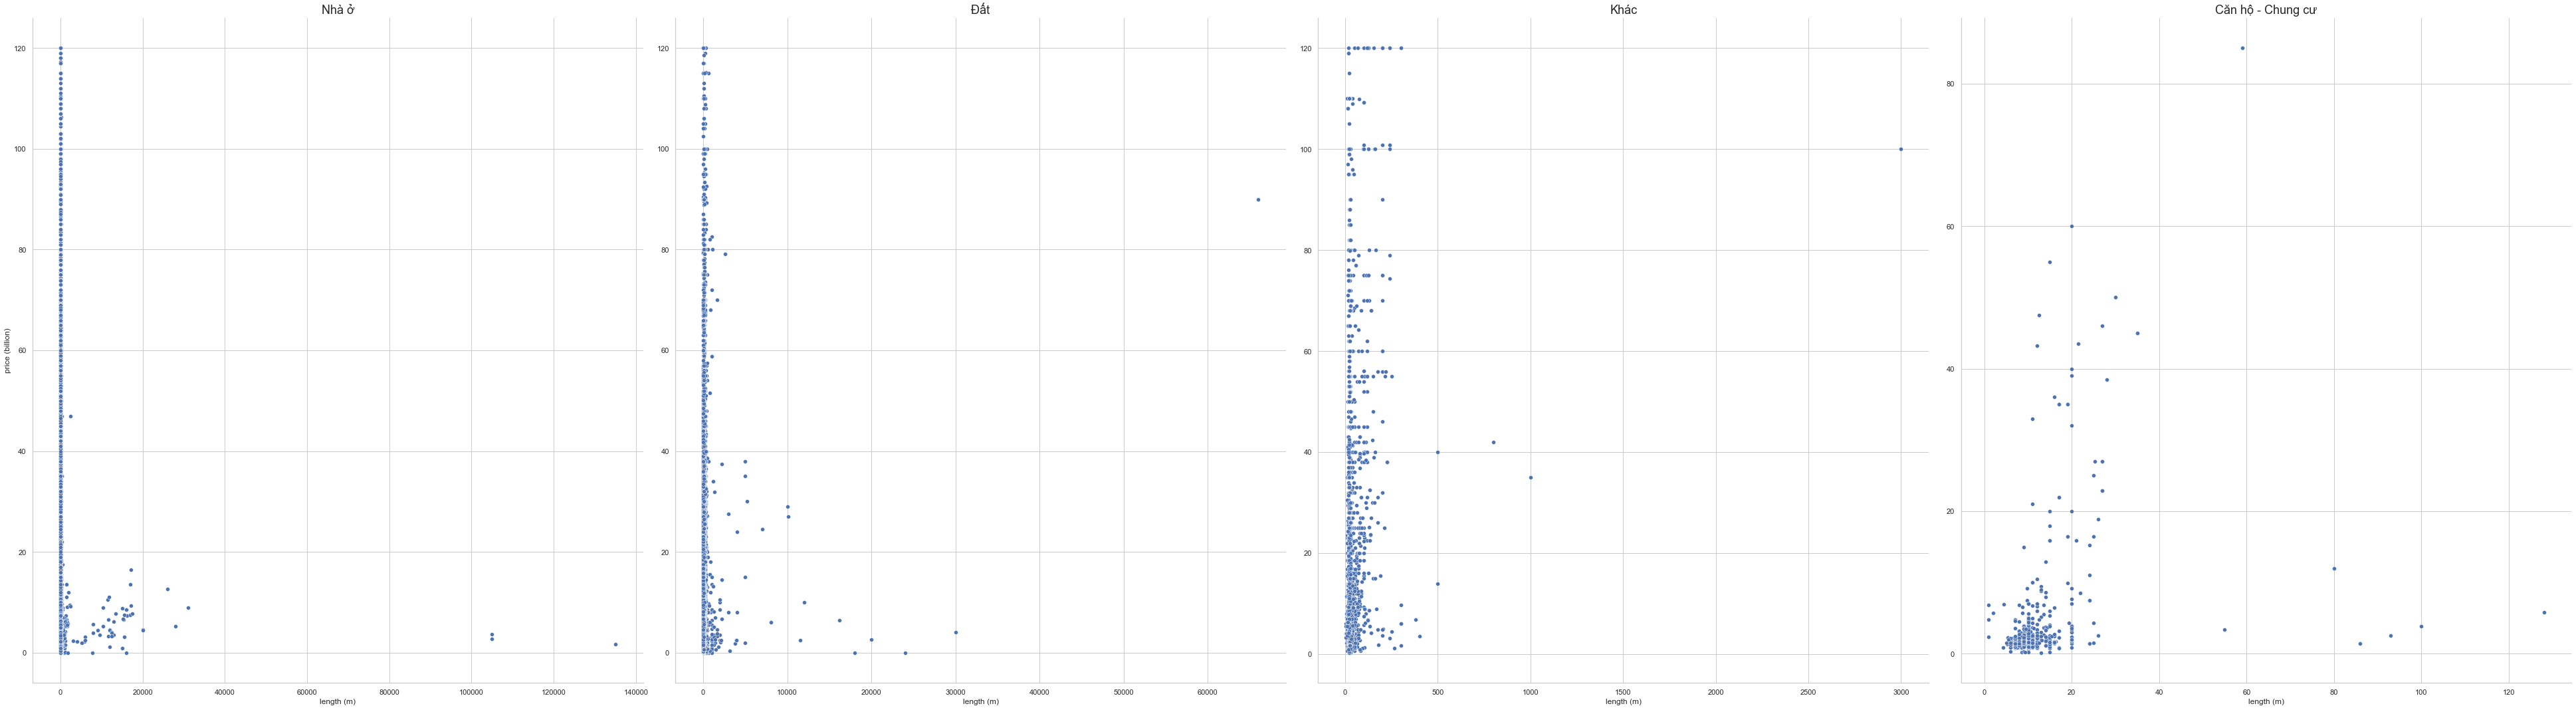

In [388]:
g = sns.FacetGrid(BDS_df9, col='type_real_estate', sharey=False,
                  sharex=False, height=15, aspect=0.9, col_wrap=4)

g.map(sns.scatterplot, 'length (m)', 'price (billion)')
g.set_titles("{col_name}", size=18)
# g.fig.suptitle('Giá bất động sản tại các tỉnh')

# g.set_ticklabels( fontsize=18)

g.fig.tight_layout()
plt.show()


<Figure size 1440x720 with 0 Axes>

<AxesSubplot:xlabel='length (m)', ylabel='price (billion)'>

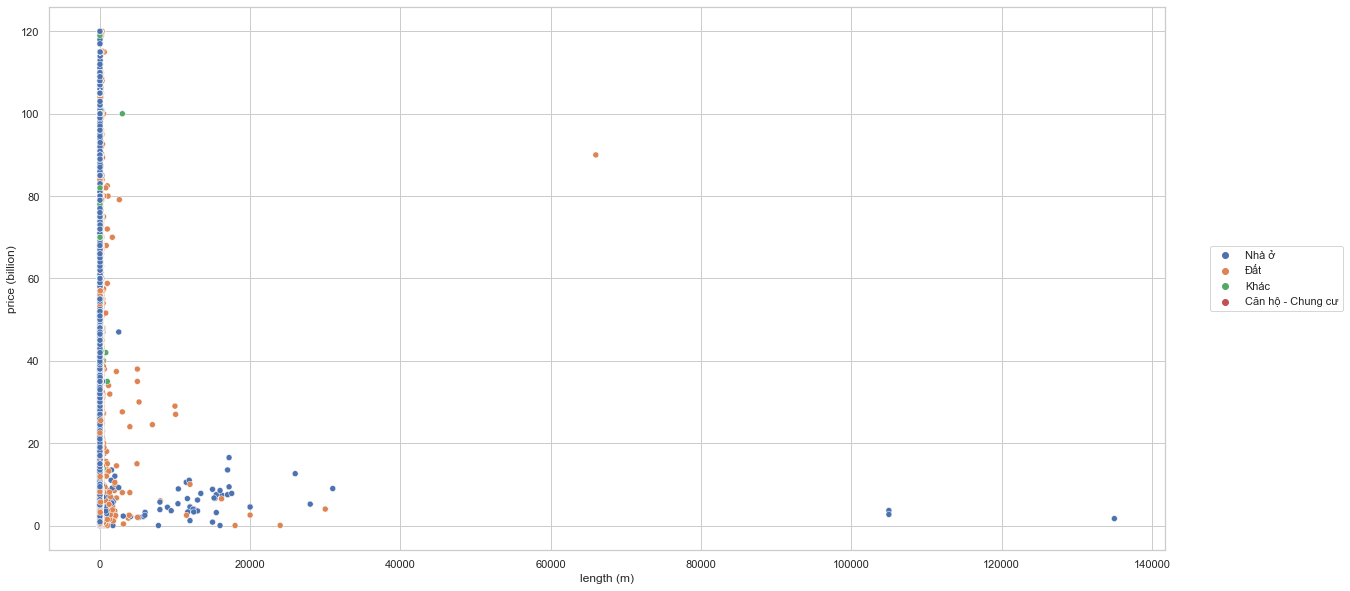

In [389]:
plt.figure(figsize=(20, 10))
sns.scatterplot(data=BDS_df9, x='length (m)',
                y='price (billion)', hue='type_real_estate')
plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0)


#### width (m) + type_real_estate


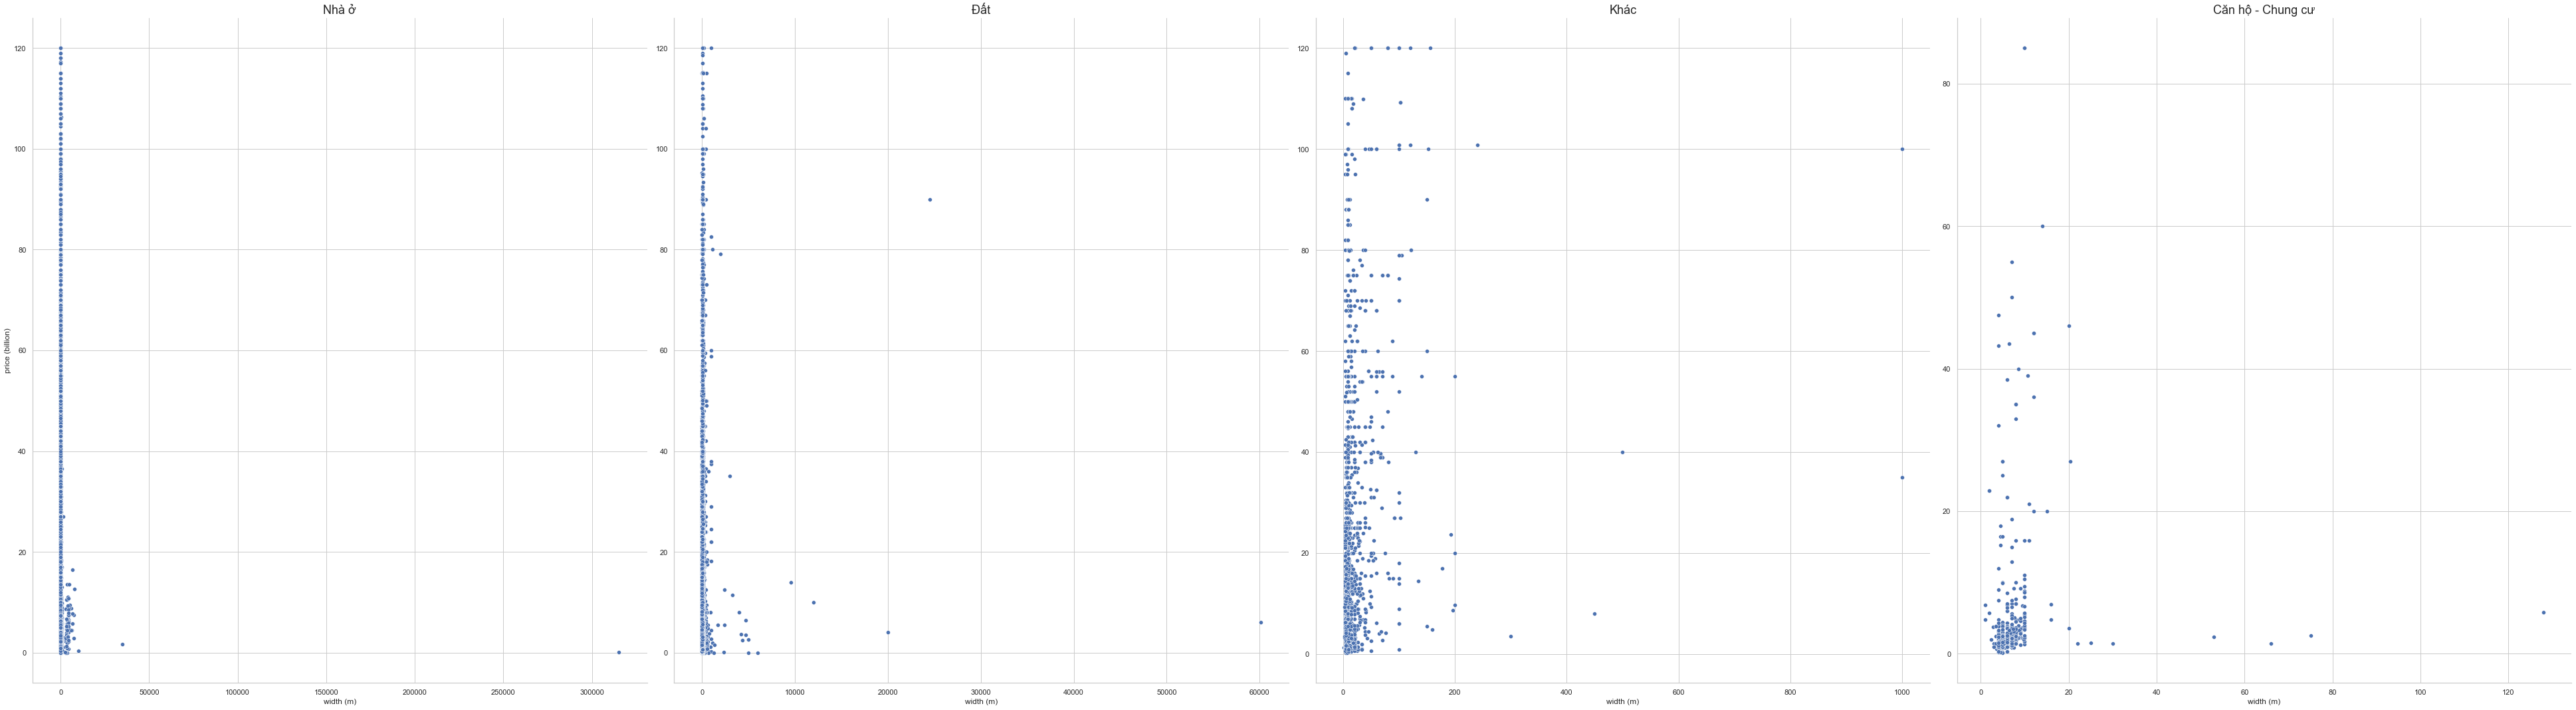

In [391]:
g = sns.FacetGrid(BDS_df9, col='type_real_estate', sharey=False,
                  sharex=False, height=15, aspect=0.9, col_wrap=4)

g.map(sns.scatterplot, 'width (m)', 'price (billion)')
g.set_titles("{col_name}", size=18)
# g.fig.suptitle('Giá bất động sản tại các tỉnh')

# g.set_ticklabels( fontsize=18)

g.fig.tight_layout()
plt.show()


<Figure size 1440x720 with 0 Axes>

<AxesSubplot:xlabel='width (m)', ylabel='price (billion)'>

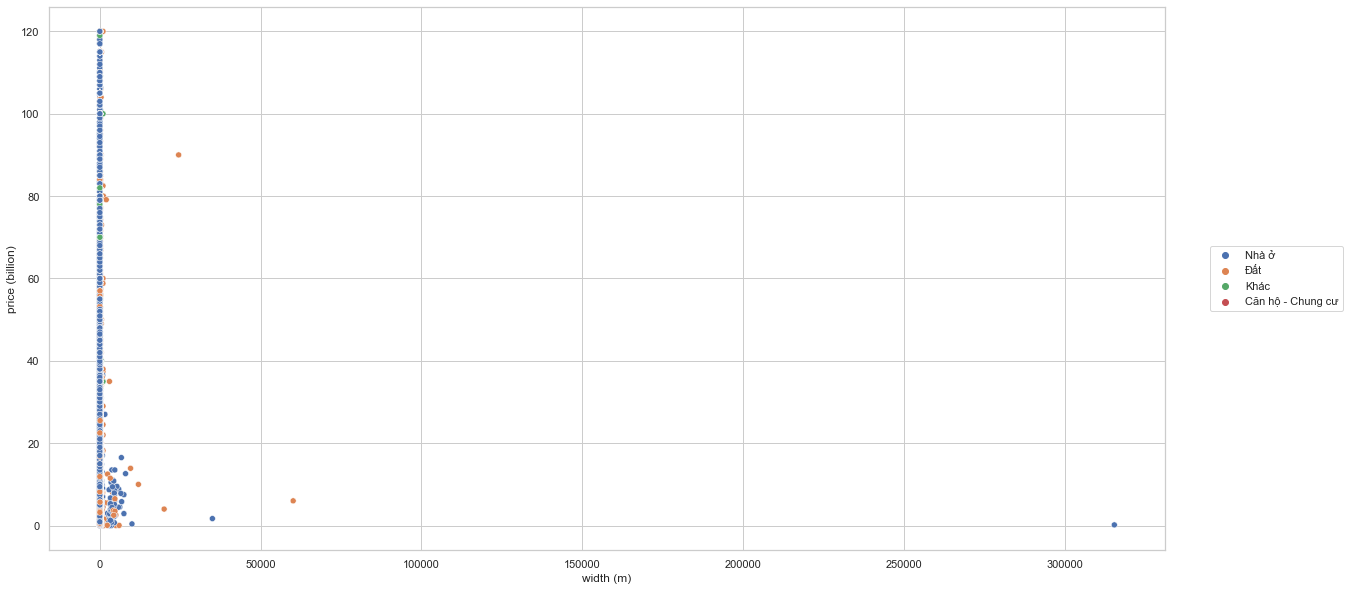

In [392]:
plt.figure(figsize=(20, 10))
sns.scatterplot(data=BDS_df9, x='width (m)',
                y='price (billion)', hue='type_real_estate')
plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0)


# Model new

## Prepare data

In [539]:
features = ['ward', 'area', 'region', 'rooms', 'toilets', 'floors', 'property_legal_document', 'price (billion)']
# number_feature = ['month', 'year', 'front_road', 'length (m)', 'width (m)', 'size (m2)', 'living_size (m2)', 'price (billion)']

In [540]:
# BSD_model_df = BDS_df9[number_feature + category_feature].copy()
BSD_model_df = BDS_df9[features].copy()
BSD_model_df.head()

ward                area    region rooms      toilets  \
0  Phường Tam Phước  Thành phố Biên Hòa  Đồng Nai    10  Nhiều hơn 6   
1  Phường Tân Phong  Thành phố Biên Hòa  Đồng Nai     3            2   
2  Phường Tam Phước  Thành phố Biên Hòa  Đồng Nai     1            1   
3      Xã Thạnh Phú      Huyện Vĩnh Cửu  Đồng Nai     3            2   
4      Xã Long Hưng  Thành phố Biên Hòa  Đồng Nai     4            4   

         floors property_legal_document  price (billion)  
0  Nhiều hơn 10                Đã có sổ             3.50  
1             1                Đã có sổ             3.75  
2  Nhiều hơn 10                Đã có sổ             1.20  
3             1                Đã có sổ             1.65  
4  Nhiều hơn 10            Giấy tờ khác             7.00

In [541]:
X = BSD_model_df.iloc[:, 0:7]
y = BSD_model_df.iloc[:, -1]


In [543]:
def process_get_dummies(df, features, remove_one_column=False):
    one_hot = df.copy()
    for feature in features:
        one_hot = pd.get_dummies(one_hot, columns = [feature])
        if remove_one_column:
            one_hot = one_hot.iloc[:, :-1]
    return one_hot

In [544]:
X_encoded = process_get_dummies(X.copy(), [
                                'ward', 'area', 'region', 'rooms', 'toilets', 'floors', 'property_legal_document'], remove_one_column=True)
X_encoded.head()


ward_Phường 1  ward_Phường 10  ward_Phường 11  ward_Phường 12  \
0              0               0               0               0   
1              0               0               0               0   
2              0               0               0               0   
3              0               0               0               0   
4              0               0               0               0   

   ward_Phường 13  ward_Phường 14  ward_Phường 15  ward_Phường 16  \
0               0               0               0               0   
1               0               0               0               0   
2               0               0               0               0   
3               0               0               0               0   
4               0               0               0               0   

   ward_Phường 17  ward_Phường 18  ward_Phường 19  ward_Phường 2  \
0               0               0               0              0   
1               0               0               0              0   
2               0               0               0              0   
3               0               0               0              0   
4               0               0               0              0   

   ward_Phường 21  ward_Phường 22  ward_Phường 24  ward_Phường 25  \
0               0               0               0               0   
1               0               0               0               0   
2               0               0               0               0   
3               0               0               0               0   
4               0               0               0               0   

   ward_Phường 26  ward_Phường 27  ward_Phường 28  ward_Phường 3  \
0               0               0               0              0   
1               0               0               0              0   
2               0               0               0              0   
3               0               0               0              0   
4               0               0               0              0   

   ward_Phường 4  ward_Phường 5  ward_Phường 6  ward_Phường 7  ward_Phường 8  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              0              0              0   
3              0              0              0              0              0   
4              0              0              0              0              0   

   ward_Phường 9  ward_Phường An Bình  ward_Phường An Hoà  ward_Phường An Hòa  \
0              0                    0                   0                   0   
1              0                    0                   0                   0   
2              0                    0                   0                   0   
3              0                    0                   0                   0   
4              0                    0                   0                   0   

   ward_Phường An Khánh  ward_Phường An Lạc  ward_Phường An Lạc A  \
0                     0                   0                     0   
1                     0                   0                     0   
2                     0                   0                     0   
3                     0                   0                     0   
4                     0                   0                     0   

   ward_Phường An Lợi Đông  ward_Phường An Phú  ward_Phường An Phú Đông  \
0                        0                   0                        0   
1                        0                   0                        0   
2                        0                   0                        0   
3                        0                   0                        0   
4                        0                   0                        0   

   ward_Phường An Thạnh  ward_Phường Bàu Sen  ward_Phường Bình An  \
0                     0                    

In [546]:
X_data = X_encoded.copy()
y_data = y.copy()

In [547]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X_data, y_data, test_size=0.1, random_state=42)

## Train model

In [562]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import math

def evaluate_model(y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = math.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    print('R2 score:', r2)
    print('Mean Square Error (MSE):', mse)
    print('Root Mean Square Error (RMSE:', rmse)
    print('Mean Absolute Error (MAE):', mae)

### Linear Regression

In [548]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(train_X, train_y)

LinearRegression()

In [549]:
y_pred = linear_model.predict(test_X)

In [551]:
evaluate_model(test_y, y_pred)

R2 score: 0.46197137470866645
Mean Square Error (MSE): 103.84070349245374
Root Mean Square Error (RMSE: 10.190225880345034
Mean Absolute Error (MAE): 5.262020747802227


In [552]:
for index, (true, pred) in enumerate(zip(test_y, y_pred)):
    print(true, '\t', pred)
    if index > 20:
        break

9.48 	 9.10546875
3.3 	 1.6640625
6.0 	 3.330078125
2.2 	 3.912109375
9.7 	 3.7734375
12.0 	 18.37109375
1.25 	 -0.611328125
31.0 	 11.244140625
10.2 	 17.525390625
4.6 	 5.2109375
4.0 	 -2.138671875
16.95 	 26.416015625
0.0012 	 4.078125
2.25 	 1.25
10.7 	 7.931640625
0.96 	 3.90234375
12.5 	 7.91796875
2.35 	 7.3671875
6.1 	 9.90625
9.55 	 22.0703125
12.8 	 17.59765625
6.3 	 8.767578125


### Random Forest

In [553]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(max_depth=2, random_state=0)
rf_model.fit(train_X, train_y)

RandomForestRegressor(max_depth=2, random_state=0)

In [554]:
y_pred = rf_model.predict(test_X)

In [555]:
evaluate_model(test_y, y_pred)

R2 score: 0.25317476134684347
Mean Square Error (MSE): 144.13890734098197
Root Mean Square Error (RMSE: 12.005786410768016
Mean Absolute Error (MAE): 6.168320527254679


In [556]:
for index, (true, pred) in enumerate(zip(test_y, y_pred)):
    print(true, '\t', pred)
    if index > 20:
        break

9.48 	 17.456064467571867
3.3 	 5.495415326102524
6.0 	 5.495415326102524
2.2 	 5.495415326102524
9.7 	 5.495415326102524
12.0 	 17.456064467571867
1.25 	 5.495415326102524
31.0 	 5.495415326102524
10.2 	 24.691746691740455
4.6 	 5.495415326102524
4.0 	 5.495415326102524
16.95 	 17.456064467571867
0.0012 	 5.495415326102524
2.25 	 5.495415326102524
10.7 	 5.495415326102524
0.96 	 5.495415326102524
12.5 	 5.495415326102524
2.35 	 5.495415326102524
6.1 	 5.495415326102524
9.55 	 18.33668760159346
12.8 	 5.495415326102524
6.3 	 5.495415326102524


### KNN

In [557]:
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=2)
knn_model.fit(train_X, train_y)

KNeighborsRegressor(n_neighbors=2)

In [558]:
y_pred = knn_model.predict(test_X)

In [560]:
evaluate_model(test_y, y_pred)

R2 score: 0.4685527347616957
Mean Square Error (MSE): 102.57048658257531
Root Mean Square Error (RMSE: 10.127708851590043
Mean Absolute Error (MAE): 4.404854531994014


In [561]:
for index, (true, pred) in enumerate(zip(test_y, y_pred)):
    print(true, '\t', pred)
    if index > 20:
        break

9.48 	 8.1
3.3 	 4.6
6.0 	 6.199999999999999
2.2 	 2.115
9.7 	 7.4
12.0 	 18.5
1.25 	 1.2
31.0 	 8.350000000000001
10.2 	 4.845000000000001
4.6 	 6.3
4.0 	 3.75
16.95 	 37.1
0.0012 	 0.975
2.25 	 2.65
10.7 	 8.375
0.96 	 1.41
12.5 	 8.7
2.35 	 2.625
6.1 	 7.95
9.55 	 21.275
12.8 	 21.75
6.3 	 8.65


# Model old


In [78]:
# X_feature = np.array(BDS_df10.columns[BDS_df10.columns != 'price (million)'])
# X_feature

array(['list_time', 'ward', 'area', 'region', 'direction',
       'property_legal_document', 'size (m2)', 'rooms', 'toilets',
       'floors', 'living_size (m2)', 'width (m)', 'length (m)',
       'type_real_estate', 'front_road'], dtype=object)

In [79]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(
#     BDS_df10[X_feature], BDS_df10['price (million)'], test_size=0.1, random_state=0)


## 1

In [72]:
# features1 = ['front_road', 'region', 'area', 'ward', 'list_time',
#              'property_legal_document', 'rooms', 'toilets', 'floors', 'type_real_estate']


In [75]:
# from sklearn.linear_model import LinearRegression
# model1 = LinearRegression()

In [76]:
# model1.fit(X_train[features1], y_train)

LinearRegression()

In [82]:
# model1.predict(X_test[features1])

array([ -9410116.00342083, -32986074.45816672,  20513571.97296238, ...,
        71743615.01191723,  59469596.57404244,  49900327.43229818])